<div style="display: flex;">
  <div style="flex: 33%;">
      <img src="https://upload.wikimedia.org/wikipedia/commons/4/43/Emblema_Universidad_de_Sevilla.png" width=150>
  </div>
  <div style="flex: 66%; margin: 1em; text-align: center;">

<h1> Máster Propio en Data Science y Big Data (IV Edición) </h1>
<h2> Introducción a la Programación en Python y a los Paradigmas para Datos (IPPPD) </h2>

  </div>
</div>

### Instructor
<br/>
<div style="display: flex;">
  <div style="flex: 50%;">
      <img src="https://www.dropbox.com/s/8u2cy57qpz4yx1y/profile_pic.jpg?raw=1" width=200/>
  </div>
  <div style="flex: 50%;margin: 1em;">
      <b>Javier de la Rosa</b>, <a href="mailto:versae@linhd.uned.es"><i>versae@linhd.uned.es</i></a>, <a href="https://twitter.com/versae"><i>@versae</i></a>
      <br />
      <br />
      <div style="padding-left: 1em;">
      Postdoctoral Researcher en el Proyecto Europeo POSTDATA de la UNED
      <br />
      PhD, Estudios Hispánicos y Humanidades Digitales, University of Western Ontario, Canada
      <br />
      Máster en Inteligencia Artificial, Universidad de Sevilla, España
      <br />
      <br />
      Ex-Ingeniero de Investigación en la Stanford University, California
      <br />
      Ex-Director Técnico del laboratorio de investigación CulturePlex Lab en la University of Western Ontario, Canada
      </div>
  </div>
</div>

### Pandas y visualización

Este notebook contiene el código y las explicaciones del paquete de análisis de datos Pandas, y los paquetes asociados para visualización: matplotlib y seaborn.

Los libros de referencia son:

- [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) de Jake VanderPlas, cuyo contenido está parcialmente disponible [en GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).
- [Python for Data Analysis (2nd Edition)](https://learning.oreilly.com/library/view/python-for-data/9781491957653/) de Wes McKinney, cuyo contenido está parcialmente disponible [en GitHub](https://github.com/wesm/pydata-book).


## Setup

Aunque se tratará fundamentalmente el paquete Pandas, algunas referencias van a requerir paquetes extra. Para aquellos que usen Conda, Pandas debería venir incluido. En cualquier caso se puede instalar desde Jupyter.

In [1]:
%%capture
!pip install numpy matplotlib seaborn pandas numexpr pandas_datareader sqlalchemy dateparser python_dateutil version_information tqdm
#!conda install -c conda-forge python_dateutil dateparser version_information

Veamos rápidamente con qué versiones estamos trabajando.

In [2]:
%reload_ext version_information
%version_information numpy, matplotlib, seaborn, pandas, numexpr, pandas_datareader, python_dateutil, tqdm

Software,Version
Python,3.7.5 64bit [GCC 5.4.0 20160609]
IPython,7.9.0
OS,Linux 4.4.0 161 generic x86_64 with debian stretch sid
numpy,1.17.3
matplotlib,3.1.1
seaborn,0.9.0
pandas,0.25.3
numexpr,2.7.0
pandas_datareader,0.8.1
python_dateutil,2.8.1


Generemos una pequeña función para controlar el tiempo

In [3]:
import time
try:
    from tqdm.notebook import tnrange
except:
    from tqdm import tnrange

countdown = lambda s: ([time.sleep(1) for i in tnrange(s, desc=f"{s} sec.")]
                       and print("Tiempo!"))
countdown(1)


Tiempo!


E importemos Pandas con el alias `pd`.

In [4]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # Evita algunos avisos

# Manipulación de datos con Pandas

Pandas es un paquete relativamente nuevo construido sobre NumPy, y proporciona una implementación eficiente de ``DataFrame``. Los "DataFrame" son esencialmente matrices multidimensionales con etiquetas de filas y columnas adjuntas, y a menudo con tipos heterogéneos y/o datos faltantes.
Además de ofrecer una interfaz de almacenamiento conveniente para datos etiquetados, Pandas implementa una serie de potentes operaciones de datos que son familiares para los usuarios tanto de macros de bases de datos como de programas de hojas de cálculo.

La estructura de datos de ``ndarray`` de NumPy proporciona lo necesario para trabajar con tipos de datos limpios y bien organizados que se ven típicamente en las tareas de computación numérica.
Aunque sirve muy bien a este propósito, sus limitaciones se hacen evidentes cuando necesitamos más flexibilidad (por ejemplo, adjuntar etiquetas a los datos, trabajar con datos que faltan, etc.) y cuando intentamos realizar operaciones que no funcionan bien con la difusión de elementos (por ejemplo, agrupaciones, pivotes, etc.), lo que resulta verdaderamente importante para analizar datos menos estructurados que podemos encontrar en nuestro trabajo diario.
Pandas, y en particular sus objetos ``Series`` y ``DataFrame``, se basa en la estructura de la matriz NumPy y proporciona un acceso eficiente a este tipo de tareas de "data munging" que ocupan gran parte del tiempo de un científico de datos.

## Series

Una ``Series`` Pandas es un array unidimensional de datos indexados.
Se puede crear a partir de una lista o un array NumPy.

In [5]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

Como vemos, la ``Series`` contiene tanto una secuencia de valores como una secuencia de índices, que pueden ser accedios a través de los atributos ``values`` e ``index``, respectivamente.
The ``values`` are simply a familiar NumPy array:

In [6]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

El ``index`` es un objeto similiar al array, su tipo es ``pd.Index``.

In [7]:
data.index

RangeIndex(start=0, stop=4, step=1)

Como en NumPy, se puede acceder a los datos usado el índice asociado usando los corchetes:

In [8]:
data[1]

0.5

In [9]:
data[1:3]

1    0.50
2    0.75
dtype: float64

También tienen una serie de métodos asociados.

In [10]:
data.idxmax(), data.max()  # equivalentes a los argmax y max de NumPy

(3, 1.0)

Pero como veremos, las ``Series`` Pandas son mucho más generales y flexibles que el array unidimensional de NumPy.

### Series, vista como una generalización de un array NumPy

La diferencia fundamental entre un array NumPy y una ``Series`` Pandas es que el array NumPy tiene un índice entero *implícitamente definido* para acceder a los valores, mientras que la ``Series`` Pandas tiene un índice *explícitamente definido* asociado con los valores. Este índice, además, no tiene por qué ser de tipo entero:

In [11]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

Con lo que el acceso a los datos quedaría:

In [12]:
data['b']

0.5

Podríamos incluso usar índices no contiguos:

In [13]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[2, 5, 3, 7])
data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

In [14]:
data[5]

0.5

### Series, vistas como un diccionario especializado

De esta manera, se puede pensar en una ``Series`` Pandas un poco como una especialización de un diccionario Python.
Un diccionario es una estructura que asigna claves arbitrarias a un conjunto de valores arbitrarios, y una `Series` es una estructura que asigna claves escritas a un conjunto de valores escritos.
Esta tipificación es importante: así como el código compilado específico para el tipo de un array NumPy lo hace más eficiente que una lista de Python para ciertas operaciones, la información de tipo de una ``Series`` Pandas hace que sea mucho más eficiente que los diccionarios Python para ciertas operaciones.

La analogía de ``Series`` como diccionario puede hacerse aún más clara construyendo un objeto ``Series`` directamente desde un diccionario Python:

In [15]:
population_dict = {'Sevilla': 690000,
                   'Valencia': 789004,
                   'Granada': 233764,
                   'Madrid': 3174000,
                   'Barcelona': 1615000}
population = pd.Series(population_dict)
population

Sevilla       690000
Valencia      789004
Granada       233764
Madrid       3174000
Barcelona    1615000
dtype: int64

Por defecto, se creará una ``Serie`` donde el índice se construirá a partir de las claves ordenadas.
A partir de lo cual se puede realizar el típico acceso a elementos de estilo diccionario:

In [16]:
population.index

Index(['Sevilla', 'Valencia', 'Granada', 'Madrid', 'Barcelona'], dtype='object')

In [17]:
population['Sevilla']

690000

Pero al contrario que un diccionrio, una ``Series`` también soporta operaciones del estilo de los arrays, como el troceado (*slicing*):

In [18]:
population[-2:]

Madrid       3174000
Barcelona    1615000
dtype: int64

### Construyendo objetos Series

Ya hemos visto algunas formas de construir una `Series` de Pandas desde cero; todas ellas son alguna versión de lo siguiente:

```python
>>> pd.Series(datos, index=«índice»)
```

Donde ``index`` es un argumento opcional, y ``datos`` puede ser una de muchas entidades.

Por ejemplo, ``datos`` puede ser una lista o una matriz NumPy, en cuyo caso ``index`` predetermina una secuencia entera:

In [19]:
pd.Series([2, 4, 6])

0    2
1    4
2    6
dtype: int64

``data`` puede ser un escalar, que se repite hasta rellenar el índice usado:

In [20]:
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

``data`` puede ser un diccionario, en el que por omisión el ``index`` contiene las claves del diccionario:

In [21]:
pd.Series({2:'a', 1:'b', 3:'c'})

2    a
1    b
3    c
dtype: object

En cada caso, el índice puede ser explícitamente establecido de acuerdo a nuestras necesidades:

In [22]:
pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2]).sort_index()

2    a
3    c
dtype: object

## DataFrame

Los ``DataFrame`` pueden ser vistos como una generalización de un array NumPy, o una especialización de un diccionario Python.

### DataFrame, visto como una generalización del array NumPy

Si una `Series` es análoga a un array unidimensional con índices flexibles, un `DataFrame` es análogo a un array bidimensional con índices flexibles para las filas y nombres flexibles para las columnas.

De la misma manera en que se puede pensar en un array bidimensional como una secuencia de columnas unidimensionales, se puede pensar en un `DataFrame` como una secuencua de objetos `Series`.

Para ilustrarlo, construyamos una `Series` listando el área en km² de las ciudades vistas anteriormente:

In [23]:
area_dict = {'Sevilla': 140.8, 'Valencia': 134.6, 'Granada': 88.02,
             'Madrid': 604.3, 'Barcelona': 101.9}
area = pd.Series(area_dict)
area

Sevilla      140.80
Valencia     134.60
Granada       88.02
Madrid       604.30
Barcelona    101.90
dtype: float64

Ahora que tenemos el área y la población, podrmeos contruir un objeto bidimensional que lo contenga todo:

In [24]:
cities = pd.DataFrame({'population': population,
                       'area': area})
cities

,population,area
Sevilla,690000,140.80
Valencia,789004,134.60
Granada,233764,88.02
Madrid,3174000,604.30
Barcelona,1615000,101.90


Los ``DataFrame`` también tienen un atributo ``index`` que facilita el acceso a las etiquetas del índice:

In [25]:
cities.index

Index(['Sevilla', 'Valencia', 'Granada', 'Madrid', 'Barcelona'], dtype='object')

Además de un atributo ``columns`` que un ``Index`` para las etiquetas de las columnas:

In [26]:
cities.columns

Index(['population', 'area'], dtype='object')

### DataFrame, visto como una diccionario especializado

Del mismo modo, también podemos pensar en un ``DataFrame`` como una especialización de un diccionario.
Mientras un diccionario asigna una clave a un valor, un ``DataFrame`` asigna un nombre de columna a una ``Serie`` de datos.
Por ejemplo, al pedir el atributo ```'area'``` devuelve el objeto ``Series`` que contiene las áreas que vimos anteriormente:

In [27]:
cities['area']

Sevilla      140.80
Valencia     134.60
Granada       88.02
Madrid       604.30
Barcelona    101.90
Name: area, dtype: float64

Esto puede llevar a confusión: en una matriz NumPy de dos dimensiones, ``data[0]`` devolverá la primera *fila*. Para un ``DataFrame``, ``data['col0'] `` devolverá la primera *columna*.
Debido a esto, probablemente es mejor pensar en los ``DataFrame`` como diccionarios generalizados en lugar de matrices generalizadas, aunque ambas formas de verlo pueden ser útiles.

### Construyendo `DataFrame`s

Hay varias maneras de contruir un ``DataFrame``.

#### A partir de un único objeto Series


Un ``DataFrame`` es una colección de objetos ``Series``, y se puede construir un ``DataFrame`` a partir de un único objeto ``Series``:

In [28]:
population

Sevilla       690000
Valencia      789004
Granada       233764
Madrid       3174000
Barcelona    1615000
dtype: int64

In [29]:
pd.DataFrame(population, columns=['population'])

,population
Sevilla,690000
Valencia,789004
Granada,233764
Madrid,3174000
Barcelona,1615000


#### A partir de una lista de diccionarios

Cualquier lista de diccionarios se puede convertir en un ``DataFrame``.

In [30]:
data = [{'a': chr(65 + i), 'b': chr(65 + 2 * i)}
        for i in range(3)]
pd.DataFrame(data)

,a,b
0,A,A
1,B,C
2,C,E


Pandas es incluso capaz de manejar las claves que faltan rellenando esos valores con ``NaN``:

In [31]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


#### A partir de un diccionario de objetos Series

Ya lo vimos anteriormente::

In [32]:
pd.DataFrame({'population': population,
              'area': area})

,population,area
Sevilla,690000,140.80
Valencia,789004,134.60
Granada,233764,88.02
Madrid,3174000,604.30
Barcelona,1615000,101.90


#### A partir de un array bidimensional de NumPy

Dado un array bidimensional de datos, se puede crear un ``DataFrame`` especificando los nombres de las columnas y el índice. Si se omiten, se usará un índice de enteros:

In [33]:
pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

,foo,bar
a,0.372721,0.399010
b,0.818293,0.610561
c,0.138668,0.485398


In [34]:
pd.DataFrame(np.random.rand(3, 2))

,0,1
0,0.278990,0.290544
1,0.052314,0.522802
2,0.876050,0.737472


#### A partir de un array estructudao de NumPy

Un `DataFrame` de Pandas funciona de manera parecida a un array estructurado, y se pueden construir a partir de éstos:

In [35]:
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
A

array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('A', '<i8'), ('B', '<f8')])

In [36]:
pd.DataFrame(A)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


## El objeto Index de Pandas

Tanto los objetos ``Series`` como ``DataFrame`` contienen un *índice* explícito que permite referenciar y modificar datos.
Este objeto ``Index`` es una estructura interesante en sí misma, y se puede pensar en él como un array *immutable* o como un *conjunto ordenado* (técnicamente un multiconjunto, ya que los objetos ```Index``` pueden contener valores repetidos). Lo que tiene algunas consecuencias interesantes en las operaciones disponibles en los objetos ``Index``.

Como ejemplo simple, construyamos un ``Index`` a partir de una lista de enteros:

In [37]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

### Index, visto como un array inmutable

El ``Index`` opera muy parecido a como lo haría un array.

In [38]:
ind[1]

3

In [39]:
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

E incluso comparte muchos de los atributos.

In [40]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


Una de las diferencias es que los objetos ``Index`` no son mutables, es decir, no se pueden modificar de la manera tradicional:

In [41]:
try:
    ind[1] = 0
except TypeError as e:
    print(e)

Index does not support mutable operations


La idea es que se puedan compartir índices entre distintos ``DataFrame`` y arrays.

### `Index` visto como un conjunto ordenado

Los objetos ``Index`` siguen muchas de las convenciones usadas en lose `set`s de Python, de manera que operaciones como la unión, la intersección, o la diferencia están definidas sobre objetos `Index`:

In [42]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

In [43]:
indA & indB  # intersección (comunes)

Int64Index([3, 5, 7], dtype='int64')

In [44]:
indA | indB  # unión (todos)

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [45]:
indA ^ indB  # diferencia simétrica (no comunes)

Int64Index([1, 2, 9, 11], dtype='int64')

Estas operaciones también se pueden acceder mediante métodos.

In [46]:
indA.intersection(indB)

Int64Index([3, 5, 7], dtype='int64')

# Indexado y selección de datos

Pandas comparte muchos de los métodos de NumPy ya que internamente funcionan con arrays; sin embargo, añade otros métodos nuevos que no son posibles con los arrays.

Veamos unos ejemplos.

## Selección de datos en Series

Según estemos considerando una `Series` como un array NumPy o un diccionario, accederemos a los elementos que contiene de una manera u otra.

### `Series` vista como un diccionario

In [47]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [48]:
data['b']

0.5

In [49]:
'a' in data

True

In [50]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [51]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [52]:
data['b'] = 0.51
data['b']

0.51

In [53]:
data

a    0.25
b    0.51
c    0.75
d    1.00
dtype: float64

Añadiendo nuevos pares a una `Series`:

In [54]:
population_dict

{'Sevilla': 690000,
 'Valencia': 789004,
 'Granada': 233764,
 'Madrid': 3174000,
 'Barcelona': 1615000}

In [55]:
population_dict["Bilbao"] = 823828372
population_dict

{'Sevilla': 690000,
 'Valencia': 789004,
 'Granada': 233764,
 'Madrid': 3174000,
 'Barcelona': 1615000,
 'Bilbao': 823828372}

In [56]:
data['e'] = 1.25
data

a    0.25
b    0.51
c    0.75
d    1.00
e    1.25
dtype: float64

### `Series` vista como un array unidimensional

Los mismos mecanismos disponiles para arrays NumPy están también disponibles para las ``Series``: *slices*, *masking*, y *fancy indexing*.

In [57]:
# troceado usando un índice explícito (¡el último elemento se incluye!)
data['a':'c']

a    0.25
b    0.51
c    0.75
dtype: float64

In [58]:
# troceado usando el índice implícito (el último elemento se excluye)
data[:2]

a    0.25
b    0.51
dtype: float64

In [59]:
# máscaras
data[(data > 0.3) & (data < 0.8)]

b    0.51
c    0.75
dtype: float64

In [60]:
# fancy indexing
data[['a', 'e']]

a    0.25
e    1.25
dtype: float64

### Indexadores: `loc` & `iloc`

Lo cierto es que esta versatilidad puede llegar a ser confusa. Por ejemplo, si una `Series` tiene un índice explícito entero, una operación de indexación tal que ``data[1]`` usará el índice explícito, mientras que una operación de troceado como ``data[1:3]`` usará el índice implícito.

In [61]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [62]:
# índice explícito al indexar
data[1]

'a'

In [63]:
# implícito al trocear
data[1:3]

3    b
5    c
dtype: object

Para mitigar un poco estre problema con los índices enteros explícitos, Pandas proporciona un par de indexadores extra, expuestos como atributos en lugar de métodos.

Primero, el atributo `loc` permite indexar y trocear respecto al índice explícito (el etiquetado):

In [64]:
data.loc[1]

'a'

In [65]:
data.loc[1:3]

1    a
3    b
dtype: object

El atributo ``iloc`` hace lo propio con el índice implícito ala Python (el posicional):

In [66]:
data.iloc[1]

'b'

In [67]:
data.iloc[1:3]

3    b
5    c
dtype: object

## Selección de datos en un DataFrame

Del mismo modo, un ``DataFrame`` puede actuar como un array bidimensional o estructurado, o como un diccionario de objetos ``Series``.

### `DataFrame` visto como un diccionario

In [68]:
area_dict = {'Sevilla': 140.8, 'Valencia': 134.6, 'Granada': 88.02,
             'Madrid': 604.3, 'Barcelona': 101.9}
population_dict = {'Sevilla': 690000, 'Valencia': 789004, 'Granada': 233764,
                   'Madrid': 3174000, 'Barcelona': 1615000}
data = pd.DataFrame({'area': area_dict, 'pop':population_dict})
data

,area,pop
Sevilla,140.80,690000
Valencia,134.60,789004
Granada,88.02,233764
Madrid,604.30,3174000
Barcelona,101.90,1615000


Se puede acceder a las ``Series`` individuales de las que está formado un ``DataFrame`` usando un mecanismo similar al de los diccionarios:

In [69]:
data['area']

Sevilla      140.80
Valencia     134.60
Granada       88.02
Madrid       604.30
Barcelona    101.90
Name: area, dtype: float64

Pero también se puede acceder a la misma `Series` usando atributos.

In [70]:
data.area

Sevilla      140.80
Valencia     134.60
Granada       88.02
Madrid       604.30
Barcelona    101.90
Name: area, dtype: float64

In [71]:
data.area is data['area']

True

Aunque esta notación de atributo resulta útil, cabe destacar que en el caso poco frecuente de que el nombre de una columna sea numérico o coincida con el nombre de un método, sólo el acceso con corchetes seguirá siendo válido.

In [72]:
data.pop is data['pop']

False

In [73]:
data.pop?

Al igual que en las `Series`, una simple asignación es suficiente para crear una nueva columna en un `DataFrame`.

In [74]:
data['country'] = 'Spain'  # broadcasting!
data

,area,pop,country
Sevilla,140.80,690000,Spain
Valencia,134.60,789004,Spain
Granada,88.02,233764,Spain
Madrid,604.30,3174000,Spain
Barcelona,101.90,1615000,Spain


### `DataFrame` visto como una array bidimensional

Se puede acceder a los datos en crudo a través del atributo ``values``:

In [75]:
data.values

array([[140.8, 690000, 'Spain'],
       [134.6, 789004, 'Spain'],
       [88.02, 233764, 'Spain'],
       [604.3, 3174000, 'Spain'],
       [101.9, 1615000, 'Spain']], dtype=object)

Con lo cual, muchas de las operaciones válidas para arrays NumPy lo son también para un `DataFrame`

In [76]:
data.T

,Sevilla,Valencia,Granada,Madrid,Barcelona
area,140.8,134.6,88.02,604.3,101.9
pop,690000,789004,233764,3174000,1615000
country,Spain,Spain,Spain,Spain,Spain


In [77]:
data.values[0]

array([140.8, 690000, 'Spain'], dtype=object)

In [78]:
data['area']

Sevilla      140.80
Valencia     134.60
Granada       88.02
Madrid       604.30
Barcelona    101.90
Name: area, dtype: float64

In [79]:
data.iloc[:3, :2]

,area,pop
Sevilla,140.80,690000
Valencia,134.60,789004
Granada,88.02,233764


In [80]:
data.loc[:'Madrid', :'pop']

,area,pop
Sevilla,140.80,690000
Valencia,134.60,789004
Granada,88.02,233764
Madrid,604.30,3174000


Cualquier patrón de acceso a datos de NumPy se puede usar con los indexadores ya vistos.

In [81]:
data.loc[data.area > 100, ['pop', 'country']]

,pop,country
Sevilla,690000,Spain
Valencia,789004,Spain
Madrid,3174000,Spain
Barcelona,1615000,Spain


E igualmente, estas convenciones se pueden usar para establecer valores.

In [82]:
data.iloc[1, 2] = 'España'
data

,area,pop,country
Sevilla,140.80,690000,Spain
Valencia,134.60,789004,España
Granada,88.02,233764,Spain
Madrid,604.30,3174000,Spain
Barcelona,101.90,1615000,Spain


Tanto las selecciones de `DataFrame` como las de `Series` devuelven el mismo tipo de objeto, con lo que los métodos pueden ser invocados sobre el subconjunto de datos de manera efectiva.

In [83]:
data.loc[data.area > 100, ['pop', 'country']].sort_values(by="pop")

,pop,country
Sevilla,690000,Spain
Valencia,789004,España
Barcelona,1615000,Spain
Madrid,3174000,Spain


In [84]:
data.loc[data.area > 100, ['pop', 'country']].sort_index()

,pop,country
Barcelona,1615000,Spain
Madrid,3174000,Spain
Sevilla,690000,Spain
Valencia,789004,España


In [85]:
data.area[data.area > 100].value_counts()

140.8    1
604.3    1
134.6    1
101.9    1
Name: area, dtype: int64

## Agregación simple en Pandas

In [86]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [87]:
ser.sum()

2.811925491708157

In [88]:
ser.mean()

0.5623850983416314

In [89]:
df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [90]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

Se puede también agregar por filas usando el parámetro ``axis``.

In [91]:
df.mean(axis='columns')

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

In [92]:
df.mean(axis=1)

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

Además de las funciones de agregación habituales, Pandas añade otras funciones de utilidad, como ``describe()``.

In [93]:
df.describe()

,A,B
count,5.000000,5.000000
mean,0.477888,0.443420
std,0.353125,0.426952
min,0.058084,0.020584
25%,0.155995,0.181825
50%,0.601115,0.212339
75%,0.708073,0.832443
max,0.866176,0.969910


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
A    5 non-null float64
B    5 non-null float64
dtypes: float64(2)
memory usage: 208.0 bytes


Tabla de funciones de agregación

| Agregación               | Descripción                     |
|--------------------------|---------------------------------|
| ``count()``              | Número total de elementos       |
| ``first()``, ``last()``  | Primer y último elemento        |
| ``mean()``, ``median()`` | Media y mediana                 |
| ``min()``, ``max()``     | Mínimo y máximo                 |
| ``std()``, ``var()``     | Desviación estándar y varianza  |
| ``mad()``                | Desviación absoluta media       |
| ``prod()``               | Producto                        |
| ``sum()``                | Suma                            |

Todos estos son métodos tanto de ``DataFrame`` como de ``Series``.

<div style="font-size: 1em; margin: 1em 0 1em 0; border: 1px solid #86989B; background-color: #f7f7f7; padding: 0;">
<p style="margin: 0; padding: 0.1em 0 0.1em 0.5em; color: white; border-bottom: 1px solid #86989B; font-weight: bold; background-color: #AFC1C4;">
Ejercicio
</p>
<p style="margin: 0.5em 1em 0.5em 1em; padding: 0;">
Los datos en `ventas.csv` describen las ventas anuales de camisetas, pantalones, y calcetines en un determinado establecimiento. Calcular e imprimir, basándose en los datos de `ventas.csv`: 
    
1. La media y la desviación estándar de las ventas de cada producto.
2. ¿En qué año tuvo cada artículo la mejor venta? (*Pista*: `idxmax` en Series funciona parecido a `argmax` en NumPy).
3. ¿Qué prenda tuvo la mejor venta para cada año? (*Pista*: `idxmax` también admite el parámetro `axis`
4. ¿En qué años hay ventas para alguno de los artículos mayores a 500?


 Sin bucles, y cada operación en una línea.
 
</p>
</div>

In [95]:
url = "https://raw.githubusercontent.com/versae/master-us-ipppd/master/data/ventas.csv"
# Escriba su solución aquí

1
mean
 camisetas     340.809524
pantalones    201.666667
calcetines    424.000000
dtype: float64
std
 camisetas     214.139819
pantalones    166.559999
calcetines     34.045558
dtype: float64
2
camisetas     1993
pantalones    1994
calcetines    1990
dtype: int64
3
año
1990    calcetines
1991    calcetines
1992     camisetas
1993     camisetas
1994    pantalones
1995    pantalones
1996    calcetines
1997    calcetines
1998    calcetines
1999    calcetines
2000    calcetines
2001    calcetines
2002     camisetas
2003     camisetas
2004     camisetas
2005    pantalones
2006    calcetines
2007    calcetines
2008    calcetines
2009    calcetines
2010    calcetines
dtype: object
4
Int64Index([1992, 1993, 1994, 2002, 2003, 2004, 2005], dtype='int64', name='año')


# Operando sobre datos en Pandas

A pesar de funcionar como lo hace NumPy en cuanto a operaciones sobre arrays usando ufuncs, Pandas incluye un par de aspectos extras muy útiles: para operaciones unarias como la negación y las funciones trigonométricas, éstas ufuncs *preservarán las etiquetas de índices y columnas* en la salida, y para operaciones binarias como la suma y la multiplicación, Pandas *alineará automáticamente los índices* al pasar los objetos a la ufunc. Es decir, Pandas garantiza que se mantendrá el contexto de los datos y se combinarán los datos de diferentes fuentes sin problemas.

## Ufuncs: preservación del `Index`

En principio, cualquier ufunc que  funcione con NumPy funcionará igual con Pandas.

In [96]:
import pandas as pd
import numpy as np

In [97]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
ser

0    6
1    3
2    7
3    4
dtype: int64

In [98]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


El resultado de aplicar una ufunc de NumPy a un objeto Pandas será otro objeto Pandas *con los índices preservados*:

In [99]:
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

In [100]:
np.sin(df * np.pi / 4)

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


## UFuncs: alineado del `Index`

Para operaciones binarias sobre objetos `Series` o `DataFrame`, Pandas alineará los índices mientras realiza la operación.

### Alineado del Index en Series

In [101]:
area = pd.Series({'Sevilla': 140.8, 'Valencia': 134.6,
                  'Granada': 88.02}, name='area')
population = pd.Series({'Valencia': 789004, 'Granada': 233764,
                        'Madrid': 3174000}, name='population')

In [102]:
area, population

(Sevilla     140.80
 Valencia    134.60
 Granada      88.02
 Name: area, dtype: float64, Valencia     789004
 Granada      233764
 Madrid      3174000
 Name: population, dtype: int64)

Probemos a dividir estas series (a sabiendas de que hay índices en una `Series` que no están en la otra, y viceversa.

In [103]:
population / area

Granada     2655.805499
Madrid              NaN
Sevilla             NaN
Valencia    5861.842496
dtype: float64

El resultado contiene la *unión* de los índices.

In [104]:
area.index | population.index

Index(['Granada', 'Madrid', 'Sevilla', 'Valencia'], dtype='object')

Al operar sobre `Series` o `DataFrames`, a los valores que faltan se les asigna `NaN` (cuya semántica es la misma que en NumPy), mientras que el índice se mantiene.

In [105]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

Si el uso de valores `NaN` no es el comportamiento deseado, el valor de relleno puede modificarse utilizando los métodos de objeto apropiados en lugar de los operadores.

Por ejemplo, llamar ``A.add(B)`` equivale a llamar ``A + B``, pero permite la especificación explícita opcional del valor de relleno para cualquier elemento en ``A`` o ``B`` que pueda faltar:

In [106]:
A.add(B, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

¿Qué pasará en este caso?

In [107]:
population.divide(area, fill_value=0)

Granada     2655.805499
Madrid              inf
Sevilla        0.000000
Valencia    5861.842496
dtype: float64

### Alineado de Index en un DataFrame

Cuando la operación se realiza sobre un `DataFrame`, tanto las columnas como los índices se alinean.

In [108]:
A = pd.DataFrame(rng.randint(0, 20, (2, 2)),
                 columns=list('AB'))
A

,A,B
0,1,11
1,5,1


In [109]:
B = pd.DataFrame(rng.randint(0, 10, (3, 3)),
                 columns=list('BAC'))
B

,B,A,C
0,4,0,9
1,5,8,0
2,9,2,6


In [110]:
B + A

,A,B,C
0,1.0,15.0,NaN
1,13.0,6.0,NaN
2,NaN,NaN,NaN


Los índices se alinean correctamente sin importar el orden en que estén sus respectivos objetos, y además se ordenan.

Al igual que en el caso de ``Series``, podemos utilizar los métodos aritméticos del objeto asociado y pasar cualquier ``fill_value`` que deseemos utilizar en lugar de las entradas que falten.

In [111]:
fill = A.values.mean()
A.add(B, fill_value=fill)

,A,B,C
0,1.0,15.0,13.5
1,13.0,6.0,4.5
2,6.5,13.5,10.5


La siguiente tabla enumera los operadores Python y sus métodos de objetos Pandas equivalentes:

| Operador Python | Método(s) Pandas                      |
|-----------------|---------------------------------------|
| ``+``           | ``add()``                             |
| ``-``           | ``sub()``, ``subtract()``             |
| ``*``           | ``mul()``, ``multiply()``             |
| ``/``           | ``truediv()``, ``div()``, ``divide()``|
| ``//``          | ``floordiv()``                        |
| ``%``           | ``mod()``                             |
| ``**``          | ``pow()``                             |


## Ufuncs: operaciones entre DataFrame y Series

En este caso, además del alineamiento de índices, se siguen las reglas de difusión de NumPy cuando procede.

In [112]:
A = rng.randint(10, size=(3, 4))
A

array([[3, 8, 2, 4],
       [2, 6, 4, 8],
       [6, 1, 3, 8]])

In [113]:
A - A[0]

array([[ 0,  0,  0,  0],
       [-1, -2,  2,  4],
       [ 3, -7,  1,  4]])

En NumPy, la resta de un array unidimensional a uno bidimensional se aplica a nivel de fila. En Pandas sucede exactamente lo mismo.

In [114]:
df = pd.DataFrame(A, columns=list('QRST'))
df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,-1,-2,2,4
2,3,-7,1,4


Aunque este comportamiento por omisión se puede modificar usando el parámetro ``axis``.

In [115]:
df.subtract(df['R'], axis="rows")

,Q,R,S,T
0,-5,0,-6,-4
1,-4,0,-2,2
2,5,0,2,7


In [116]:
df.subtract(df['R'], axis=0)

,Q,R,S,T
0,-5,0,-6,-4
1,-4,0,-2,2
2,5,0,2,7


Además, todas estas operaciones siguen alineando automáticamente los índices.

In [117]:
halfrow = df.iloc[0, ::2]
halfrow

Q    3
S    2
Name: 0, dtype: int64

In [118]:
df - halfrow

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,-1.0,NaN,2.0,NaN
2,3.0,NaN,1.0,NaN



# Manejando datos ausentes

La diferencia entre los datos que se encuentran en muchos tutoriales y los datos del mundo real es que los datos del mundo real rara vez están limpios y homogéneos.
En particular, a muchos conjuntos de datos interesantes les falta una cierta cantidad de datos.
Para complicar aún más las cosas, diferentes fuentes de datos pueden indicar que faltan datos de diferentes maneras.

En esta sección, discutiremos algunas consideraciones generales para los datos perdidos, veremos cómo Pandas elige representarlos, y demostraremos algunas herramientas incorporadas de Pandas para manejar los datos perdidos en Python. Nos referiremos a los datos faltantes en general como valores *nulos*, *NaN* o *NA*.

## Ventajas y desventajas de las convenciones de datos ausentes

Hay una serie de esquemas que han sido desarrollados para indicar la presencia de datos faltantes en una tabla o `DataFrame`.
Generalmente, giran alrededor de una de dos estrategias: usar una *máscara* que globalmente indica valores faltantes, o elegir un *valor centinela* que indica una entrada faltante.

En la aproximación de enmascaramiento, la máscara puede ser una matriz booleana completamente separada, o puede implicar la apropiación de un bit en la representación de datos para indicar localmente el estado nulo de un valor.

En el enfoque centinela, el valor centinela podría ser alguna convención específica de datos, como indicar un valor entero que falta con -9999 o algún patrón de bit raro, o podría ser una convención más global, como indicar un valor de coma flotante que falta con `NaN` (No un Número), un valor especial que forma parte de la especificación de coma flotante IEEE.

Ninguno de estos enfoques está exento de compensaciones: el uso de una matriz de máscaras separada requiere la asignación de una matriz booleana adicional, lo que añade gastos generales tanto en almacenamiento como en cálculo. Un valor centinela reduce el rango de valores válidos que pueden representarse y puede requerir lógica adicional (a menudo no optimizada) en la aritmética de la CPU y la GPU. Los valores especiales comunes como `NaN` no están disponibles para todos los tipos de datos.

Como en la mayoría de los casos en los que no existe una opción universalmente óptima, los distintos lenguages y sistemas utilizan convenciones diferentes.
Por ejemplo, el lenguaje R utiliza patrones de bits reservados dentro de cada tipo de datos como valores centinela que indican que faltan datos, mientras que el sistema SciDB utiliza un byte adicional adjunto a cada celda que indica un estado NA.

## Datos ausentes en Pandas

La forma en que Pandas maneja los valores perdidos se ve limitada por su dependencia del paquete NumPy, que no tiene una noción incorporada de los valores de NA para los tipos de datos que no son de punto flotante.

Pandas podría haber seguido el ejemplo de R al especificar patrones de bits para cada tipo de datos individual para indicar la nulidad, pero este enfoque resulta bastante difícil de manejar.
Mientras que R contiene cuatro tipos de datos básicos, NumPy soporta *muchos* más: por ejemplo, mientras que R tiene un único tipo de entero, NumPy soporta *catorce* tipos de enteros básicos una vez que se tienen en cuenta las precisiones disponibles, la firma y la endianidad de la codificación.
Reservar un patrón de bits específico en todos los tipos de NumPy disponibles llevaría a una cantidad inmanejable de memoria en operaciones especiales para varios tipos, lo que probablemente requeriría incluso un nuevo *fork* del paquete NumPy. Además, para los tipos de datos más pequeños (como los enteros de 8 bits), sacrificar un bit para usarlo como máscara reducirá significativamente el rango de valores que puede representar.

NumPy tiene soporte para matrices enmascaradas, es decir, matrices que tienen una matriz de máscara booleana separada para marcar los datos como "buenos" o "malos".
Pandas podría haber derivado de esto, pero la sobrecarga en almacenamiento, computación y mantenimiento de código hace que sea una opción poco atractiva.

Con estas limitaciones en mente, Pandas eligió usar centinelas para los datos faltantes, y además eligió usar dos valores nulos de Python ya existentes: el valor especial de punto flotante ``NaN`` y el objeto Python ``None``.
Esta elección tiene algunos efectos secundarios, como veremos, pero en la práctica termina siendo un buen compromiso en la mayoría de los casos de interés.

### ``None``: datos ausentes al estilo Python

El primer valor centinela usado por Pandas es ``None``, un objeto Python singleton que se usa a menudo para datos faltantes en el código Python.
Debido a que es un objeto Python, ``None`` no puede ser usado en ningún arreglo arbitrario de NumPy/Pandas, sino sólo en arrays con tipo de datos ``'object'`` (es decir, arrays de objetos Python):

In [119]:
import numpy as np
import pandas as pd

In [120]:
vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

Este ``dtype=object`` significa que la mejor representación de tipo común que NumPy podría inferir para el contenido del array es que son objetos Python.

Aunque este tipo de array de objetos es útil para algunos propósitos, cualquier operación sobre los datos se hará a nivel de Python, con mucha más sobrecarga que las operaciones típicamente rápidas que se ven en los arreglos con tipos nativos:

In [121]:
for dtype in ['object', 'int']:
    print("dtype =", dtype)
    %timeit np.arange(1E6, dtype=dtype).sum()
    print()

dtype = object
63.6 ms ± 3.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

dtype = int
1.6 ms ± 13.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)



El uso de objetos Python en una matriz también significa que si se realizan agregaciones como ``sum()`` o ``min()`` a través de una matriz con un valor ``None``, generalmente se obtendrá un error:

In [122]:
try:
    vals1.sum()
except TypeError as e:
    print(e)

unsupported operand type(s) for +: 'int' and 'NoneType'


Lo que viene a decir que la suma entre enteros y ``None`` no está definida.

### ``NaN``: Datos numéricos ausentes

La otra representación de datos faltantes, ``NaN`` (acrónimo de *Not a Number*), es diferente; es un valor especial de punto flotante reconocido por todos los sistemas que utilizan la representación estándar de punto flotante IEEE:

In [123]:
vals2 = np.array([1, np.nan, 3, 4]) 
vals2.dtype

dtype('float64')

Note que NumPy eligió un tipo de punto flotante nativo para este array: esto significa que a diferencia del array de objetos anterior, este array soporta operaciones rápidas introducidas en código compilado.

Se debe tener en cuenta que ``NaN`` es un poco como un virus de datos: infecta cualquier otro objeto que toque.
Independientemente de la operación, el resultado de la aritmética con ``NaN`` será otra ``NaN``:

In [124]:
1 + np.nan

nan

In [125]:
0 * np.nan

nan

Ahora los agregados no fallan, pero no dan mucha información.

In [126]:
vals2.sum(), vals2.min(), vals2.max()

(nan, nan, nan)

NumPy proporciona algunas agregaciones especiales que ignoran estos valores faltantes:

In [127]:
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

(8.0, 1.0, 4.0)

### `NaN` y `None` en Pandas

Pandas gestiona casi idénticamente tanto ``NaN`` como ``None``, y los intercambia cuando es necesario.

In [128]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

Además, Pandas convertirá el tipo de una `Series` si el tipo nativo no soporta datos ausentes y se encuentra con uno.

In [129]:
x = pd.Series(range(2), dtype=int)
x

0    0
1    1
dtype: int64

In [130]:
x[0] = None
x

0    NaN
1    1.0
dtype: float64

Pandas intentará convertir los tipos de acuerdo a la siguiente tala:

|Tipo de clase |Conversión al encontrar NA   | Valor centinela para NA|
|--------------|-----------------------------|------------------------|
| ``floating`` | Igual                       | ``np.nan``             |
| ``object``   | Igual                       | ``None`` o ``np.nan``  |
| ``integer``  | Conversión a ``float64``    | ``np.nan``             |
| ``boolean``  | Conversión a ``object``     | ``None`` o ``np.nan``  |


## Operando con valores nulos

Como hemos visto, Pandas trata ``None`` y ``NaN`` como esencialmente intercambiables para indicar valores perdidos o nulos.
Para facilitar esta convención, existen varios métodos útiles para detectar, eliminar y reemplazar valores nulos en las estructuras de datos de Pandas:

- `isnull()`: Genera una máscara booleana que indica los valores que faltan
- `notnull()`: Lo contrario de ``isnull()``
- `dropna()`: Devuelve una versión filtrada de los datos sin NA
- `fillna()`: Devuelve una copia de los datos con los valores que faltan rellenados o imputados

### Detectando valores nulos

In [131]:
data = pd.Series([1, np.nan, 'hello', None])

In [132]:
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [133]:
data[data.notnull()]

0        1
2    hello
dtype: object

### Descartando los valores nulos

In [134]:
data.dropna()

0        1
2    hello
dtype: object

In [135]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


**No podemos descartar valores individuales de un ``DataFrame``**; sólo podemos soltar filas o columnas completas.
Dependiendo de la aplicación, es posible que se necesite una u otra, por lo que ``dropna()`` da un número de opciones para un ``DataFrame``.

Por defecto, ``dropna()`` descartará todas las filas en las que *cualquier* valor nulo esté presente:

In [136]:
df.dropna()

,0,1,2
1,2.0,3.0,5


In [137]:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


Este comportamiento puede ser controlado a través de los parámetros ``how`` o ``thresh``. El valor por defecto es ``how='any'``, de manera que cualquier fila o columna (dependiendo de la palabra clave `axis` del eje) que contenga un valor nulo será eliminada.

También puede especificar ``how='all'``, que sólo descatará filas/columnas en las que *todos* los valores sean nulos:

In [138]:
df[3] = np.nan
df[4] = [5, np.nan, np.nan]
df

,0,1,2,3,4
0,1.0,NaN,2,NaN,5.0
1,2.0,3.0,5,NaN,NaN
2,NaN,4.0,6,NaN,NaN


In [139]:
df.dropna(axis='columns', how='all')

,0,1,2,4
0,1.0,NaN,2,5.0
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


Para un control más fino, el parámetro ``thresh`` permite especificar un número mínimo de valores no nulos para la fila/columna a mantener:

In [140]:
df.dropna(thresh=3)

,0,1,2,3,4
0,1.0,NaN,2,NaN,5.0
1,2.0,3.0,5,NaN,NaN


In [141]:
df.dropna(axis="columns", thresh=2)

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


### Rellenando valores nulos

A veces, en lugar de descartar los valores NA, puede ser mejor reemplazarlos con un valor válido.
Este valor puede ser un solo número como cero, o puede ser algún tipo de imputación o interpolación de los valores buenos.

Esto se puede hacer usando el método ``isnull()`` como una máscara, pero debido a que es una operación tan común, Pandas proporciona el método ``fillna()``, que devuelve una copia del objeto con los valores nulos reemplazados.

In [142]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [143]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [144]:
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [145]:
# forward-fill
data.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [146]:
# back-fill
data.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [147]:
df

,0,1,2,3,4
0,1.0,NaN,2,NaN,5.0
1,2.0,3.0,5,NaN,NaN
2,NaN,4.0,6,NaN,NaN


In [148]:
df.fillna(method='ffill', axis=1)  # por filas!

,0,1,2,3,4
0,1.0,1.0,2.0,2.0,5.0
1,2.0,3.0,5.0,5.0,5.0
2,NaN,4.0,6.0,6.0,6.0


Note que si un valor anterior no está disponible durante el llenado hacia adelante, el valor NA permanece.

El método `interpolate` hace lo propio pero interpolando los datos en lugar de sólo copiando desde el más próximo.

In [149]:
df.interpolate(method='linear', limit_direction="both", order=2)

,0,1,2,3,4
0,1.0,3.0,2,NaN,5.0
1,2.0,3.0,5,NaN,5.0
2,2.0,4.0,6,NaN,5.0


<div style="font-size: 1em; margin: 1em 0 1em 0; border: 1px solid #86989B; background-color: #f7f7f7; padding: 0;">
<p style="margin: 0; padding: 0.1em 0 0.1em 0.5em; color: white; border-bottom: 1px solid #86989B; font-weight: bold; background-color: #AFC1C4;">
Ejercicio
</p>
<p style="margin: 0.5em 1em 0.5em 1em; padding: 0;">
En el fichero CSV `sales.csv` hay una gran cantidad de datos ausentes en las columnas numéricas. ¿Cuál es el porcentaje respecto del total de datos ausentes?
</p>
</div>

In [150]:
url = "https://raw.githubusercontent.com/versae/master-us-ipppd/master/data/sales.csv"
# Escriba su solución aquí

0.29222174981103555

# Combinando datasets: concat y append

Para mayor comodidad, definiremos esta función que crea un ``DataFrame`` de una forma particular que será útil a continuación (el código original es de Jake van der Plas):

In [151]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

# example DataFrame
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [152]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

## Concatenación sencilla con ``pd.concat``

Pandas tiene una función, ``pd.concat()``, con una sintaxis similar a ``np.concatenate`` pero con un gran número de parámetros:

```python
pd.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True)
```

``pd.concat()`` se puede usar para concantenación sencilla de objetos ``Series`` o ``DataFrame``.

In [153]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [154]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
display('df1', 'df2', 'pd.concat([df1, df2])')

,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [155]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
display('df3', 'df4', "pd.concat([df3, df4], axis='columns')")

df3
    A   B
0  A0  B0
1  A1  B1

df4
    C   D
0  C0  D0
1  C1  D1

pd.concat([df3, df4], axis='columns')
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1

In [156]:
display('df3', 'df4', "pd.concat([df3, df4], axis=1)")

df3
    A   B
0  A0  B0
1  A1  B1

df4
    C   D
0  C0  D0
1  C1  D1

pd.concat([df3, df4], axis=1)
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1

### Índices duplicados


Una diferencia importante entre ``np.concatenate`` y ``pd.concat`` es que la concatenación de Pandas *conserva los índices*, incluso si el resultado tiene índices duplicados!

In [157]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index  # make duplicate indices!
display('x', 'y', 'pd.concat([x, y])')

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


#### Capturando la repetición como un error

Existe el parámetro ``verify_integrity`` que se puede usar para controlar cómo se verifica el nuevo índice creado.

In [158]:
try:
    pd.concat([x, y], verify_integrity=True)
except ValueError as e:
    print("ValueError:", e)

ValueError: Indexes have overlapping values: Int64Index([0, 1], dtype='int64')


#### Ignorando el índice

Otra opción es ignorar el índice por completo usando ``ignore_index``.

In [159]:
display('x', 'y', 'pd.concat([x, y], ignore_index=True)')

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


#### Añadiendo claves multi-índice

Y otra opción es el uso del parámetro `keys` para especificar una etiqueta para los orígenes de datos.

In [160]:
display('x', 'y', "pd.concat([x, y], keys=['x', 'y'])")

x
    A   B
0  A0  B0
1  A1  B1

y
    A   B
0  A2  B2
1  A3  B3

pd.concat([x, y], keys=['x', 'y'])
      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3

Las operaciones `stack` y `unstack` permiten controlar estos índices multi-nivel.

In [161]:
pd.concat([x, y], keys=['x', 'y']).unstack()

A       B    
    0   1   0   1
x  A0  A1  B0  B1
y  A2  A3  B2  B3

### Concatenación con joins

Para los casos en que sólo hay algunas columnas comunes, `concat` ofrece el parámetro `join`.

In [162]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
display('df5', 'df6', 'pd.concat([df5, df6], sort=True)')  # sort sólo para eliminar un warning por cambio de versión

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6], sort=True)
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4

Por omisión, las entradas resultantes sin datos se rellenan con valores NA. Para cambiar esto se pueden usar los parámetros ``join`` y ``join_axes``.

El valor por omisión de ``join='outer'`` significa que se realiza una unión; para la intersección basta cambiarlo a ``join='inner'``.

In [163]:
display('df5', 'df6',
        "pd.concat([df5, df6], join='inner')")

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6], join='inner')
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4

También se puede especificar una lista de tipo `Index` con las columnas a devolver en el argumento ``join_axes``.

In [164]:
display('df5', 'df6',
        "pd.concat([df5, df6], join_axes=[df5.columns])")

/home/versae/.pyenv/versions/3.7.5/envs/master-us-ipppd/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  """Entry point for launching an IPython kernel.


,A,B,C
1,A1,B1,C1
2,A2,B2,C2
,B,C,D
3,B3,C3,D3
4,B4,C4,D4
,A,B,C
1,A1,B1,C1
2,A2,B2,C2
3,NaN,B3,C3
4,NaN,B4,C4


# Combinando Datasets: `merge` y `join`

Pandas implementa varios de los bloques fundamentales del álgebra relacional en la función ``pd.merge()`` y el método ``join()`` de ``Series`` y ``Dataframe``s.

## Categorías de joins

La función ``pd.merge()`` implementa tres tipos de operación de unión: *one-to-one*, *many-to-one*, y *many-to-many*.

### One-to-one joins

Este join es similar la concatenación de columnas.

In [165]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display('df1', 'df2')

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [166]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


En general, ``pd.merge()`` ignore los índices y trata de usar las columnas existentes.

### Many-to-one joins

Los many-to-one son joins en los que una de las dos columnas usadas como clave contendrá duplicados.

In [167]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display('df3', 'df4', 'pd.merge(df3, df4)')

df3
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

df4
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve

pd.merge(df3, df4)
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve

### Many-to-many joins

Los many-to-many son confusos, y añaden duplicados a ambas columnas de la clave.

In [168]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
display('df1', 'df5', "pd.merge(df1, df5)")

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets


## Especificación de la clave para fusionar

### A través de ``on``

In [169]:
display('df1', 'df2', "pd.merge(df1, df2, on='employee')")

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df2
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014

pd.merge(df1, df2, on='employee')
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

### A través de ``left_on`` y ``right_on``

Los parámetros ``left_on`` y ``right_on`` permiten hacer un `merge` sobre columnas que tienen nombres distintos.

In [170]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
display('df1', 'df3', 'pd.merge(df1, df3, left_on="employee", right_on="name")')

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df3
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

pd.merge(df1, df3, left_on="employee", right_on="name")
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000

La columna extra siempre se puede descartar usando ``drop()``.

In [171]:
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


### Los parámetros ``left_index`` y ``right_index``

A veces, en lugar de fusionar sobre una columna se puede necesitar hacer un merge sobre un índice, para lo que se peuden usar los parámetros ``left_index`` y ``right_index``.

In [172]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
display('df1a', 'df2a')

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


In [173]:
display('df1a', 'df2a',
        "pd.merge(df1a, df2a, left_index=True, right_index=True)")

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


Que es equivalente a usar el método ``join()`` directamente.

In [174]:
display('df1a', 'df2a', 'df1a.join(df2a)')

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


## Aritmética de conjuntos para las uniones

![Tipos de JOINs](http://kirillpavlov.com/images/join-types.png)
<div style="float: right;">
<small>&mdash; Fuente: [kirillpavlov.com](http://kirillpavlov.com/blog/2016/04/23/beyond-traditional-join-with-apache-spark/)</small>
</div>

Otra manera de efectuar `merge` es usando la aritmética de la operación de unión a través del parámetro `how`.

In [175]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])
display('df6', 'df7', 'pd.merge(df6, df7)')

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7)
   name   food drink
0  Mary  bread  wine

In [176]:
pd.merge(df6, df7, how='inner')

,name,food,drink
0,Mary,bread,wine


In [177]:
display('df6', 'df7', "pd.merge(df6, df7, how='outer')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='outer')
     name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer

In [178]:
display('df6', 'df7', "pd.merge(df6, df7, how='left')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='left')
    name   food drink
0  Peter   fish   NaN
1   Paul  beans   NaN
2   Mary  bread  wine

In [179]:
display('df6', 'df7', "pd.merge(df6, df7, how='right')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='right')
     name   food drink
0    Mary  bread  wine
1  Joseph    NaN  beer

<div style="font-size: 1em; margin: 1em 0 1em 0; border: 1px solid #86989B; background-color: #f7f7f7; padding: 0;">
<p style="margin: 0; padding: 0.1em 0 0.1em 0.5em; color: white; border-bottom: 1px solid #86989B; font-weight: bold; background-color: #AFC1C4;">
Ejercicio
</p>
<p style="margin: 0.5em 1em 0.5em 1em; padding: 0;">
Usando los datos de 3 ficheros distintos:

```python
pop = pd.read_csv('https://raw.githubusercontent.com/versae/master-us-ipppd/master/data/state-population.csv')
areas = pd.read_csv('https://raw.githubusercontent.com/versae/master-us-ipppd/master/data/state-areas.csv')
abbrevs = pd.read_csv('https://raw.githubusercontent.com/versae/master-us-ipppd/master/data/state-abbrevs.csv')
```

Construya un único `DataFrame` con las columnas `'state/region', 'ages', 'year', 'population', 'state', 'area (sq. mi)'`, a partir del cuál deberá dar un ranking de los estados y territorios de los EE.UU. según su densidad de población en 2010 y listar los 5 más densos y los 5 menos densos.

(*Pistas:* No olvide eliminar las columnas de contenido duplicado tras el merge, o establecer un nuevo índice a `'sate'` con `set_index` llegado el momento).
</p>
</div>

# Agrupaciones y agregaciones

We see that the least dense state, by far, is Alaska, averaging slightly over one resident per square mile.

This type of messy data merging is a common task when trying to answer questions using real-world data sources.
I hope that this example has given you an idea of the ways you can combine tools we've covered in order to gain insight from your data!

Una parte esencial del análisis de grandes cantidades de datos es ser capaz de resumir los datos de manera eficiente calculando agregados del tipo ``sum()``, ``mean()``, ``median()``, ``min()``, y ``max()``.


Pandas, además de las funciones propias heredadas de NumPy proporciona una potente primitiva para agrupar y calcular agregados: el ``groupby``.

## GroupBy: Split, Apply, Combine

Un ejemplo canónico de la operación split-apply-combine, donde el "apply" es una agregación de suma.

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/03.08-split-apply-combine.png?raw=1)
[figure source in Appendix](06.00-Figure-Code.ipynb#Split-Apply-Combine)

Esto deja claro lo que el ```groupby``` logra:

- El paso *split* consiste en dividir y agrupar un ``DataFrame`` en función del valor de la clave especificada.
- El paso *aplicar* implica calcular alguna función, generalmente un agregado, transformación o filtrado, dentro de los grupos individuales.
- El paso *combinar* fusiona los resultados de estas operaciones en una matriz de salida.

Mientras que esto ciertamente podría hacerse manualmente usando alguna combinación de los comandos de enmascaramiento, agregación y fusión cubiertos anteriormente, una realización importante es que *las divisiones intermedias no necesitan ser explícitamente instanciadas*. Más bien, el ``GroupBy`` puede (a menudo) hacer esto en un solo paso sobre los datos, actualizando la suma, la media, el conteo, el min u otro agregado para cada grupo a lo largo del camino.
El poder del ``GroupBy`` es que abstrae estos pasos: el usuario no necesita pensar en *cómo* se hace el cálculo bajo la capucha, sino más bien pensar en la *operación como un todo*.

In [189]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6), 'data2': range(6, 12)}, columns=['key', 'data', 'data2'])
df

,key,data,data2
0,A,0,6
1,B,1,7
2,C,2,8
3,A,3,9
4,B,4,10
5,C,5,11


In [190]:
df.groupby('key')

Observe que lo que se devuelve no es un conjunto de objetos ``DataFrame``, sino un objeto ``DataFrameGroupBy``.
Este objeto es donde está la magia: puedes pensar en él como una vista especial del ``DataFrame``, que está listo para ahondar en los grupos pero no hace ningún cálculo real hasta que se aplica la agregación.
Este enfoque de "evaluación perezosa" significa que los agregados comunes pueden ser implementados muy eficientemente de una manera que es casi transparente para el usuario.

Para producir un resultado, podemos aplicar un agregado a este objeto ``DataFrameGroupBy``, que realizará los pasos de aplicación/combinación apropiados para producir el resultado deseado.

In [191]:
df.groupby('key')[["data"]].sum()

,data
key,
A,3
B,5
C,7


### El objeto GroupBy

Quizás las operaciones más importantes que pone a su disposición un ``GroupBy`` son *agregado*, *filtro*, *transformar* y *aplicar*.

#### Indexado por columna

In [192]:
# usemos un dataset astronómico para ilustrar
# con más de 1,000 planteas descubiertos hasta 2014.
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [193]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [194]:
planets.groupby('method')

In [195]:
planets.groupby('method')['orbital_period']

In [196]:
planets.groupby('method')[['orbital_period']].median()

,orbital_period
method,
Astrometry,631.180000
Eclipse Timing Variations,4343.500000
Imaging,27500.000000
Microlensing,3300.000000
Orbital Brightness Modulation,0.342887
Pulsar Timing,66.541900
Pulsation Timing Variations,1170.000000
Radial Velocity,360.200000
Transit,5.714932


In [197]:
for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


#### Despacho de métodos

A través de un poco de magia Python, cualquier método no implementado explícitamente por el objeto ``GroupBy`` será pasado e invocado sobre los grupos, ya sean objetos ``DataFrame`` o ``Series``.

In [198]:
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


### Agregados, filtros, transformaciones, y aplicaciones de funciones

Los objetos ``GroupBy`` tienen métodos ``aggregate()``, ``filter()``, ``transform()``, y ``apply()``.

In [199]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


#### Agregado

In [200]:
df.groupby('key').aggregate(max)

,data1,data2
key,,
A,3,5
B,4,7
C,5,9


In [201]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [202]:
df.groupby('key').aggregate({'data1': 'min',
                             'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


#### Filtros

In [203]:
# retener los grupos cuya desviación estándar es mayor que 4
def filter_func(x):
    return x['data2'].std() > 4

display('df', "df.groupby('key').std()", "df.groupby('key').filter(filter_func)")

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby('key').std()
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641

df.groupby('key').filter(filter_func)
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9

#### Transformación

Mientras que la agregación debe devolver una versión reducida de los datos, la transformación puede devolver alguna versión transformada de los datos completos para recombinarlos.
Para tal transformación, la salida tiene la misma forma que la entrada.
Un ejemplo común es centrar los datos restando la media del grupo:

In [204]:
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


#### El método apply()

El método ``apply()`` permite aplicar una función arbitraria a los resultados del grupo.
La función debería tomar un ``DataFrame``, y devolver un objeto Pandas (por ejemplo, ``DataFrame``, ``Series``) o un escalar; la operación de la cosechadora se adaptará al tipo de salida devuelta.

Por ejemplo, aquí hay un ``apply()`` que normaliza la primera columna por la suma de la segunda:

In [205]:
def norm_by_data2(x):
    # x es un DataFrame con los valores de un grupo
    x['data1'] /= x['data2'].sum()
    return x

display('df', "df.groupby('key').apply(norm_by_data2)")

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9
,key,data1,data2
0,A,0.000000,5
1,B,0.142857,0
2,C,0.166667,3


In [206]:
pd.Series([1,3,4]).apply(lambda x: x ** x)

0      1
1     27
2    256
dtype: int64

Además de en ``GroupBy``, ``apply()`` también existe como método en `Series` y `DataFrame`.

### Especificando la clave por la que agrupar

#### Una lista, matriz, serie o índice que proporciona las claves de agrupación

La clave puede ser cualquier serie o lista con una longitud que coincida con la del ``DataFrame``. Por ejemplo:

In [207]:
L = [0, 1, 0, 1, 2, 0]
display('df', 'df.groupby(L).sum()')

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby(L).sum()
   data1  data2
0      7     17
1      4      3
2      4      7

#### Un diccionario o índice de mapeo de series para agrupar

In [208]:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
display('df2', 'df2.groupby(mapping).sum()')

,data1,data2
key,,
A,0,5
B,1,0
C,2,3
A,3,3
B,4,7
C,5,9
,data1,data2
consonant,12,19
vowel,3,8


#### Cualquier función Python

In [209]:
display('df2', 'df2.groupby(str.lower).mean()')

,data1,data2
key,,
A,0,5
B,1,0
C,2,3
A,3,3
B,4,7
C,5,9
,data1,data2
a,1.5,4.0
b,2.5,3.5


#### Una lista de claves válidas

Lo que generará un multi-index

In [210]:
df2.groupby([str.lower, mapping]).mean()

,,data1,data2
a,vowel,1.5,4.0
b,consonant,2.5,3.5
c,consonant,3.5,6.0


### Ejemplo de agrupado

In [211]:
decade = 10 * (planets['year'] // 10)

In [212]:
decade = decade.astype(str) + 's'

In [213]:
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0).astype(int)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0,0,0,2
Eclipse Timing Variations,0,0,5,10
Imaging,0,0,29,21
Microlensing,0,0,12,15
Orbital Brightness Modulation,0,0,0,5
Pulsar Timing,0,9,1,1
Pulsation Timing Variations,0,0,1,0
Radial Velocity,1,52,475,424
Transit,0,0,64,712


<div style="font-size: 1em; margin: 1em 0 1em 0; border: 1px solid #86989B; background-color: #f7f7f7; padding: 0;">
<p style="margin: 0; padding: 0.1em 0 0.1em 0.5em; color: white; border-bottom: 1px solid #86989B; font-weight: bold; background-color: #AFC1C4;">
Ejercicio
</p>
<p style="margin: 0.5em 1em 0.5em 1em; padding: 0;">
Los datos en `sales.csv` desciben ventas de varios productos en varisa categorías de una cadena de tiendas.
Calcular e imprimir, basándose en los datos de `sales.csv`:

1. Línea y tipo de producto que mayor beneficio reporta según el país de fabricación.
2. Mayor diferencia por producto entre el ingreso planeado y el actual.
3. Cantidades totales de productos vendidos por año.
4. Suma total de los ingresos por tipo de pedido.
5. Coste medio por unidad de cada producto.
6. Diferencia media entre el precio de venta de una unidad y el precio de la unidad por continente (Europa, America, África, Asia, Oceanía)


 En la medida de lo posible, cada operación en una línea.
 
</p>
</div>

In [1]:
# Escriba aquí su solución
url = "https://raw.githubusercontent.com/versae/master-us-ipppd/master/data/sales.csv"

# Lectura y escritura en Pandas

Pandas soporta una gran variedad de formatos, CSVs, Excel, HDF, JSON, y hasta bases de datos SQL. En general están disponibles en `pd.read_xxx` o `pd.to_xxx`, donde `xxx` especifica un tipo de formato. Pandas provides a few methods to load in and out data in 

<table border="1" class="colwidths-given docutils">
<colgroup>
<col width="12%">
<col width="40%">
<col width="24%">
<col width="24%">
</colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head">Tipo de formato</th>
<th class="head">Descripción</th>
<th class="head">Lector</th>
<th class="head">Escritor</th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td>text</td>
<td><a class="reference external" href="https://en.wikipedia.org/wiki/Comma-separated_values">CSV</a></td>
<td><a class="reference internal" href="#io-read-csv-table"><span class="std std-ref">read_csv</span></a></td>
<td><a class="reference internal" href="#io-store-in-csv"><span class="std std-ref">to_csv</span></a></td>
</tr>
<tr class="row-odd"><td>text</td>
<td><a class="reference external" href="https://www.json.org/">JSON</a></td>
<td><a class="reference internal" href="#io-json-reader"><span class="std std-ref">read_json</span></a></td>
<td><a class="reference internal" href="#io-json-writer"><span class="std std-ref">to_json</span></a></td>
</tr>
<tr class="row-even"><td>text</td>
<td><a class="reference external" href="https://en.wikipedia.org/wiki/HTML">HTML</a></td>
<td><a class="reference internal" href="#io-read-html"><span class="std std-ref">read_html</span></a></td>
<td><a class="reference internal" href="#io-html"><span class="std std-ref">to_html</span></a></td>
</tr>
<tr class="row-odd"><td>text</td>
<td>Local clipboard</td>
<td><a class="reference internal" href="#io-clipboard"><span class="std std-ref">read_clipboard</span></a></td>
<td><a class="reference internal" href="#io-clipboard"><span class="std std-ref">to_clipboard</span></a></td>
</tr>
<tr class="row-even"><td>binary</td>
<td><a class="reference external" href="https://en.wikipedia.org/wiki/Microsoft_Excel">MS Excel</a></td>
<td><a class="reference internal" href="#io-excel-reader"><span class="std std-ref">read_excel</span></a></td>
<td><a class="reference internal" href="#io-excel-writer"><span class="std std-ref">to_excel</span></a></td>
</tr>
<tr class="row-odd"><td>binary</td>
<td><a class="reference external" href="https://support.hdfgroup.org/HDF5/whatishdf5.html">HDF5 Format</a></td>
<td><a class="reference internal" href="#io-hdf5"><span class="std std-ref">read_hdf</span></a></td>
<td><a class="reference internal" href="#io-hdf5"><span class="std std-ref">to_hdf</span></a></td>
</tr>
<tr class="row-even"><td>binary</td>
<td><a class="reference external" href="https://github.com/wesm/feather">Feather Format</a></td>
<td><a class="reference internal" href="#io-feather"><span class="std std-ref">read_feather</span></a></td>
<td><a class="reference internal" href="#io-feather"><span class="std std-ref">to_feather</span></a></td>
</tr>
<tr class="row-odd"><td>binary</td>
<td><a class="reference external" href="https://parquet.apache.org/">Parquet Format</a></td>
<td><a class="reference internal" href="#io-parquet"><span class="std std-ref">read_parquet</span></a></td>
<td><a class="reference internal" href="#io-parquet"><span class="std std-ref">to_parquet</span></a></td>
</tr>
<tr class="row-even"><td>binary</td>
<td><a class="reference external" href="https://msgpack.org/index.html">Msgpack</a></td>
<td><a class="reference internal" href="#io-msgpack"><span class="std std-ref">read_msgpack</span></a></td>
<td><a class="reference internal" href="#io-msgpack"><span class="std std-ref">to_msgpack</span></a></td>
</tr>
<tr class="row-odd"><td>binary</td>
<td><a class="reference external" href="https://en.wikipedia.org/wiki/Stata">Stata</a></td>
<td><a class="reference internal" href="#io-stata-reader"><span class="std std-ref">read_stata</span></a></td>
<td><a class="reference internal" href="#io-stata-writer"><span class="std std-ref">to_stata</span></a></td>
</tr>
<tr class="row-even"><td>binary</td>
<td><a class="reference external" href="https://en.wikipedia.org/wiki/SAS_(software)">SAS</a></td>
<td><a class="reference internal" href="#io-sas-reader"><span class="std std-ref">read_sas</span></a></td>
<td>&nbsp;</td>
</tr>
<tr class="row-odd"><td>binary</td>
<td><a class="reference external" href="https://docs.python.org/3/library/pickle.html">Python Pickle Format</a></td>
<td><a class="reference internal" href="#io-pickle"><span class="std std-ref">read_pickle</span></a></td>
<td><a class="reference internal" href="#io-pickle"><span class="std std-ref">to_pickle</span></a></td>
</tr>
<tr class="row-even"><td>SQL</td>
<td><a class="reference external" href="https://en.wikipedia.org/wiki/SQL">SQL</a></td>
<td><a class="reference internal" href="#io-sql"><span class="std std-ref">read_sql</span></a></td>
<td><a class="reference internal" href="#io-sql"><span class="std std-ref">to_sql</span></a></td>
</tr>
<tr class="row-odd"><td>SQL</td>
<td><a class="reference external" href="https://en.wikipedia.org/wiki/BigQuery">Google Big Query</a></td>
<td><a class="reference internal" href="#io-bigquery"><span class="std std-ref">read_gbq</span></a></td>
<td><a class="reference internal" href="#io-bigquery"><span class="std std-ref">to_gbq</span></a></td>
</tr>
</tbody>
</table>

### CSV

El manejo de CSV por parte de Pandas es bastante completo. Por ejemplo, es capaz de descargar y cargar un CSV de Internet.

In [230]:
pd.read_csv("https://raw.githubusercontent.com/sul-cidr/python_workshops/master/data/twitter_apple.csv").head()

,contributors,created_at,favorite_count,favorited,filter_level,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,...,hashtags,media,symbols,trends,urls,user_mentions,lat,lon,country,conuntry_code
0,NaN,2015-03-09 21:01:01.000,0.0,0.0,low,575038603887251456,5.750386e+17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,http://ift.tt/1AXDXIR,NaN,NaN,NaN,NaN,NaN
1,NaN,2015-03-09 21:08:06.000,0.0,0.0,low,575040384482590720,5.750404e+17,NaN,NaN,NaN,...,NaN,http://twitter.com/MisterC00l/status/575013358...,NaN,NaN,NaN,MisterC00l,NaN,NaN,NaN,NaN
2,NaN,2015-03-09 21:21:47.000,0.0,0.0,low,575043831525146624,5.750438e+17,NaN,NaN,NaN,...,android,http://twitter.com/androidcentral/status/57502...,NaN,NaN,http://phon.es/yljt,androidcentral,NaN,NaN,NaN,NaN
3,NaN,2015-03-09 21:27:31.000,0.0,0.0,low,575045273384263680,5.750453e+17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,http://huff.to/1KMYiMd,LeHuffPost,NaN,NaN,NaN,NaN
4,NaN,2015-03-09 21:01:23.000,0.0,0.0,low,575038696988131328,5.750387e+17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,http://japan.cnet.com/sp/apple_watch/35061515/...,NaN,NaN,NaN,NaN,NaN


In [231]:
url = "https://raw.githubusercontent.com/sul-cidr/python_workshops/master/data/twitter_apple.csv"
df = pd.read_csv(url, index_col="created_at")
df.to_csv("twitter.csv", encoding="utf8")
!file twitter.csv

twitter.csv: HTML document, UTF-8 Unicode text, with very long lines


Podríamos incluso crear una tabla en una base de datos con el CSV

In [232]:
!rm -f database.sqlite
from sqlalchemy import create_engine
engine = create_engine("sqlite:///database.sqlite", echo=False)

df.to_sql("twitter_indexed", con=engine, if_exists="replace")  # if_exists {‘fail’, ‘replace’, ‘append’} default ‘fail’

Y hacer consultas directamente.

In [233]:
engine.execute("SELECT * FROM twitter_indexed LIMIT 5").fetchall()

[('2015-03-09 21:01:01.000', None, 0.0, 0.0, 'low', 575038603887251456, 5.7503860388725146e+17, None, None, None, None, None, 'en', None, None, 0.0, 0.0, 0.0, '<a href="http://ifttt.com" rel="nofollow">IFTTT</a>', "'Gold On My MacBook' is the perfect rap song for today's Apple news http://t.co/ARphq3OmgT", '2015-03-09 21:01:01.524', 0.0, 2323317534, 'pepemvalle', 'Jose Valle', 'es', 'Madrid', None, None, None, None, 'http://ift.tt/1AXDXIR', None, None, None, None, None),
 ('2015-03-09 21:08:06.000', None, 0.0, 0.0, 'low', 575040384482590720, 5.750403844825907e+17, None, None, None, None, None, 'fr', None, None, 0.0, 0.0, 0.0, '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'RT @MisterC00l: Noyer son Apple Watch en or à 10 000€ dans son Jacuzzi deviendra le premier problème des riches en avril ^^. http://t.co/5W…', '2015-03-09 21:08:06.051', 0.0, 2391351001, 'Karma_eb155', 'Karma155', 'fr', 'Champagne-Ardenne', None, 'http://twitter.com/MisterC00l

O a través de Pandas.

In [234]:
pd.read_sql_query("SELECT * FROM twitter_indexed LIMIT 5", con=engine)

,created_at,contributors,favorite_count,favorited,filter_level,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,...,hashtags,media,symbols,trends,urls,user_mentions,lat,lon,country,conuntry_code
0,2015-03-09 21:01:01.000,None,0.0,0.0,low,575038603887251456,5.750386e+17,None,None,None,...,None,None,None,None,http://ift.tt/1AXDXIR,None,None,None,None,None
1,2015-03-09 21:08:06.000,None,0.0,0.0,low,575040384482590720,5.750404e+17,None,None,None,...,None,http://twitter.com/MisterC00l/status/575013358...,None,None,None,MisterC00l,None,None,None,None
2,2015-03-09 21:21:47.000,None,0.0,0.0,low,575043831525146624,5.750438e+17,None,None,None,...,android,http://twitter.com/androidcentral/status/57502...,None,None,http://phon.es/yljt,androidcentral,None,None,None,None
3,2015-03-09 21:27:31.000,None,0.0,0.0,low,575045273384263680,5.750453e+17,None,None,None,...,None,None,None,None,http://huff.to/1KMYiMd,LeHuffPost,None,None,None,None
4,2015-03-09 21:01:23.000,None,0.0,0.0,low,575038696988131328,5.750387e+17,None,None,None,...,None,None,None,None,http://japan.cnet.com/sp/apple_watch/35061515/...,None,None,None,None,None


Y cada método tiene una gran cantidad de opciones para leer y escribir datos.

In [235]:
columns = [
    "created_at", "id",
    "text", "lang", "possibly_sensitive", "user_screen_name",
    "hashtags", "media", "symbols", "urls",
    "place", "country"]  # columns we want
index_column = "created_at"
column_types = {
    "id": int,
    "possibly_sensitive": bool,
    "lat": float,
    "lon": float,
}
fill_nans = {
    'country': '',
    'hashtags': '',
    'lang': '',
    'media': '',
    'place': '',
    'symbols': '',
    'text': '',
    'urls': '',
    'user_lang': '',
    'user_location': '',
    'user_name': '',
    'user_screen_name': ''
}
date_columns = ["created_at"]

twitter = pd.read_csv(url,
    parse_dates=date_columns,
    index_col=index_column,
    usecols=columns,
    dtype=column_types).fillna(value=fill_nans)
twitter.to_csv("twitter.csv", encoding="utf8")
twitter.head(5)

,id,lang,place,possibly_sensitive,text,user_screen_name,hashtags,media,symbols,urls,country
created_at,,,,,,,,,,,
2015-03-09 21:01:01,575038603887251456,en,,False,'Gold On My MacBook' is the perfect rap song f...,pepemvalle,,,,http://ift.tt/1AXDXIR,
2015-03-09 21:08:06,575040384482590720,fr,,False,RT @MisterC00l: Noyer son Apple Watch en or à ...,Karma_eb155,,http://twitter.com/MisterC00l/status/575013358...,,,
2015-03-09 21:21:47,575043831525146624,en,,False,RT @androidcentral: Apple's new MacBook cable ...,IkerFuentes97,android,http://twitter.com/androidcentral/status/57502...,,http://phon.es/yljt,
2015-03-09 21:27:31,575045273384263680,fr,,False,RT @LeHuffPost: Apple Watch Edition: un prix s...,TranNathalie,,,,http://huff.to/1KMYiMd,
2015-03-09 21:01:23,575038696988131328,ja,,False,＜CNET Japan＞「Apple Watch」日本でも4月10日より予約開始--4万28...,x1aw4w8i,,,,http://japan.cnet.com/sp/apple_watch/35061515/...,


<div style="font-size: 1em; margin: 1em 0 1em 0; border: 1px solid #86989B; background-color: #f7f7f7; padding: 0;">
<p style="margin: 0; padding: 0.1em 0 0.1em 0.5em; color: white; border-bottom: 1px solid #86989B; font-weight: bold; background-color: #AFC1C4;">
Ejercicio
</p>
<p style="margin: 0.5em 1em 0.5em 1em; padding: 0;">

1. Usando el `DataFrame` `twitter` definido anteriormente, obtener las frecuencias de los idiomas de los tweets.

2. El fichero [`nacimientos.csv`](https://raw.githubusercontent.com/versae/master-us-ipppd/master/data/nacimientos.csv) contiene el número de nacimientos registrados en España por provincia y año. Se pide cargar el fichero usando Pandas de manera que las columnas sean los nombres de las provincias y las filas los años y meses. No extra limpieza ni procesado es precisa, sólo eliminar aquellas filas y columnas innecesarias. (*Nota*: `Extranjero` no es una ciudad)

</p>
</div>

In [ ]:
# 1

In [236]:
# 2

en     6680
es      847
ja      686
ru      480
fr      363
tr      246
de      155
it      104
pt       79
in       70
zh       48
th       46
nl       44
und      21
pl       17
ar       14
el       13
sk       12
sv       10
bg        6
no        4
is        4
et        4
da        4
hu        4
ko        4
lt        3
ro        2
tl        2
uk        2
vi        2
bs        2
fa        2
ht        1
fi        1
iw        1
lv        1
hi        1
Name: lang, dtype: int64


,01 Araba/Álava,02 Albacete,03 Alicante/Alacant,04 Almería,05 Ávila,06 Badajoz,07 Balears Illes,08 Barcelona,09 Burgos,10 Cáceres,...,43 Tarragona,44 Teruel,45 Toledo,46 Valencia/València,47 Valladolid,48 Bizkaia,49 Zamora,50 Zaragoza,51 Ceuta,52 Melilla
1975M01,320.0,466.0,1862.0,622.0,186.0,796.0,885.0,7021.0,413.0,453.0,...,652.0,117.0,589.0,2868.0,592.0,1698.0,228.0,1068.0,100.0,47.0
1975M02,342.0,428.0,1560.0,560.0,167.0,791.0,864.0,6637.0,393.0,451.0,...,628.0,130.0,568.0,2887.0,632.0,1683.0,193.0,993.0,98.0,56.0
1975M03,447.0,489.0,1834.0,650.0,207.0,797.0,834.0,7554.0,490.0,444.0,...,748.0,191.0,665.0,3181.0,709.0,1985.0,234.0,1104.0,123.0,54.0
1975M04,420.0,543.0,1892.0,672.0,217.0,978.0,958.0,7749.0,466.0,512.0,...,710.0,138.0,610.0,3157.0,758.0,2036.0,249.0,1205.0,108.0,64.0
1975M05,503.0,572.0,1765.0,622.0,212.0,887.0,970.0,8301.0,479.0,504.0,...,767.0,149.0,704.0,3336.0,834.0,2109.0,256.0,1155.0,113.0,76.0


# Indexado jerárquico o multi-nivel

Hasta ahora nos hemos centrado principalmente en datos unidimensionales y bidimensionales, almacenados en objetos Pandas `` Series`` y `` DataFrame`` respectivamente. A menudo es útil ir más allá y tratar con datos de mayor dimensión, es decir, datos indexados por más de una o dos claves. Mientras que Pandas proporciona objetos `` Panel`` y `` Panel4D`` que manejan de forma nativa datos tridimensionales y cuatridimensionales, un patrón mucho más común en la práctica es incorporar múltiples *niveles* de índices dentro de un mismo índice. De esta manera, los datos de mayor dimensión pueden ser representados de la forma compacta dentro de los objetos conocidos `` Series`` y `` DataFrame`` unidimensionales y bidimensionales. En esta sección, exploraremos la creación directa de objetos `` MultiIndex``.

## Serie con índices múltiples

Comencemos por considerar cómo podríamos representar datos bidimensionales dentro de una `` Serie`` unidimensional.

### La manera incorrecta

Supongamos que se desea realizar un seguimiento de los datos sobre los estados de dos años diferentes. Una manera sería seria usando tuplas para el índice.

In [237]:
index = [('Sevilla', 2000), ('Sevilla', 2010),
         ('Madrid', 2000), ('Madrid', 2010),
         ('Barcelona', 2000), ('Barcelona', 2010)]
populations = [1734000, 1940000,
               2939000, 3269000,
               1615000, 1617000]
pop = pd.Series(populations, index=index)
pop

(Sevilla, 2000)      1734000
(Sevilla, 2010)      1940000
(Madrid, 2000)       2939000
(Madrid, 2010)       3269000
(Barcelona, 2000)    1615000
(Barcelona, 2010)    1617000
dtype: int64

Con este esquema de indexación, puede indexar o dividir la serie de forma directa según este índice múltiple:

In [238]:
pop[('Sevilla', 2010):('Barcelona', 2000)]

(Sevilla, 2010)      1940000
(Madrid, 2000)       2939000
(Madrid, 2010)       3269000
(Barcelona, 2000)    1615000
dtype: int64

Pero la comodidad termina ahí. Por ejemplo, si necesita seleccionar todos los valores a partir de 2010, tendrá que descomponer el índice para lograrlo:

In [239]:
pop[[i for i in pop.index if i[1] == 2010]]

(Sevilla, 2010)      1940000
(Madrid, 2010)       3269000
(Barcelona, 2010)    1617000
dtype: int64

Esto produce el resultado deseado, pero no es tan limpio como la sintaxis de Pandas.

Afortunadamente, Pandas proporciona una manera mejor: el tipo `` MultiIndex`` de Pandas, que nos da el tipo de operaciones que deseamos tener. Podemos crear un multi-índice a partir de las tuplas de la siguiente manera:

In [240]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex([(  'Sevilla', 2000),
            (  'Sevilla', 2010),
            (   'Madrid', 2000),
            (   'Madrid', 2010),
            ('Barcelona', 2000),
            ('Barcelona', 2010)],
           )

Observe que el `` MultiIndex`` contiene múltiples *niveles* de indexación; en este caso, los nombres de las ciudades y los años, así como múltiples etiquetas. Si reindexamos nuestra serie con este `` MultiIndex``, vemos la representación jerárquica de los datos:

In [241]:
pop = pop.reindex(index)
pop

Sevilla    2000    1734000
           2010    1940000
Madrid     2000    2939000
           2010    3269000
Barcelona  2000    1615000
           2010    1617000
dtype: int64

Aquí están las dos primeras columnas de la representación de los valores de índice múltiple de la `` Series``, mientras que la tercera columna muestra los datos. Observe que faltan algunas entradas en la primera columna: en esta representación de múltiples índices, cualquier entrada en blanco indica el mismo valor que la línea sobre ella.

Ahora, para acceder a todos los datos en el que el segundo índice es 2010, simplemente podemos usar la notación habitual de Pandas:

In [242]:
pop[:, 2010]

Sevilla      1940000
Madrid       3269000
Barcelona    1617000
dtype: int64

In [243]:
pop["Sevilla", 2010]

1940000

El resultado es una matriz individualmente indexada con solo las claves que nos interesan.
Esta sintaxis es mucho más conveniente, ¡y la operación es mucho más eficiente!). Ahora analizaremos más a fondo este tipo de operación de indexación en datos indexados de forma jerárquica.

### MultiIndex como dimensión extra

Es posible que note algo más aquí: podríamos haber almacenado fácilmente los mismos datos utilizando un simple ``DataFrame`` con etiquetas de índice y columna. De hecho, Pandas está construido con esta equivalencia en mente. El método ``unstack()`` convertirá rápidamente un `` Series`` indexado en un `` DataFrame`` indexado:

In [244]:
pop

Sevilla    2000    1734000
           2010    1940000
Madrid     2000    2939000
           2010    3269000
Barcelona  2000    1615000
           2010    1617000
dtype: int64

In [245]:
pop_df = pop.unstack()
pop_df

,2000,2010
Barcelona,1615000,1617000
Madrid,2939000,3269000
Sevilla,1734000,1940000


Naturalmente, el método `` stack () `` proporciona la operación opuesta:

In [246]:
pop_df.stack()  # y vuelta a una Series!

Barcelona  2000    1615000
           2010    1617000
Madrid     2000    2939000
           2010    3269000
Sevilla    2000    1734000
           2010    1940000
dtype: int64

Cada nivel adicional en un índice representa una dimensión adicional de los datos; aprovechar esta propiedad nos brinda mucha más flexibilidad en los tipos de datos que podemos representar. Concretamente, podríamos agregar otra columna de datos demográficos para cada ciudad en cada año (por ejemplo, población menor de 18 años); con un `` MultiIndex`` esto es tan fácil como agregar otra columna al `` DataFrame``:

In [247]:
pop_df = pd.DataFrame({'total': pop,
                       'under18': [926708, 928409,
                                   468737, 431803,
                                   590630, 687901]})
pop_df

total  under18
Sevilla   2000  1734000   926708
          2010  1940000   928409
Madrid    2000  2939000   468737
          2010  3269000   431803
Barcelona 2000  1615000   590630
          2010  1617000   687901

In [248]:
pop_df.stack()

Sevilla    2000  total      1734000
                 under18     926708
           2010  total      1940000
                 under18     928409
Madrid     2000  total      2939000
                 under18     468737
           2010  total      3269000
                 under18     431803
Barcelona  2000  total      1615000
                 under18     590630
           2010  total      1617000
                 under18     687901
dtype: int64

Además, todas las funciones universales también funcionan con índices jerárquicos.

Aquí calculamos la proporción de personas menores de 18 años por año.

In [249]:
f_u18 = pop_df['under18'] / pop_df['total']
f_u18.unstack()

,2000,2010
Barcelona,0.365715,0.425418
Madrid,0.159489,0.132090
Sevilla,0.534434,0.478561


Esto nos permite manipular y explorar fácilmente y rápidamente los datos de alta dimensión.

## Métodos de Creación MultiIndex

La forma más sencilla de construir un `` Series`` o `` DataFrame`` de índice múltiple es simplemente pasar una lista de dos o más arrays de índices al constructor. Por ejemplo:

In [250]:
df = pd.DataFrame(np.random.rand(4, 2),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=['data1', 'data2'])
df

data1     data2
a 1  0.064819  0.322116
  2  0.378727  0.476618
b 1  0.524327  0.735989
  2  0.623194  0.591779

El trabajo de crear el `` MultiIndex`` se realiza en segundo plano. De manera similar, si hay un diccionario con las características adecuadas como claves, Pandas lo reconocerá automáticamente y usará un `` MultiIndex`` de forma predeterminada:

In [251]:
data = {
   ('Sevilla', 2000): 1734000,
   ('Sevilla', 2010): 1940000,
   ('Madrid', 2000): 2939000,
   ('Madrid', 2010): 3269000,
   ('Barcelona', 2000): 1615000,
   ('Barcelona', 2010): 1617000,
}
pd.Series(data)

Sevilla    2000    1734000
           2010    1940000
Madrid     2000    2939000
           2010    3269000
Barcelona  2000    1615000
           2010    1617000
dtype: int64

Sin embargo, a veces es útil crear explícitamente un `` MultiIndex``.

### Constructores MultiIndex explícitos

Para una mayor flexibilidad en la forma en que se construye el índice, se puede usar los métodos de las clases disponibles en el `` pd.MultiIndex``. Por ejemplo, como hicimos antes, se puede construir el `` MultiIndex`` a partir de una simple lista de arrays que dan los valores de índice dentro de cada nivel.

In [252]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

Puede construirlo a partir de una lista de tuplas para los múltiples valores de índice de cada punto:

In [253]:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

Incluso puede construirse a partir de un producto cartesiano de índices individuales:

In [254]:
pd.MultiIndex.from_product([['a', 'b'], [1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

De manera similar, puede construir el `` MultiIndex`` directamente usando su codificación interna pasando `` levels`` (una lista de listas que contienen valores de índice disponibles para cada nivel) y `` codes`` (una lista de listas que hacen referencia a estos etiquetas):

In [255]:
pd.MultiIndex(levels=[['a', 'b'], [1, 2]],
              codes=[[0, 0, 1, 1], [0, 1, 0, 1]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

Cualquiera de estos objetos se puede pasar como el argumento `` index`` al crear un `` Series`` o `` Dataframe``, o se puede pasar al método `` reindex`` de un `` Series`` existente o `` DataFrame``.

### Nombres de nivel MultiIndex
A veces es conveniente nombrar los niveles del `` MultiIndex``.Esto se puede lograr pasando el argumento `` names`` a cualquiera de los constructores `` MultiIndex`` anteriores, o configurando el atributo `` names`` del índice después del hecho:

In [256]:
pop.index.names = ['city', 'year']
pop

city       year
Sevilla    2000    1734000
           2010    1940000
Madrid     2000    2939000
           2010    3269000
Barcelona  2000    1615000
           2010    1617000
dtype: int64

Con más conjuntos de datos involucrados, esta puede ser una forma útil de seguir del significado de los diversos valores de índice.

### MultiIndex para columnas
En un `` DataFrame``, las filas y columnas son completamente simétricas, y al igual que las filas pueden tener múltiples niveles de índices, las columnas también pueden tener múltiples niveles.

In [257]:
# índices y columnas jerárquicos
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Luis', 'Alicia', 'Ana'], ['HR', 'Temp']],  # heart rate, temperature
                                     names=['subject', 'type'])

# datos de prueba
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

# DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject     Luis       Alicia         Ana      
type          HR  Temp     HR  Temp    HR  Temp
year visit                                     
2013 1      31.0  36.3   42.0  35.0  51.0  37.7
     2      43.0  37.0   50.0  37.3  30.0  37.6
2014 1      51.0  36.3   49.0  35.2  45.0  36.8
     2      60.0  35.8   43.0  36.4  32.0  37.1

Aquí vemos dónde puede ser muy útil la indexación múltiple para filas y columnas. Se trata fundamentalmente de datos de cuatro dimensiones, donde las dimensiones son el sujeto, el tipo de medición, el año y el número de visita. Con esto podríamos, por ejemplo, indexar la columna de nivel superior por el nombre de la persona y obtener un `` DataFrame`` completo que contiene solo la información de esa persona:

In [258]:
health_data['Ana']

type          HR  Temp
year visit            
2013 1      51.0  37.7
     2      30.0  37.6
2014 1      45.0  36.8
     2      32.0  37.1

Para registros complicados que contienen múltiples mediciones y etiquetadas, efectuadas en múltiples ocasiones y para muchos sujetos (personas, países, ciudades, etc.), el uso de filas y columnas jerárquicas puede ser muy conveniente.

## Indexación y corte de un índice múltiple
La indexación y el corte en un `` MultiIndex`` está diseñado para ser intuitivo, y ayuda si se piensa en los índices como dimensiones agregadas.

### Series con indexación múltiple
Considere la`` Series`` de poblaciones que vimos anteriormente:

In [259]:
pop

city       year
Sevilla    2000    1734000
           2010    1940000
Madrid     2000    2939000
           2010    3269000
Barcelona  2000    1615000
           2010    1617000
dtype: int64

Podemos acceder a elementos individuales mediante la indexación con varios términos:

In [260]:
pop[('Sevilla', 2000)]

1734000

In [261]:
pop['Sevilla', 2000]

1734000

El `` MultiIndex`` también soporta *indexación parcial*, o indexar solo uno de los niveles en el índice. El resultado es otra `` Series``, con los índices de nivel inferior mantenidos.

In [262]:
pop['Sevilla']

year
2000    1734000
2010    1940000
dtype: int64

In [263]:
pop['Sevilla',:]

year
2000    1734000
2010    1940000
dtype: int64

El troceado también está disponible, siempre que el `` MultiIndex`` tenga un orden.

In [264]:
try:
    pop.loc['Barcelona':'Madrid']
except pd.errors.UnsortedIndexError as e:
    print(e)

'Key length (1) was greater than MultiIndex lexsort depth (0)'


In [265]:
pop.sort_index(inplace=True)
pop.loc['Barcelona':'Madrid']

city       year
Barcelona  2000    1615000
           2010    1617000
Madrid     2000    2939000
           2010    3269000
dtype: int64

Con los índices ordenados, la indexación parcial se puede realizar en niveles más bajos al pasar un sector vacío en el primer índice:

In [266]:
pop[:, 2000]

city
Barcelona    1615000
Madrid       2939000
Sevilla      1734000
dtype: int64

Otros tipos de indexación y selección también funcionan.

In [267]:
# máscaras
pop[pop > 2e6]

city    year
Madrid  2000    2939000
        2010    3269000
dtype: int64

La selección basada en la indexación sofisticada también funciona:

In [268]:
# fancy indexing
pop[['Madrid', 'Sevilla']]

city     year
Madrid   2000    2939000
         2010    3269000
Sevilla  2000    1734000
         2010    1940000
dtype: int64

### DataFrames con índices múltiples

Un `` DataFrame``  con índices múltiples se comporta de manera similar.

In [269]:
health_data

subject     Luis       Alicia         Ana      
type          HR  Temp     HR  Temp    HR  Temp
year visit                                     
2013 1      31.0  36.3   42.0  35.0  51.0  37.7
     2      43.0  37.0   50.0  37.3  30.0  37.6
2014 1      51.0  36.3   49.0  35.2  45.0  36.8
     2      60.0  35.8   43.0  36.4  32.0  37.1

Recuerda que las columnas son primarias en un `` DataFrame``, y la sintaxis utilizada para la indexación múltiple de `` Series`` se aplica a las columnas. Por ejemplo, podemos recuperar los datos de la frecuencia cardíaca de Luis, sería una simple operación.

In [270]:
health_data['Luis', 'HR']

year  visit
2013  1        31.0
      2        43.0
2014  1        51.0
      2        60.0
Name: (Luis, HR), dtype: float64

También, al igual que con el caso de un solo índice, podemos usar los indexadores `` loc`` y `` iloc``.

In [271]:
health_data.iloc[:2, :2]

subject     Luis      
type          HR  Temp
year visit            
2013 1      31.0  36.3
     2      43.0  37.0

Además, a cada índice individual en `` loc`` o `` iloc`` se le puede pasar una tupla de índices múltiples.

In [272]:
health_data.loc[:, ('Luis', 'HR')]

year  visit
2013  1        31.0
      2        43.0
2014  1        51.0
      2        60.0
Name: (Luis, HR), dtype: float64

Para añadir troceados a esta sintaxis se necesita un objeto `IndexSlice`, ya que las tuplas resultan insuficients.

```python
>>> health_data.loc[(:, 1), (:, 'HR')]

  File "<ipython-input-87-fb34fa30ac09>", line 1
    health_data.loc[(:, 1), (:, 'HR')]
                     ^
SyntaxError: invalid syntax
```

In [273]:
idx = pd.IndexSlice
health_data.loc[idx[:, 1], idx[:, 'HR']]

,subject,Luis,Alicia,Ana
,type,HR,HR,HR
year,visit,,,
2013,1,31.0,42.0,51.0
2014,1,51.0,49.0,45.0


Otra opción es hacer uso del operador `query`.

In [274]:
health_data.stack("type").query("visit == 1 & type == 'HR'")

,,subject,Alicia,Ana,Luis
year,visit,type,,,
2013,1,HR,42.0,51.0,31.0
2014,1,HR,49.0,45.0,51.0


## Reorganizando Multi-índices

Hay una serie de operaciones que conservarán toda la información en el conjunto de datos, pero la reorganizarán para los propósitos de varios cálculos. Vimos un breve ejemplo de esto en los métodos `` stack () `` y `` unstack () ``, pero hay muchas más formas de controlar con precisión la reorganización de los datos entre índices y columnas jerárquicas.

### Índices ordenados
Anteriormente, mencionamos brevemente una advertencia, pero deberíamos enfatizarla más aquí. *Muchas de las operaciones de troceado de `` MultiIndex`` fallarán si el índice no está ordenado*.

In [275]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data

char  int
a     1      0.313813
      2      0.107306
c     1      0.234145
      2      0.005541
b     1      0.049197
      2      0.924382
dtype: float64

Si intentamos tomar una parte parcial de este índice, se producirá un error:

In [276]:
try:
    data['a':'b']
except KeyError as e:
    print(type(e))
    print(e)

<class 'pandas.errors.UnsortedIndexError'>
'Key length (1) was greater than MultiIndex lexsort depth (0)'


Aunque el mensaje de error no queda completamente claro, este es el resultado de que el MultiIndex no se ha ordenado. Por diversos motivos, los cortes parciales y otras operaciones similares requieren que los niveles en el `` MultiIndex`` estén ordenados (es decir, lexigráficamente). Pandas proporciona una serie de rutinas de conveniencia para realizar este tipo de operación: `` sort_index () `` y `` sort_level() ``.

In [277]:
data = data.sort_index()
data

char  int
a     1      0.313813
      2      0.107306
b     1      0.049197
      2      0.924382
c     1      0.234145
      2      0.005541
dtype: float64

Con el índice ordenado de esta manera, el corte parcial funcionará como se esperaba:

In [278]:
data['a':'b']

char  int
a     1      0.313813
      2      0.107306
b     1      0.049197
      2      0.924382
dtype: float64

Otra operación que a veces puede ser útil es la reordenación de los niveles, es decir, cambiar unos por otros.

In [279]:
data.index

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           names=['char', 'int'])

In [280]:
data.reorder_levels([1, 0]).sort_index()

int  char
1    a       0.313813
     b       0.049197
     c       0.234145
2    a       0.107306
     b       0.924382
     c       0.005541
dtype: float64

In [281]:
data.reorder_levels(['int', 'char']).sort_index()

int  char
1    a       0.313813
     b       0.049197
     c       0.234145
2    a       0.107306
     b       0.924382
     c       0.005541
dtype: float64

### Apilamiento y desapilamiento de índices.
Como vimos brevemente antes, es posible convertir un conjunto de datos de un multi-índice apilado a una representación bidimensional simple, especificando opcionalmente el nivel a usar:

In [282]:
pop

city       year
Barcelona  2000    1615000
           2010    1617000
Madrid     2000    2939000
           2010    3269000
Sevilla    2000    1734000
           2010    1940000
dtype: int64

In [283]:
pop.unstack(level=0)

city,Barcelona,Madrid,Sevilla
year,,,
2000,1615000,2939000,1734000
2010,1617000,3269000,1940000


In [284]:
pop.unstack(level=1)

year,2000,2010
city,,
Barcelona,1615000,1617000
Madrid,2939000,3269000
Sevilla,1734000,1940000


El opuesto de `` unstack () `` es `` stack () ``, que aquí se puede usar para recuperar la serie original:

In [285]:
np.all(pop.unstack().stack() == pop)

True

### Configuración del índice y reinicio

Otra forma de reorganizar los datos jerárquicos es convertir las etiquetas de índice en columnas. Esto se puede lograr con el método `` reset_index``. Si se invoca sobre el diccionario de población, aparecerá un `` DataFrame`` con una columna de *city* y *year* que contiene la información que estaba anteriormente en el índice. Para mayor claridad, opcionalmente podemos especificar el nombre de los datos para la representación de la columna.

In [286]:
pop

city       year
Barcelona  2000    1615000
           2010    1617000
Madrid     2000    2939000
           2010    3269000
Sevilla    2000    1734000
           2010    1940000
dtype: int64

In [287]:
pop.reset_index()

,city,year,0
0,Barcelona,2000,1615000
1,Barcelona,2010,1617000
2,Madrid,2000,2939000
3,Madrid,2010,3269000
4,Sevilla,2000,1734000
5,Sevilla,2010,1940000


In [288]:
pop_flat = pop.reset_index(name='population')
pop_flat

,city,year,population
0,Barcelona,2000,1615000
1,Barcelona,2010,1617000
2,Madrid,2000,2939000
3,Madrid,2010,3269000
4,Sevilla,2000,1734000
5,Sevilla,2010,1940000


A menudo, cuando se trabaja con datos en el mundo real, los datos de entrada sin procesar se ven como en el caso anterior y puede ser útil construir un `` MultiIndex`` a partir de los valores de las columnas.

In [289]:
pop_flat.set_index(['city', 'year'])

population
city      year            
Barcelona 2000     1615000
          2010     1617000
Madrid    2000     2939000
          2010     3269000
Sevilla   2000     1734000
          2010     1940000

## Agregaciones de datos en multi-índices

Anteriormente hemos visto que Pandas tiene métodos incorporados de agregación de datos, como `` mean () ``, `` sum () `` y `` max () ``. Para datos indexados jerárquicamente, estos métodos pueden recibir un parámetro de `` level`` que controla sobre qué subconjunto de los datos se calcula el agregado.

In [290]:
health_data

subject     Luis       Alicia         Ana      
type          HR  Temp     HR  Temp    HR  Temp
year visit                                     
2013 1      31.0  36.3   42.0  35.0  51.0  37.7
     2      43.0  37.0   50.0  37.3  30.0  37.6
2014 1      51.0  36.3   49.0  35.2  45.0  36.8
     2      60.0  35.8   43.0  36.4  32.0  37.1

Quizás nos gustaría promediar las mediciones en las dos visitas cada año. Podemos hacerlo nombrando el nivel del índice que nos gustaría explorar, en este caso el año:

In [291]:
data_mean = health_data.mean(level='year')
data_mean

subject  Luis        Alicia          Ana       
type       HR   Temp     HR   Temp    HR   Temp
year                                           
2013     37.0  36.65   46.0  36.15  40.5  37.65
2014     55.5  36.05   46.0  35.80  38.5  36.95

Y usando `` axis``, también podemos calcular la media entre niveles en las columnas.

In [292]:
data_mean.mean(axis='columns', level='type')

type,HR,Temp
year,,
2013,41.166667,36.816667
2014,46.666667,36.266667


In [293]:
data_mean.mean(axis='columns', level='subject')

subject,Luis,Alicia,Ana
year,,,
2013,36.825,41.075,39.075
2014,45.775,40.900,37.725


<div style="font-size: 1em; margin: 1em 0 1em 0; border: 1px solid #86989B; background-color: #f7f7f7; padding: 0;">
<p style="margin: 0; padding: 0.1em 0 0.1em 0.5em; color: white; border-bottom: 1px solid #86989B; font-weight: bold; background-color: #AFC1C4;">
Ejercicio
</p>
<p style="margin: 0.5em 1em 0.5em 1em; padding: 0;">
El fichero [`nacimientos-sexo.csv`](https://raw.githubusercontent.com/versae/master-us-ipppd/master/data/nacimientos-sexo.csv) contiene el número de nacimientos registrados en España por año y sexo en cada comunidad. Se pide cargar el fichero usando Pandas y procesarlo de manera que las columnas sean los nombres de las comunidades por sexo (multi-índice: comunidad, sexo) y las filas los años. (*Nota*: Los registros van de 1941 a 2017, y por columnas primero se muestran los 77 años totales, luego los 77 de nacimientos de hombres, y por último los 77 años de nacimientos de mujeres)
</p>
</div>

In [294]:
# Escriba su solucion aquí

01 Andalucía                02 Aragón                 \
sex       hombres mujeres  total   hombres mujeres  total   
year                                                        
1941        38647   36517  75164      5393    5125  10518   
1942        41117   38560  79677      5587    5332  10919   
1943        41875   39226  81101      5784    5551  11335   
1944        42419   40241  82660      6050    5562  11612   
1945        42174   39670  81844      5988    5670  11658   

     03  Principado deAsturias               04  IllesBalears  ...  \
sex                    hombres mujeres total          hombres  ...   
year                                                           ...   
1941                      3175    2936  6111             5245  ...   
1942                      3240    3206  6446             5402  ...   
1943                      3437    3123  6560             5409  ...   
1944                      3464    3219  6683             5550  ...   
1945                      3460    3313  6773             5364  ...   

     15  Comunidad Foral deNavarra 16 País Vasco                17  LaRioja  \
sex                          total       hombres mujeres  total     hombres   
year                                                                          
1941                          5736          8936    8352  17288        1367   
1942                          5905          9429    9003  18432        1374   
1943                          6007          9828    9243  19071        1459   
1944                          6188          9984    9612  19596        1412   
1945                          6104          9951    9382  19333        1457   

                   18 Ceuta                
sex  mujeres total  hombres mujeres total  
year                                       
1941    1198  2565      776     663  1439  
1942    1278  2652      763     716  1479  
1943    1256  2715      800     690  1490  
1944    1406  2818      804     776  1580  
1945    1425  2882      731     648  1379  

[5 rows x 54 columns]

# Tablas dinámicas (*Pivot Tables*)

Hemos visto cómo la abstracción ``GroupBy`` nos permite explorar las relaciones dentro de un conjunto de datos.
Una *tabla dinámica* es una operación similar que se ve comúnmente en hojas de cálculo y otros programas que operan con datos tabulares.

La tabla dinámica toma datos simples de columna como entrada y agrupa las entradas en una tabla bidimensional que proporciona una visión integrada de los datos.

La diferencia entre las tablas pivotantes y ``GroupBy`` a veces puede causar confusión; las tablas pivotantes son esencialmente una versión *multidimensional* de la agregación ``GroupBy``.

Es decir, se divide, se aplica, se combina, pero tanto la división como la combinación suceden no a través de un índice unidimensional, sino a través de una cuadrícula bidimensional.

## Tablas dinámicas a mano

Para ilustrar cómo se usan las tablas dinámicas, usemos el dataset de pasajeros del Titanic. Un dataset real con información acerca de tarifas, demografía de pasajeros, y si sobrevivieron o no.

In [295]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Para empezar a aprender más sobre estos datos, podríamos empezar por agruparlos según el género, el estado de supervivencia o alguna combinación de los mismos.

In [296]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


Esto nos da inmediatamente una idea: en general, tres de cada cuatro mujeres a bordo sobrevivieron, ¡mientras que sólo uno de cada cinco hombres sobrevivió!

Esto es útil, pero nos gustaría profundizar un paso más y ver la supervivencia por sexo y, digamos, por clase.
Usando el vocabulario de ``GroupBy``, podríamos proceder usando algo como esto:
agrupamos por clase y género, seleccionamos la supervivencia, aplicamos un agregado medio, combinamos los grupos resultantes y luego desagrupamos el índice jerárquico para revelar la multidimensionalidad oculta.

In [297]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


Este ``GroupBy`` bidimensional es lo suficientemente común como para que Pandas incluya una rutina de conveniencia, ``pivot_table``, que maneja sucintamente este tipo de agregación multidimensional.

## Sintaxis de las tablas dinámicas

In [298]:
# titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


### Tablas dinámicas multi-nivel

Al igual que en el ``GroupBy``, la agrupación en tablas pivotantes puede ser especificada con múltiples niveles, y a través de un número de opciones.

Por ejemplo, podríamos estar interesados en ver la edad como una tercera dimensión.
Lanzaremos la edad usando la función ```pd.cut```:

In [299]:
# age = pd.cut(titanic['age'], 3)  # mismo tamaño (span) de categoría
age = pd.cut(titanic['age'], [0, 18, 80])  # cortes especificados a mano
age.head()

0    (18, 80]
1    (18, 80]
2    (18, 80]
3    (18, 80]
4    (18, 80]
Name: age, dtype: category
Categories (2, interval[int64]): [(0, 18] < (18, 80]]

In [300]:
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

Hagamos ahora lo mismo con la tarifa.

In [301]:
fare = pd.qcut(titanic['fare'], 2)  # mismo número de elementos por categoría (bin)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

El resultado es una agregación cuatridimensional con índices jerárquicos, que se muestra en una cuadrícula que demuestra la relación entre los valores.

### Opciones adicionales de la tabla dinámica

El prototipo de llamada completa del método ``pivot_table`` de ``DataFrame`` es la siguiente:

```python
# call signature as of Pandas 0.18
DataFrame.pivot_table(values=None, index=None, columns=None,
                      aggfunc='mean', fill_value=None, margins=False,
                      dropna=True, margins_name='All')
```

La palabra clave ``aggfunc`` controla qué tipo de agregación se aplica, que es una media por defecto, ya la forma de especificar la operación es igual que con un `groupby`.

In [302]:
titanic.pivot_table(index='sex', columns='class',
                    aggfunc={'survived': sum, 'fare': 'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

En este caso hemos omitido la palabra clave ``values`` ya que al especificar un mapeo para ``aggfunc`` se determina automáticamente.

Se pueden añadir totales usando el parámetro ``margins``.

In [303]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True, margins_name='TOTAL')

class,First,Second,Third,TOTAL
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
TOTAL,0.629630,0.472826,0.242363,0.383838


<div style="font-size: 1em; margin: 1em 0 1em 0; border: 1px solid #86989B; background-color: #f7f7f7; padding: 0;">
<p style="margin: 0; padding: 0.1em 0 0.1em 0.5em; color: white; border-bottom: 1px solid #86989B; font-weight: bold; background-color: #AFC1C4;">
Ejercicio
</p>
<p style="margin: 0.5em 1em 0.5em 1em; padding: 0;">
El fichero [`nacimientos-sexo.csv`](https://raw.githubusercontent.com/versae/master-us-ipppd/master/data/nacimientos-sexo.csv) contiene el número de nacimientos registrados en España por año y sexo en cada comunidad. Se pide cargar el fichero usando Pandas y procesarlo de manera al final obtengamos un `DataFrame` de la forma
<code>
   year   gender    births
0  1941  hombres  202478.0
1  1941  mujeres  211087.0
2  1942  hombres  216496.0
3  1942  mujeres  220843.0
4  1943  hombres  219056.0
</code>
Sobre el cuál podamos añadir una columna década y ver los nacimientos por década y sexo.
</p>
</div>

In [304]:
# Escriba su solucion aquí

gender,hombres,mujeres
decade,,
1940,2067743.0,2091070.0
1950,2176024.0,2233769.0
1960,3409545.0,3446018.0
1970,2180755.0,2358699.0
1980,2138332.0,2118206.0
1990,2210961.0,2273285.0
2000,3261823.0,3237655.0
2010,1738341.0,1433061.0


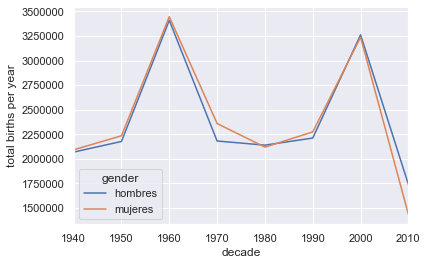

In [305]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()  # use Seaborn styles
table.plot()
plt.ylabel('total births per year');

# Operaciones vectorizadas sobre cadenas

Uno de los puntos fuertes de Python es su relativa facilidad para manejar y manipular datos de cadenas.
Pandas se basa en esto y proporciona un conjunto completo de *operaciones de cadenas vectorizadas* que se convierten en una pieza esencial del tipo de limpieza requerido cuando se trabaja con datos del mundo real.

## Operaciones sobre cadenas en Pandas

In [306]:
import numpy as np
x = np.array([2, 3, 5, 7, 11, 13])
x * 2

array([ 4,  6, 10, 14, 22, 26])

Para las matrices de cadenas, NumPy no proporciona un acceso tan simple.

In [307]:
data = ['elisa', 'mANOLI', 'Mario', 'DAVID']
[s.capitalize() for s in data]

['Elisa', 'Manoli', 'Mario', 'David']

Lo que rápidamente causa algunos problemas.

In [308]:
data = ['elisa', 'mANOLI', None, 'Mario', 'DAVID']
try:
    [s.capitalize() for s in data]
except AttributeError as e:
    print(e)

'NoneType' object has no attribute 'capitalize'


Pandas incluye características para satisfacer esta necesidad de operaciones de cadenas vectorizadas y para manejar correctamente los datos faltantes a través del atributo ``str`` de los objetos de la serie Pandas y de los objetos Index que contienen cadenas.

In [309]:
import pandas as pd
names = pd.Series(data)
names

0     elisa
1    mANOLI
2      None
3     Mario
4     DAVID
dtype: object

In [310]:
names.str.capitalize()

0     Elisa
1    Manoli
2      None
3     Mario
4     David
dtype: object

## Expresiones regulares en Python

Las expresiones regulares son un lenguaje poderoso para combinar patrones de texto. El módulo Python re proporciona soporte para expresiones regulares.

In [311]:
import re

En Python una búsqueda de expresiones regulares se escribe típicamente como:

```python
match = re.search(pat, str)
```

El método re.search() toma un patrón de expresión regular y una cadena y busca ese patrón dentro de la cadena. Si la búsqueda tiene éxito, search() devuelve un objeto coincidente o Ninguno de otro modo. Por lo tanto, la búsqueda suele ir seguida inmediatamente de una declaración if para comprobar si la búsqueda tuvo éxito, como se muestra en el siguiente ejemplo, que busca el patrón 'palabra:' seguida de una palabra de 3 letras:

In [312]:
string = """
    El teléfono que tengo anotado 619 45-61-23, pero ahora me sale que llamas desde el 626 45 62 34
"""
match = re.findall(r'\d{3}\s\d{2}[\s-]\d{2}[\s-]\d{2}', string)
match

['619 45-61-23', '626 45 62 34']

In [313]:
string = 'una palabra de ejemplo:gato!!'
match = re.search(r'ejemplo:\w\w\w\w', string)

In [314]:
if match:                      
    print('encontrado', match.group())
else:
    print('no sé encontró nada')

encontrado ejemplo:gato


### Patrones básicos

- `a`, `X`, `9` -- carácteres que sólo coinciden con sí mismos, salvo los especiales: `. ^ $ * + ? { [ ] \ | ( )`.
- `.` (un punto) -- cualquier carácter excepto salto de línea `\n`.
- `\w` (w minúscula) -- equivale a un carácter del rango `[a-zA-Z0-9_]`. `\W` sería lo contrario.
- `\b` -- frontera entre palabras y no palabras.
= `\s` -- (s minúscula) un caracter de espacio `[ \n\r\t\f]`. `\S` sería lo contrario.
- `\t`, `\n`, `\r` -- tabulador, nueva línea, retorno de carro.
- `\d` -- dígito decimal `[0-9]`.
- `^` = inictio, `\$` = final -- el inicio y el final de una cadena.
- `\` -- cancela el sentido especial del caracter al que acompañe.

In [315]:
# primera ocurrencia
match = re.search(r'eee', 'bieeen')
print(match)

<re.Match object; span=(2, 5), match='eee'>


In [316]:
match = re.search(r'EEE', 'bieeen', re.IGNORECASE)
print(match)

<re.Match object; span=(2, 5), match='eee'>


In [317]:
## . = any char but \n
match = re.search(r'..n', 'bieeen')
print(match)  #  found, match.group() == "iig"

<re.Match object; span=(3, 6), match='een'>


In [318]:
## \d = digit char, \w = word char
match = re.search(r'\d', 'b1333n')
print(match)

<re.Match object; span=(1, 2), match='1'>


In [319]:
match = re.search(r'\w\w\w', '@@abcd!!')
print(match)

<re.Match object; span=(2, 5), match='abc'>


### Repetition

- `+` -- 1 o más ocurrencias
- `*` -- 0 o más ocurrencias
- `?` -- 0 o 1 ocurrencias


In [320]:
## i+ = one or more i's, as many as possible.
match = re.search(r'bie+n', 'bieeen')
print(match)  #  found, match.group() == "piii"

<re.Match object; span=(0, 6), match='bieeen'>


In [321]:
## Finds the first/leftmost solution, and within it drives the +
## as far as possible (aka 'leftmost and largest').
## In this example, note that it does not get to the second set of i's.
match = re.search(r'e+', 'bieeeneeee')
print(match)  #  found, match.group() == "ii"

<re.Match object; span=(2, 5), match='eee'>


In [322]:
## \s* = zero or more whitespace chars
match = re.search(r'\d\s*\d\s*\d', 'xx1 2   3xx')
print(match)

<re.Match object; span=(2, 9), match='1 2   3'>


In [323]:
match = re.search(r'\d\s*\d\s*\d', 'xx12  3xx')
print(match)

<re.Match object; span=(2, 7), match='12  3'>


In [324]:
match = re.search(r'\d\s*\d\s*\d', 'xx123xx')
print(match)

<re.Match object; span=(2, 5), match='123'>


In [325]:
## ^ = matches the start of string, so this fails:
match = re.search(r'^b\w+', 'muy bieeeen')
print(match)

None


In [326]:
## but without the ^ it succeeds:
match = re.search(r'b\w+', 'muy bieeen')
print(match) 

<re.Match object; span=(4, 10), match='bieeen'>


### Detectando emails

In [327]:
string = 'purple alice-b@google.com monkey dishwasher'
match = re.search(r'\w+@\w+', string)
if match:
    print(match.group())

b@google


In [328]:
match = re.search(r'[\w.-]+@[\w.-]+', string)
if match:
    print(match.group())  ## 'alice-b@google.com'

alice-b@google.com


### Extracción de grupos

In [329]:
string = 'purple alice-b@google.com monkey dishwasher'
match = re.search('([\w.-]+)@([\w.-]+)', string)
if match:
    print(match.group())  ## 'alice-b@google.com' (the whole match)
    print(match.group(1))  ## 'alice-b' (the username, group 1)
    print(match.group(2))  ## 'google.com' (the host, group 2)

alice-b@google.com
alice-b
google.com


#### findall

In [330]:
string = 'purple alice@google.com, blah monkey bob@abc.com blah dishwasher'

In [331]:
emails = re.findall(r'[\w\.-]+@[\w\.-]+', string) ## ['alice@google.com', 'bob@abc.com']
for email in emails:
    print(email)

alice@google.com
bob@abc.com


#### findall y los grupos

In [332]:
string = 'purple alice@google.com, blah monkey bob@abc.com blah dishwasher'
tuples = re.findall(r'([\w\.-]+)@([\w\.-]+)', string)
print(tuples)  ## [('alice', 'google.com'), ('bob', 'abc.com')]
for pair in tuples:
    print(pair[0])  ## username
    print(pair[1])  ## host

[('alice', 'google.com'), ('bob', 'abc.com')]
alice
google.com
bob
abc.com


### Modificadores

- `IGNORECASE` -- ignora las diferencias entre mayúsculas y minúsculas para la correspondencia, de modo que `a` coincide tanto con `a` como con `A`.
- `DOTALL` -- permite que el punto (.) coincida con la nueva línea -- normalmente coincide con cualquier cosa menos con la nueva línea. Esto puede hacerte tropezar -- crees que .* coincide con todo, pero por defecto no pasa del final de una línea. Tenga en cuenta que \s (espacio en blanco) incluye nuevas líneas, por lo que si desea que coincida con una serie de espacios en blanco que pueden incluir una nueva línea, sólo tiene que usar \ Ns*
- `MULTILINE` -- Dentro de una cadena hecha de muchas líneas, permita que ^ y $ coincidan con el inicio y el final de cada línea. Normalmente `^/$` coincidiría con el inicio y el final de toda la cadena. Codicioso vs. No codicioso (opcional)

### Sustitución

In [333]:
string = 'purple alice@google.com, blah monkey bob@abc.com blah dishwasher'
## \1 is group(1), \2 group(2) in the replacement

print(re.sub(r'([\w\.-]+)@([\w\.-]+)', r'\1@yo-yo-dyne.com', string))

purple alice@yo-yo-dyne.com, blah monkey bob@yo-yo-dyne.com blah dishwasher


## Métodos de cadenas en Pandas

En general, casi todos los métodos de cadenas disponibles en Python lo están en Pandas.

In [334]:
team = pd.Series(['Javier Ruiz', 'Álvaro Pérez', 'Salvador Ros',
                  'Luisa Díaz', 'Elena González', 'Laura Alises'])

### Métodos similares a los nativos pero vectorizados

|     &nbsp;        |&nbsp;                  |&nbsp;                  |&nbsp;                  |
|-------------|------------------|------------------|------------------|
|``len()``    | ``lower()``      | ``translate()``  | ``islower()``    | 
|``ljust()``  | ``upper()``      | ``startswith()`` | ``isupper()``    | 
|``rjust()``  | ``find()``       | ``endswith()``   | ``isnumeric()``  | 
|``center()`` | ``rfind()``      | ``isalnum()``    | ``isdecimal()``  | 
|``zfill()``  | ``index()``      | ``isalpha()``    | ``split()``      | 
|``strip()``  | ``rindex()``     | ``isdigit()``    | ``rsplit()``     | 
|``rstrip()`` | ``capitalize()`` | ``isspace()``    | ``partition()``  | 
|``lstrip()`` |  ``swapcase()``  |  ``istitle()``   | ``rpartition()`` |

Algunos devuelven cadenas.

In [335]:
team.str.lower()

0       javier ruiz
1      álvaro pérez
2      salvador ros
3        luisa díaz
4    elena gonzález
5      laura alises
dtype: object

Otros números.

In [336]:
team.str.len()

0    11
1    12
2    12
3    10
4    14
5    12
dtype: int64

Valores lógicos.

In [337]:
team.str.startswith('L')

0    False
1    False
2    False
3     True
4    False
5     True
dtype: bool

E incluso listas

In [338]:
team.str.split()

0       [Javier, Ruiz]
1      [Álvaro, Pérez]
2      [Salvador, Ros]
3        [Luisa, Díaz]
4    [Elena, González]
5      [Laura, Alises]
dtype: object

### Métodos que usan expresiones regulares

| Método | Descripción |
|--------|-------------|
| ``match()`` | Llama a``re.match()`` y devuelve un valor lógico |
| ``extract()`` |  Llama a ``re.match()`` y devuelve cadenas con las coincidencias.|
| ``findall()`` | Llama a ``re.findall()`` |
| ``replace()`` | Reemplaza las ocurrencias de un patrón con otra cadena|
| ``contains()`` | Llama a ``re.search()`` y devuelve un valor lógico |
| ``count()`` | Cuenta las ocurrencias de un patrón|
| ``split()``   | Equivalente a ``str.split()``, pero acepta regexs |
| ``rsplit()`` | Equivalente a ``str.rsplit()``, pero acepta regexps |

In [339]:
team.str.extract('([A-Za-z]+)', expand=False)

0      Javier
1       lvaro
2    Salvador
3       Luisa
4       Elena
5       Laura
dtype: object

In [340]:
team.str.extract('([ÁA-Za-z]+)\s(.+)', expand=True)

,0,1
0,Javier,Ruiz
1,Álvaro,Pérez
2,Salvador,Ros
3,Luisa,Díaz
4,Elena,González
5,Laura,Alises


O podemos hacer algo más complicado, como encontrar todos los nombres que comienzan y terminan con una consonante, haciendo uso de los caracteres de inicio de cadena (``^``) y final de cadena (``$``) de expresión regular:

In [341]:
team.str.findall(r'^[^AEIOUÁÉÍÓÚ].*[^aeiouáéíóú]$')

0     [Javier Ruiz]
1                []
2    [Salvador Ros]
3      [Luisa Díaz]
4                []
5    [Laura Alises]
dtype: object

### Miscelánea de métodos

| Método | Descripción |
|--------|-------------|
| ``get()`` | Obtener el elemento de una posición |
| ``slice()`` | Obtener un corte de la cadena|
| ``slice_replace()`` | Reemplazar un corte con un valor pasado|
| ``cat()``      | Concatenar cadenas|
| ``repeat()`` | Repetir valores |
| ``normalize()`` | Devolver la versión unicode de una cadena |
| ``pad()`` | Añadir spacios en blanco a la derecha, izquierza, o ambos lados|
| ``wrap()`` | Dividir cadenas largas para que ocupen un ancho fijo|
| ``join()`` | Unir cadenas en cada elemento de la Series con un separador |
| ``get_dummies()`` | extraer variables como nuevas columnas de un DataFrame |

#### Acceso y troceado de objetos vectorizados

Las operaciones ``get()`` y ``slice()``, en particular, permiten el acceso a elementos vectorizados desde cada array.
Por ejemplo, podemos obtener una rebanada de los tres primeros caracteres de cada matriz usando ``str.slice(0, 3)``.
Tenga en cuenta que este comportamiento también está disponible a través de la sintaxis de indexación normal de Python; por ejemplo, ``df.str.slice(0, 3)`` es equivalente a ``df.str[0:3]``:

In [342]:
team.str[0:3]

0    Jav
1    Álv
2    Sal
3    Lui
4    Ele
5    Lau
dtype: object

In [343]:
team.str.get(0) == team.str[0]

0    True
1    True
2    True
3    True
4    True
5    True
dtype: bool

La indexación mediante ``df.str.get(i)`` y ``df.str[i]`` es igualmente similar.

Estos métodos ``get()`` y ``slice()`` también permiten acceder a los elementos de los arrays devueltos por ``split()``.
Por ejemplo, para extraer el apellido de cada entrada, podemos combinar ``split()`` y ``get()``:

In [344]:
team.str.split()

0       [Javier, Ruiz]
1      [Álvaro, Pérez]
2      [Salvador, Ros]
3        [Luisa, Díaz]
4    [Elena, González]
5      [Laura, Alises]
dtype: object

In [345]:
team.str.split().str.get(0)

0      Javier
1      Álvaro
2    Salvador
3       Luisa
4       Elena
5       Laura
dtype: object

In [346]:
# por qué no? team.str.split() es una Series
team.str.split().get(0)

['Javier', 'Ruiz']

#### Variables indicadoras

Otro método que requiere un poco de explicación extra es el método ``get_dummies()``.
Es útil cuando los datos tienen una columna que contiene algún tipo de indicador codificado.
Por ejemplo, podríamos tener un conjunto de datos que contenga información en forma de códigos, como A="nacionalidad estadounidense", B="nacionalidad española", C="le gusta el queso", D="le gusta el pan".

In [347]:
full_team = pd.DataFrame({'name': team,
                           'info': ['B|C|D', 'B|D', 'A|C',
                                    'B|D', 'B|C', 'B|C|D']})
full_team

,name,info
0,Javier Ruiz,B|C|D
1,Álvaro Pérez,B|D
2,Salvador Ros,A|C
3,Luisa Díaz,B|D
4,Elena González,B|C
5,Laura Alises,B|C|D


La rutina ``get_dummies()`` permite dividir rápidamente estas variables indicadoras en un ``DataFrame``:

In [348]:
full_team['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


In [349]:
pd.concat([
    full_team,
    full_team['info'].str.get_dummies().rename(columns={'A': "USA", 'B': 'Spain', 'C': 'UK', 'D': 'Canada'})
], axis='columns').drop('info', axis='columns')

,name,USA,Spain,UK,Canada
0,Javier Ruiz,0,1,1,1
1,Álvaro Pérez,0,1,0,1
2,Salvador Ros,1,0,1,0
3,Luisa Díaz,0,1,0,1
4,Elena González,0,1,1,0
5,Laura Alises,0,1,1,1


<div style="font-size: 1em; margin: 1em 0 1em 0; border: 1px solid #86989B; background-color: #f7f7f7; padding: 0;">
<p style="margin: 0; padding: 0.1em 0 0.1em 0.5em; color: white; border-bottom: 1px solid #86989B; font-weight: bold; background-color: #AFC1C4;">
Ejercicio
</p>
<p style="margin: 0.5em 1em 0.5em 1em; padding: 0;">

1. En el dataset de `twitter`, los retweets están marcados porque empiezan por `RT @`. Se pide devolver el tweet más retweeteado y dar además los totales de retweets por idioma.
2. El fichero [`articulos.csv`](https://raw.githubusercontent.com/versae/master-us-ipppd/master/data/articulos.csv) contiene una tabla de artículos en la que la descripciones con un poco caóticas. Se pide añadir una nueva columna que marque si un artículo se refiere a ropa o no (no tiene por qué ser 100% exacto), y luego calcular el número de artículos por temporada y por esta nueva columna. *Pista*: Consideraremos que un artículo es ropa si es camisa, bufanda, t-shirt, jersey, pantalon, zapato, chaqueta, dress, top, sudadera, cazadora, polo, o traje.

</p>
</div>

In [350]:
# Escriba aquí su solución

,#rts
text,
"RT @AnnaKendrick47: We should be thanking Apple for launching the $10,000 ""apple watch"" as the new gold standard in douchebag detection.",246


In [351]:
# Escriba aquí su solución

ROPA,False,True
TEMPORADA,,
0,315,127
1,8,3
2,4,1
3,9,17
4,8,8


# Series temporales

Pandas fue desarrollado en el contexto del modelado financiero, por lo que, como es de esperar, contiene un conjunto bastante extenso de herramientas para trabajar con fechas, horas y datos indexados en el tiempo.
Los datos de fecha y hora vienen de muchas maneras:

- Los *sellos de tiempo* (*timestamp*) hacen referencia a momentos particulares en el tiempo (por ejemplo, el 7 de junio de 2015 a las 7:00 a.m.).
- Los *intervalos de tiempo* y *períodos* hacen referencia a una duración de tiempo entre un punto de inicio y un punto final en particular; por ejemplo, el año 2015. Los períodos suelen hacer referencia a un caso especial de intervalos de tiempo en el que cada intervalo tiene una duración uniforme y no se superpone (por ejemplo, períodos de 24 horas que comprenden días).
- Los *deltas de tiempo* o *duraciones* hacen referencia a una duración exacta de tiempo (por ejemplo, una duración de 22,56 segundos).

## Dates and Times in Python


Los objetos básicos de Python para trabajar con fechas y horas residen en el módulo ``datetime`` incorporado.
Junto con el módulo ``dateparser`` de terceros, puede utilizarlo para realizar rápidamente una serie de funcionalidades útiles sobre fechas y horas.

In [352]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

O usando el paquete ``dateparser``.

In [353]:
import dateparser

date = dateparser.parse("21 de Diciembre de 2018", languages=['es'])
date

datetime.datetime(2018, 12, 21, 0, 0)

In [354]:
date.strftime('%A')

'Friday'

En la última línea, hemos utilizado uno de los códigos de formato de cadena estándar para imprimir fechas (``"%A"``), sobre el que puede leer en la sección [strftime](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) de la documentación de [datetime] de Python (https://docs.python.org/3/library/datetime.html).

### Arrays NumPy de tiempos en ``datetime64``.

Las debilidades del formato de fecha y hora de Python inspiraron al equipo de NumPy a agregar un conjunto de tipos de datos de series temporales nativas a NumPy.
El dtype ``datetime64`` codifica las fechas como enteros de 64 bits, y así permite que las matrices de fechas se representen de forma muy compacta.
El ``datetime64`` requiere un formato de entrada muy específico:

In [355]:
import numpy as np
date = np.array('2018-12-21', dtype=np.datetime64)
date

array('2018-12-21', dtype='datetime64[D]')

Sin embargo, una vez que tenemos esta fecha formateada, podemos hacer rápidamente operaciones vectorizadas sobre ella:

In [356]:
date + np.arange(12)

array(['2018-12-21', '2018-12-22', '2018-12-23', '2018-12-24',
       '2018-12-25', '2018-12-26', '2018-12-27', '2018-12-28',
       '2018-12-29', '2018-12-30', '2018-12-31', '2019-01-01'],
      dtype='datetime64[D]')

Debido al tipo uniforme en los arreglos NumPy ``datetime64``, este tipo de operación se puede realizar mucho más rápido que si estuviéramos trabajando directamente con los objetos ```datetime``` de Python, especialmente a medida que los arreglos se hacen más grandes.

Un detalle de los objetos ``datetime64`` y ``timedelta64`` es que están construidos sobre una *unidad de tiempo fundamental*.
Debido a que el objeto ``datetime64`` está limitado a una precisión de 64 bits, el rango de tiempos codificables es de $2^{64}$ por esta unidad fundamental.
En otras palabras, ``datetime64`` impone un equilibrio entre *resolución horaria* y *período máximo de tiempo*.

Por ejemplo, si desea una resolución de tiempo de un nanosegundo, sólo tiene información suficiente para codificar un rango de nanosegundos de $2^{64}$, o algo menos de 600 años.
NumPy deducirá la unidad deseada de la entrada.

Por ejemplo, aquí hay una fecha y hora basada en el día:

In [357]:
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

Y otra a nivel de minuto.

In [358]:
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

In [359]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

|Código  | Significado | Intervalo (relativo) | Intervalo (absoluto)   |
|--------|-------------|----------------------|------------------------|
| ``Y``  | Año	       | ± 9.2e18 años        | [9.2e18 BC, 9.2e18 AD] |
| ``M``  | Mes         | ± 7.6e17 años        | [7.6e17 BC, 7.6e17 AD] |
| ``W``  | Semana	   | ± 1.7e17 años        | [1.7e17 BC, 1.7e17 AD] |
| ``D``  | Dïa         | ± 2.5e16 años        | [2.5e16 BC, 2.5e16 AD] |
| ``h``  | Hora        | ± 1.0e15 años        | [1.0e15 BC, 1.0e15 AD] |
| ``m``  | Minuto      | ± 1.7e13 años        | [1.7e13 BC, 1.7e13 AD] |
| ``s``  | Segundo     | ± 2.9e12 años        | [ 2.9e9 BC, 2.9e9 AD]  |
| ``ms`` | Milisegundo | ± 2.9e9 años         | [ 2.9e6 BC, 2.9e6 AD]  |
| ``us`` | Microsegundo| ± 2.9e6 años         | [290301 BC, 294241 AD] |
| ``ns`` | Nanosegundo | ± 292 años           | [ 1678 AD, 2262 AD]    |
| ``ps`` | Picosegundo | ± 106 días           | [ 1969 AD, 1970 AD]    |
| ``fs`` | Femtosegundo| ± 2.6 horas          | [ 1969 AD, 1970 AD]    |
| ``as`` | Attosegundo | ± 9.2 segundos       | [ 1969 AD, 1970 AD]    |

### Fechas y horas en pandas: lo mejor de ambos mundos

Pandas proporcionar un objeto ``Timestamp`` que combina la facilidad de uso de ``datetime`` con el almacenamiento eficiente y la interfaz vectorizada de ``numpy.datetime64``.
A partir de un grupo de estos objetos ``Timestamp``, Pandas puede construir un ``DatetimeIndex`` que puede ser usado para indexar datos en una ``Serie`` o ``DataFrame``.

In [360]:
import pandas as pd
import dateparser
date = pd.to_datetime(dateparser.parse("21 de Diciembre de 2018"))
date

Timestamp('2018-12-21 00:00:00')

In [361]:
date.strftime('%A')

'Friday'

Además, podemos realizar operaciones vectorizadas al estilo NumPy directamente sobre este mismo objeto.

In [362]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2018-12-21', '2018-12-22', '2018-12-23', '2018-12-24',
               '2018-12-25', '2018-12-26', '2018-12-27', '2018-12-28',
               '2018-12-29', '2018-12-30', '2018-12-31', '2019-01-01'],
              dtype='datetime64[ns]', freq=None)

## Pandas Time Series: Indexación por tiempo

Donde las herramientas de series de tiempo de Pandas realmente se vuelven útiles es cuando se empieza a *indicar datos por marcas de tiempo*.

Por ejemplo, podemos construir un objeto ``Series`` que tenga datos indexados en el tiempo:

In [363]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [364]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [365]:
data['2014-07-04':'2020-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

Hay operaciones especiales adicionales de indexación de fecha solamente, como pasar un año para obtener una porción de todos los datos de ese año:

In [366]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

## Estructuras de datos de las series temporales de Pandas

Esta sección introducirá las estructuras de datos fundamentales de Pandas para trabajar con datos de series temporales:

- Para *sellos de tiempo*, Pandas proporciona el tipo ``Timestamp``. Como se mencionó anteriormente, es esencialmente un reemplazo para el tipo de datos nativo de Python ``datetime``, pero se basa en el tipo de datos ``numpy.datetime64``, que es más eficiente. La estructura de índice asociada es ``DatetimeIndex``.
- Para *períodos de tiempo*, Pandas proporciona el tipo ``Period``. Codifica un intervalo de frecuencia fija basado en ``numpy.datetime64``. La estructura de índice asociada es ``PeriodIndex``.
- Para *deltas de tiempo* o *duraciones*, Pandas proporciona el tipo ``Timedelta``. Timedelta es un reemplazo más eficiente para el tipo nativo de Python ``datetime.timedelta``, y se basa en ``numpy.timedelta64``. La estructura de índice asociada es ``TimedeltaIndex``.

Los objetos más fundamentales de estos objetos fecha/hora son los objetos ``Timestamp`` y ``DatetimeIndex``.
Aunque estos objetos de clase pueden ser invocados directamente, es más común usar la función ``pd.to_datetime()``, que puede analizar una amplia variedad de formatos.
Pasar una sola fecha a ``pd.to_datetimetime()`` produce un ``Timestamp``; pasar una serie de fechas por defecto produce un ``DatetimeIndex``:

In [367]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', dateparser.parse("7 de julio de 2015"), '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

Cualquier ``DatetimeIndex`` puede convertirse en ``PeriodIndex`` con la función ``to_period()`` con la adición de un código de frecuencia; aquí usaremos ``'D'`` para indicar la frecuencia diaria:

In [368]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

Se crea un "índice de tiempo", por ejemplo, cuando se resta una fecha a otra:

In [369]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

### Secuencias regulares: ``pd.date_range()``

Para hacer más conveniente la creación de secuencias de fechas regulares, Pandas ofrece algunas funciones para este propósito: ``pd.date_range()`` para marcas de tiempo, ``pd.period_range()`` para períodos, y ``pd.timedelta_range()`` para deltas de tiempo.
Hemos visto que el ``range()`` de Python y el ``np.arange()`` de NumPy convierten un punto de partida, un punto final y un tamaño de paso opcional en una secuencia.
De manera similar, ``pd.date_range()`` acepta una fecha de inicio, una fecha de finalización y un código de frecuencia opcional para crear una secuencia regular de fechas.
Por defecto, la frecuencia es de un día:

In [370]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [371]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [372]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [373]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

In [374]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

## Frecuencias e intervalos

| Código | Descripción           | Código | Descripción                 |
|--------|-----------------------|--------|-----------------------------|
| ``D``  | Día natural           | ``B``  | Día laboral                 |
| ``W``  | Semanal               |   &nbsp;     | &nbsp;                            |
| ``M``  | Fin de mes            | ``BM`` | Fin de mes laboral          |
| ``Q``  | Fin de cuatrimestre   | ``BQ`` | Fin de cuatrimestre laboral |
| ``A``  | Fin de año            | ``BA`` | Fin de año                  |
| ``H``  | Horas                 | ``BH`` | Horario laboral             |
| ``T``  | Minutos               |&nbsp;        | &nbsp;                            |
| ``S``  | Segunods              |&nbsp;        | &nbsp;                            |
| ``L``  | Milisegundos          |     &nbsp;   | &nbsp;                            |
| ``U``  | Microsegundos         |&nbsp;        | &nbsp;                            |
| ``N``  | Nnoasegundos          |&nbsp;        | &nbsp;                            |

Las frecuencias mensuales, trimestrales y anuales se marcan al final del período especificado.
Añadiendo un sufijo ``S`` a cualquiera de ellos, serán marcados al principio:

| Código    | Descripción            | Código    | Descripción            |
|---------|------------------------|---------|------------------------|
| ``MS``  | Inicio de mes            |``BMS``  | Inicio de mes laboral   |
| ``QS``  | Inicio de cuatrimestre          |``BQS``  | Inicio de cuatrimestre laboral |
| ``AS``  | Inicio de año             |``BAS``  | Inicio de año laboral    |

Además, puede cambiar el mes utilizado para marcar cualquier código trimestral o anual añadiendo un código de tres letras como sufijo:

- ``Q-JAN``, ``BQ-FEB``, ``QS-MAR``, ``BQS-APR``, etc.
- `A-JAN`, `BA-FEB`, `AS-MAR`, `BAS-APR`, etc.

Del mismo modo, el punto de división de la frecuencia semanal puede modificarse añadiendo un código de tres letras para los días de la semana:

- `W-SUN`, `W-MON`, `W-TUE`, `W-WED`, etc.

Además, los códigos pueden combinarse con números para especificar otras frecuencias.
Por ejemplo, para una frecuencia de 2 horas y 30 minutos, podemos combinar los códigos de hora (``H``) y minuto (``T``).

In [375]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

## Resampleo, desplazamiento y ventanas

La capacidad de utilizar fechas y horas como índices para organizar intuitivamente y acceder a los datos es una pieza importante de las herramientas de las series temporales de Pandas.
Las ventajas de los datos indexados en general (alineación automática durante las operaciones, corte y acceso intuitivo a los datos, etc.) siguen siendo válidas, y Pandas proporciona varias operaciones adicionales específicas para cada serie temporal.


In [376]:
from pandas_datareader import data

stock = data.DataReader('GOOG', start='2004', end='2016',
                        data_source='yahoo')
stock.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813286,49.982655,44871300.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942800.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342800.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239193,15319700.0,52.239193
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232100.0,52.802086


In [377]:
stock = stock['Close']

In [378]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

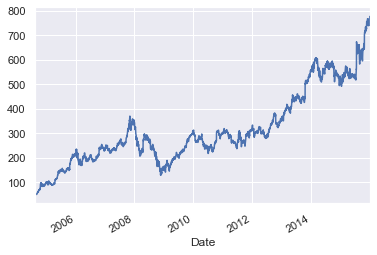

In [379]:
stock.plot();

### Resampleando y convirtiendo frecuencias

Una necesidad común de los datos de series temporales es el remuestreo a una frecuencia mayor o menor.
Esto se puede hacer usando el método ``resample()``, o el método ``asfreq()`` mucho más simple.
La diferencia principal entre los dos es que ``resample()`` es fundamentalmente una *agrupación de datos*, mientras que ``asfreq()`` es fundamentalmente una *selección de datos*.

Echando un vistazo al precio de cierre de Google, vamos a comparar lo que los dos devuelven cuando bajamos la muestra de los datos.
Aquí remuestrearemos los datos al final del año comercial:

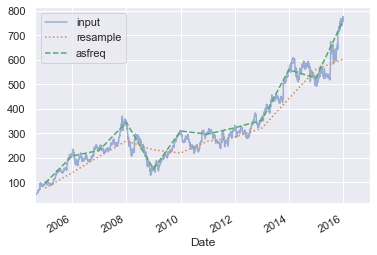

In [380]:
stock.plot(alpha=0.5, style='-')
stock.resample('BA').mean().plot(style=':')
stock.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

Note la diferencia: en cada punto, ``resample`` informa el *medio del año anterior*, mientras que ```asfreq``` informa el *valor al final del año*.

Para el up-sampling, ``resample()`` y ``asfreq()`` y ``asfreq()`` son en gran medida equivalentes, aunque el resample tiene muchas más opciones disponibles.
En este caso, el valor por defecto para ambos métodos es dejar los puntos de muestra ascendente vacíos, es decir, llenos de valores NA.
Al igual que con la función ``pd.fillna()`` discutida anteriormente, ``asfreq()`` acepta un argumento ``method`` para especificar cómo se imputan los valores.

Remuestreémos los datos de los días hábiles con una frecuencia diaria (es decir, incluyendo los fines de semana).

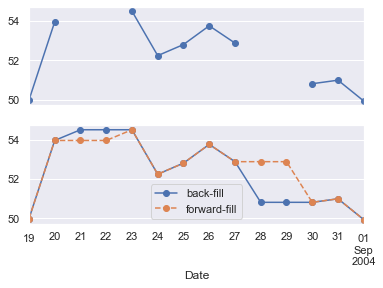

In [381]:
fig, ax = plt.subplots(2, sharex=True)
data = stock.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

### Desplazamientos de tiempo

Otra operación común, específica de una serie temporal, es el desplazamiento de datos en el tiempo.
Pandas tiene dos métodos estrechamente relacionados para computar esto: ``shift()`` y ``tshift()``.
En resumen, la diferencia entre ellos es que ``shift()`` *desplaza los datos*, mientras que ``tshift()`` *desplaza el índice*.
En ambos casos, el desplazamiento se especifica en múltiplos de la frecuencia.

Aquí haremos tanto ``shift()`` como ``tshift()`` por 900 días; 

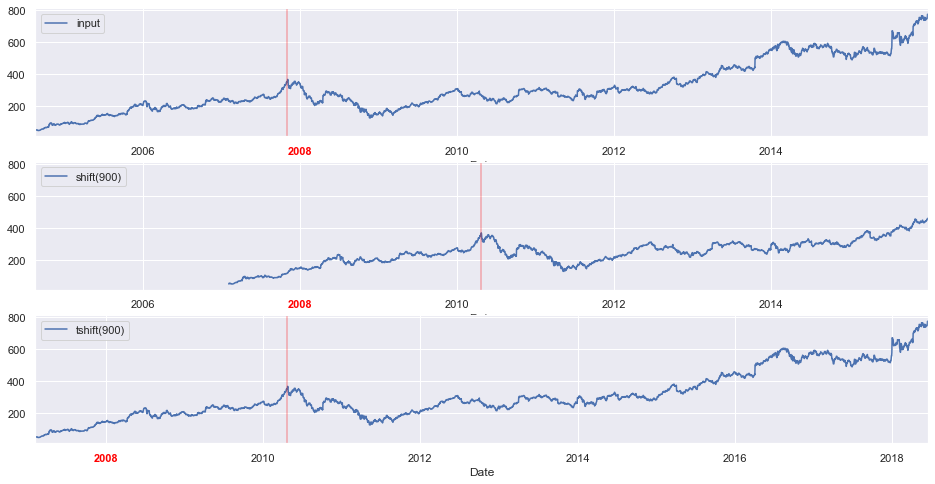

In [382]:
fig, ax = plt.subplots(3, sharey=True, figsize=(16,8))

# apply a frequency to the data
goog = stock.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red')

Vemos aquí que ``shift(900)`` desplaza los *datos* en 900 días, sacando algunos de ellos del final de la gráfica (y dejando los valores de NA en el otro extremo), mientras que ``tshift(900)`` desplaza los valores del *índice** en 900 días.

#### Medias móviles

Las estadísticas continuas son un tercer tipo de operación específica de series temporales implementada en Pandas.
Esto se puede lograr mediante el atributo ``rolling()`` de los objetos ``Series`` y ``DataFrame``, que devuelve una vista similar a la que vimos con la operación ``groupby``

Esta vista evolutiva permite disponer por defecto de una serie de operaciones de agregación.

Por ejemplo, aquí está la media móvil centrada en un año y la desviación estándar de los precios de las acciones de Google.

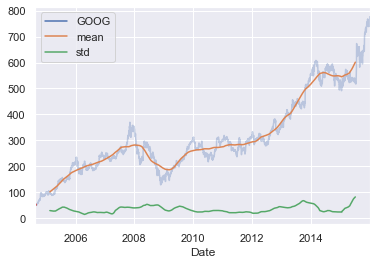

In [383]:
ax = goog.plot()
rolling = goog.rolling(365, center=True)
rolling.mean().plot(ax=ax)
rolling.std().plot(ax=ax)

ax = data.plot(style=['-', '--', ':'])
ax.legend(["GOOG", "mean", "std"])
ax.lines[0].set_alpha(0.3)

Al igual que con las operaciones de grupo, los métodos ``agregado()`` y ``apply()`` pueden utilizarse para cálculos personalizados de rodadura.

<div style="font-size: 1em; margin: 1em 0 1em 0; border: 1px solid #86989B; background-color: #f7f7f7; padding: 0;">
<p style="margin: 0; padding: 0.1em 0 0.1em 0.5em; color: white; border-bottom: 1px solid #86989B; font-weight: bold; background-color: #AFC1C4;">
Ejercicio
</p>
<p style="margin: 0.5em 1em 0.5em 1em; padding: 0;">

Dado el fichero [`bikes.csv`](https://raw.githubusercontent.com/versae/DH2304/master/data/bikes.csv) (https://raw.githubusercontent.com/versae/DH2304/master/data/bikes.csv) con estadísticas sobre los paseos en bicicleta en la ciudad de Montreal, se pide:
1. Cargar el fichero cambiando el separador de columna a `;`, parseando adecuadamente las fechas, y usándolas como índice del `DataFrame`.
2. Eliminar las columnas con datos faltantes.
3. Contar el número de paseos por día de la semana y lugar.
4. Comparar el uso del servicio entre los fines de semana y los días entre semana resampleando por semana.

</p>
</div>

In [384]:
# 1, 2, y 3. Escriba aquí su solución

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1
weekday,,,,,,,
0,134298,60329,90051,163767,90184,46204,130130
1,135305,58708,92035,165880,91399,35167,120088
2,152972,67344,104891,186061,102103,43263,133088
3,160131,69028,111895,196715,105674,45385,140241
4,141771,56446,98568,172390,89872,42470,137255
5,101578,34018,62067,105060,48289,52861,112828
6,99310,36466,55324,98308,50004,61485,117150


In [385]:
# 4. Escriba aquí su solución

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,Pierre-Dupuy,Rachel1,du Parc
weekend,,,,,,,
False,144895.4,62371,99488.0,176962.6,42497.8,132160.4,95846.4
True,100444.0,35242,58695.5,101684.0,57173.0,114989.0,49146.5


# Visualización de datos

El volumen de información existente en formato digital crece día a día. Tan solo la necesidad de gestión de esta información ya exige el uso de herramientas automáticas, pero con más motivo si queremos ir un poco más allá y realizar un análisis más detallado de esta información. Dada la cantidad de datos puesta en juego, la visualización de la información está adquiriendo cada vez más relevancia.

<img src="https://rougier.github.io/python-visualization-landscape/landscape-colors.png" width=960>
<div align="right">Adaptado por [Nicolas P. Rougier](https://github.com/rougier/python-visualization-landscape) de una presentación de [Jake VanderPlass](https://twitter.com/jakevdp/status/852308415372115968)</div>

## Conceptos generales de matplotlib

Matplotlib es una de las librerías más comunes de python para realizar la visualización de datos.

El módulo más básico de matplotlib es pyplot, que contiene un conjunto de funciones para añadir elementos como líneas, imágenes, texto, etc. a nuestros gráficos.

El método más sencilla es **plot**, que dibuja puntos en el espacio. Para ello, recibe dos arrays: 
- uno con las coordenadas x de cada punto
- otro array con las correspondientes coordenadas y de cada punto. 

Por defecto, plot une los puntos con líneas.

Una vez definimos el gráfico, usamos el método **show** para que se dibuje el gráfico.

La forma en la que se muestra un gráfico depende del contexto de aplicación en el que se esté utilizando. Pricipalmente, hay tres contextos para matplotlib:

- un programa interactivo python
- un terminal interactivo de python
- un notebook python

En los dos primeros casos, la invocación del método **show** supone que se abra una nueva ventana con el gráfico. En el caso de los notebook, el gráfico se muestra dentro del propio notebook.

In [386]:
# activa renderizado en línea en Jupyter con  matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [387]:
plt.rcParams["figure.figsize"] = (10, 6)  # default figure size in inches

A diferencia de bibliotecas como plotnine, ggpy, o la ggplot de R, matplotlib no sigue el libro de [Leland Wilkinson La gramática de los gráficos](https://www.amazon.com/Grammar-Graphics-Statistics-Computing/dp/0387245448). En su lugar, se basa en el modelo de Programación de Orientada a Objetos de Python y todos los aspectos de un gráfico están representados por objetos, métodos, propiedades y argumentos.

<img src="https://matplotlib.org/_images/anatomy.png" width=600>
<div align="right">From the [matplotlib documentation](https://matplotlib.org/examples/showcase/anatomy.html)</div>

A través de plt.style.use podemos seleccionar un estilo relativo a cómo se mostrarán los gráficos. Podemos crear nuestro propio estilo o utilizar uno que tengamos instalado.

In [388]:
plt.style.use('classic')

In [389]:
plt.style.available

['seaborn-deep',
 'ggplot',
 'seaborn-ticks',
 'seaborn-pastel',
 'seaborn-talk',
 'fast',
 'tableau-colorblind10',
 'seaborn-dark',
 'Solarize_Light2',
 'bmh',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 '_classic_test',
 'seaborn-notebook',
 'classic',
 'seaborn-muted',
 'seaborn-white',
 'seaborn',
 'seaborn-poster',
 'grayscale',
 'fivethirtyeight',
 'dark_background',
 'seaborn-bright',
 'seaborn-paper',
 'seaborn-whitegrid',
 'seaborn-darkgrid']

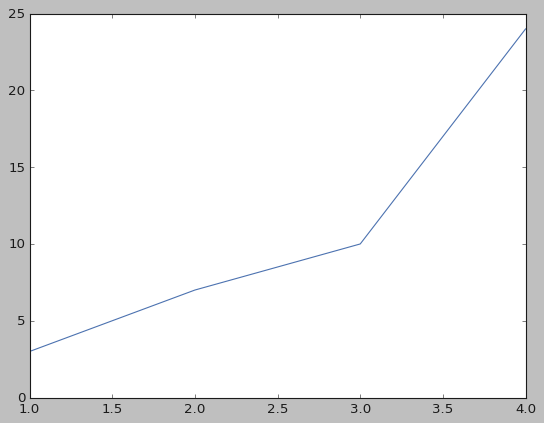

In [390]:
x = [1, 2, 3, 4]
y = [3, 7, 10, 24]
plt.plot(x,y)
plt.show()

También se puede renderizar directamente en Jupyter

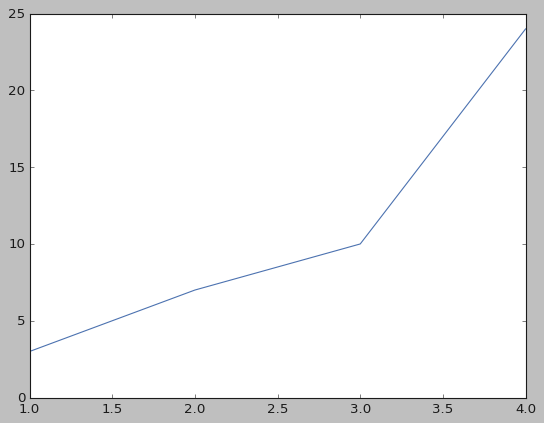

In [391]:
plt.plot(x,y)

Además de crear los puntos que va a contener el gráfico, también podemos modificar otros elementos como el título (método **title**), o los nombres de cada eje (métodos **xlabel** e **ylabel** respectivamente).

Text(0, 0.5, 'Eje y')

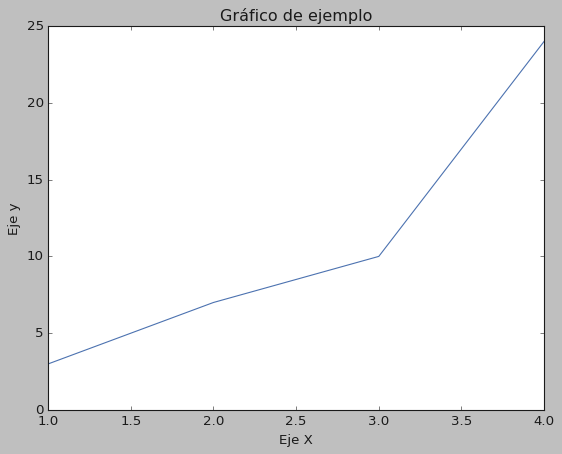

In [392]:
plt.plot(x,y)
plt.title("Gráfico de ejemplo")
plt.xlabel("Eje X")
plt.ylabel("Eje y")

Y podemos usar la orientación a objetos

Text(0, 0.5, 'Eje y')

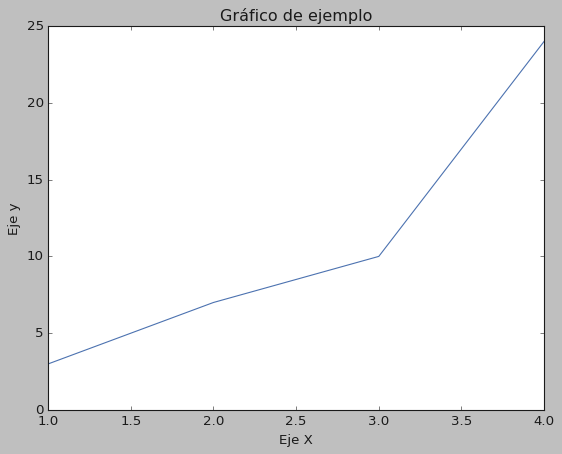

In [393]:
fig, ax = plt.subplots(1)
ax.plot(x,y)
ax.set_title("Gráfico de ejemplo")
ax.set_xlabel("Eje X")
ax.set_ylabel("Eje y")

Podemos guardar el gráfico a través del método **savefig** de la imagen. Para ello, primero tenemos que obtener la figura que estamos representando.



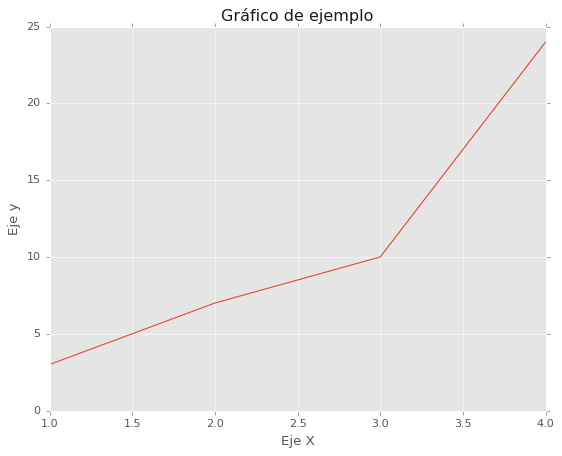

In [394]:
plt.style.use('ggplot')
fig = plt.figure()
plt.plot(x,y)
plt.title("Gráfico de ejemplo")
plt.xlabel("Eje X")
plt.ylabel("Eje y")

fig.savefig("grafico.png")

La extensión que indiquemos en el nombre del fichero marcará el formato en el que se guarda el fichero. Podemos ver los formatos disponibles.

In [395]:
fig.canvas.get_supported_filetypes()

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics'}

Para modificar el tamaño del gráfico usamos el método **figure** con el atributo figsize, que recibe una tupla de dos elementos: el primero indica el ancho de la figura y el segundo el alto. Ambos se expresan en pulgadas.

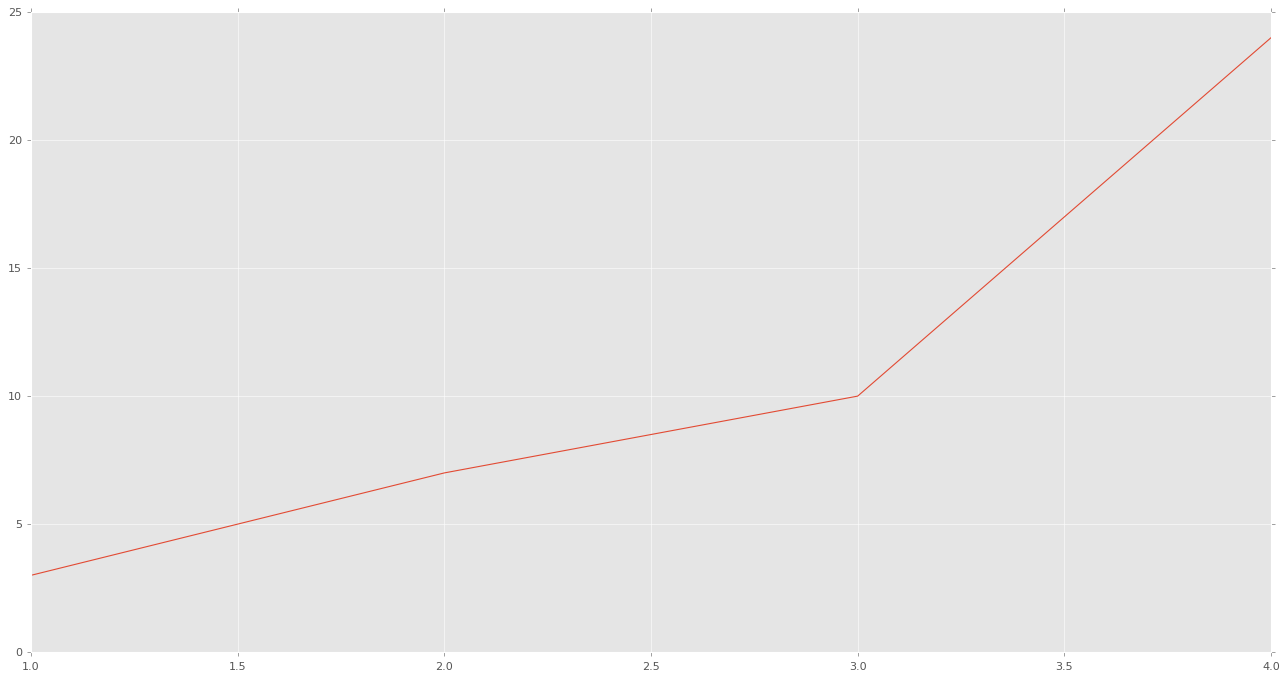

In [396]:
plt.figure(figsize=(20,10))
plt.plot(x,y)
plt.show()

## Dibujando varias líneas a la vez

La función plot nos permite dibujar varios conjuntos de datos a la vez. Para ello, dentro de la misma llamada vamos concatenando los conjuntos de datos y los formatos a utilizar.

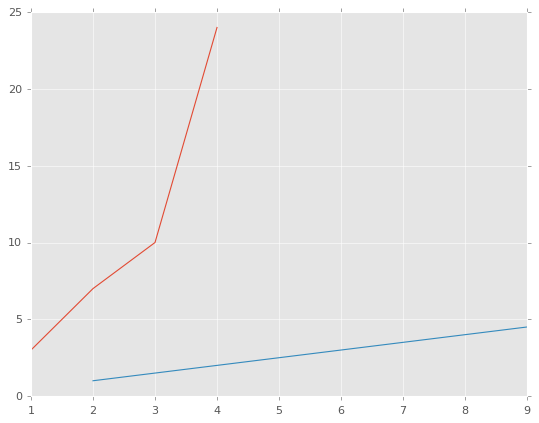

In [397]:
x2 = np.arange(2,10)
y2 = x2 / 2
plt.plot(x,y,x2,y2)
plt.show()

Otra forma de tener varios puntos en un mismo gráfico consiste en realizar llamadas consecutivas al método plot.

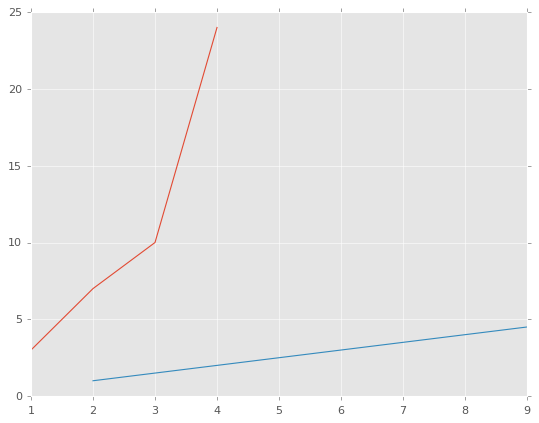

In [398]:
x2 = np.arange(2,10)
y2 = x2 / 2
plt.plot(x,y)
plt.plot(x2,y2)
plt.show()

Se puede cambiar el color de la línea usando el atributo color, asignándole el nombre del color que queremos usar (en inglés), o una abreviatura que indique el color (rgbcmyk).

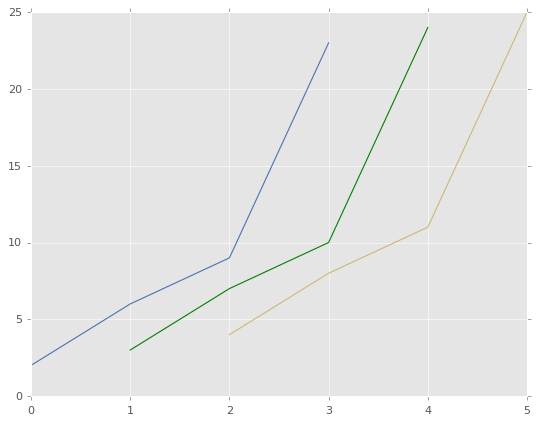

In [399]:
x = np.array(x)
y = np.array(y)
plt.plot(x,y,color="green")
plt.plot(x+1,y+1,color="y")
plt.plot(x-1,y-1,color="b")
plt.show()

Del mismo modo, se puede modificar el tipo de línea a través del atributo **linestyle** usando las siguientes opciones o sus correspondientes abreviaturas (entre paréntesis):

- solid (-)
- dashed (--)
- dashdot (-.)
- dotted (:)

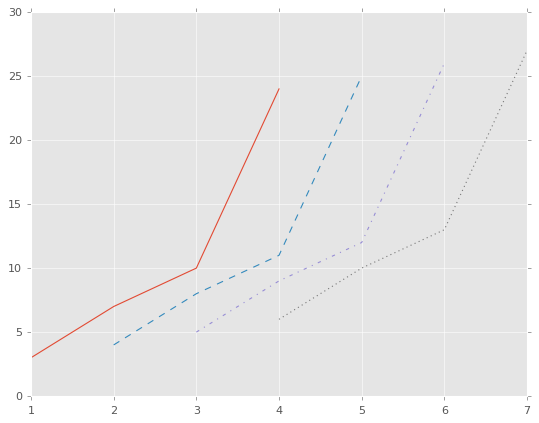

In [400]:
plt.plot(x,y,linestyle="solid")
plt.plot(x+1,y+1,linestyle="dashed")
plt.plot(x+2,y+2,linestyle="dashdot")
plt.plot(x+3,y+3,linestyle="dotted")
plt.show()

## Estilo de marcador

De modo similar, se puede modificar el estilo usado para dibujar cada punto de los especificados en el gráfico a través del atributo marker. Las opciones disponibles son:

- '.': punto
- ',': pixel
- 'o': círculo
- 'v': triángulo invertido
- '^': triángulo
- '<': triángulo girado a la izquierda
- '>': triángulo girado a la derecha
- '1': aspa hacia abajo
- '2': aspa hacia arriba
- '3': aspa hacia la izquierda
- '4': aspa hacia la derecha
- 's': cuadrado
- 'p': pentágono
- '*': estrella
- 'h': hexágono
- 'H': otro tipo de hexágono
- '+': símbolo de suma
- 'x': símbolo x
- 'D': diamante
- 'd': diamante estrecho
- '|': línea vertical
- '_': línea horizontal

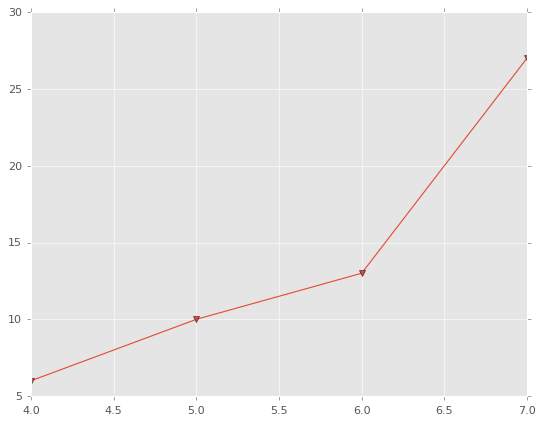

In [401]:
plt.plot(x+3,y+3,marker="v")
plt.show()

De forma opcional, al método plot le podemos pasar un tercer argumento para indicar conjuntamente la forma del punto, el tipo de línea y el color del dibujo. Cada elemento se indica con un caracter (de los vistos anteriormente) y los tres son opcionales.

Si no se aporta ninguna información de formato, se toma un valor del ciclo de estilo. En caso de aportarse información de formato de línea pero no de punto, se usará una línea sin puntos (marcadores).

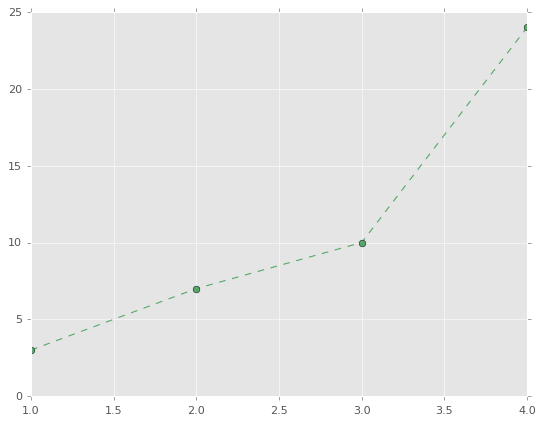

In [402]:
plt.plot(x,y,"go--")
plt.show()

Otros atributos que podemos utilizar para cambiar el formato son linewidth y markersize. A través de estos atributos, cambiamos el ancho de la línea y del marcador respectivamente.

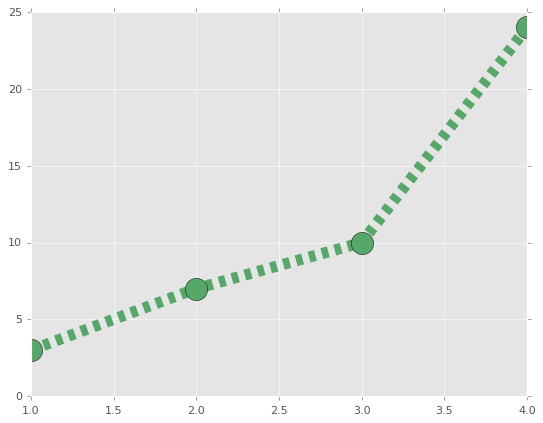

In [403]:
plt.plot(x,y,"go--",linewidth=10,markersize=20)
plt.show()

Matplotlib nos permite ajustar los límites del gráfico a nuestras necesidades. Para ello, podemos usar los métodos **xlim** e **ylim**. En ambos casos, indicamos los extremos de nuestro gráfico.

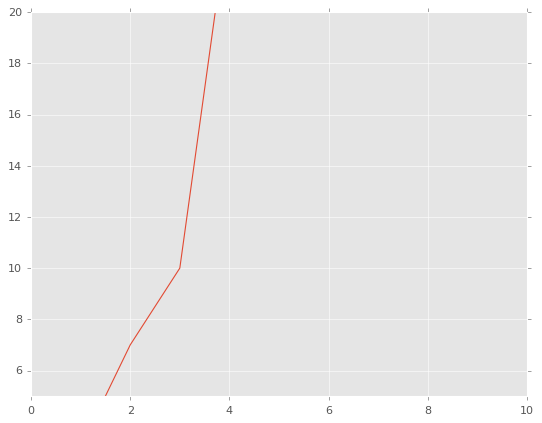

In [404]:
plt.plot(x,y)
plt.xlim(0,10)
plt.ylim(5,20)
plt.show()

También podemos fijar los límites para que el gráfico se muestre de forma inversa. Es decir, que los positivos crezcan hacia la izquierda y los negativos hacia la derecha.

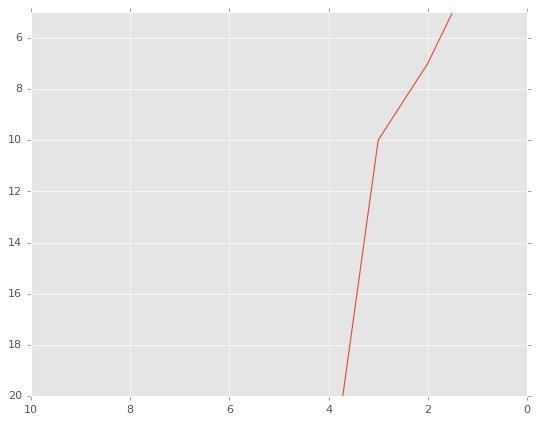

In [405]:
plt.plot(x,y)
plt.xlim(10,0)
plt.ylim(20,5)
plt.show()

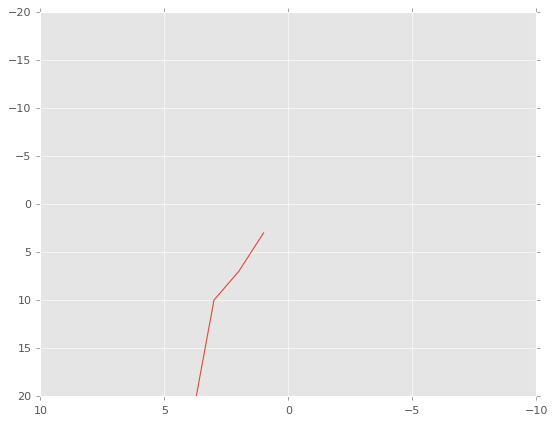

In [406]:
plt.plot(x,y)
plt.xlim(10,-10)
plt.ylim(20,-20)
plt.show()

También podemos hacer otros tipos de ajustes usando el método axis. Por un lado, podemos ajustar completamente el area del gráfico al dibujo usando el valor **tight**. Por otro lado, podemos usar el valor **equal** para tener la misma relación en el eje x y en el eje y.

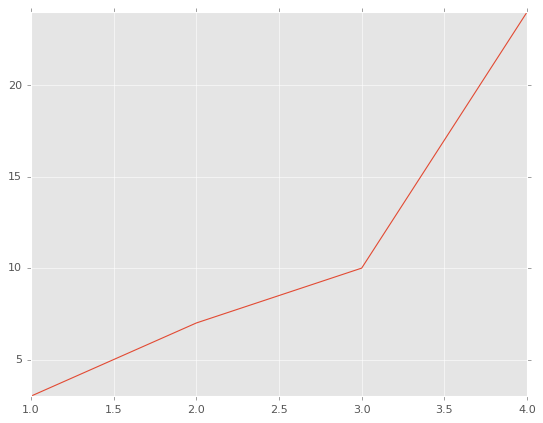

In [407]:
plt.plot(x,y)
plt.axis('tight')
plt.show()

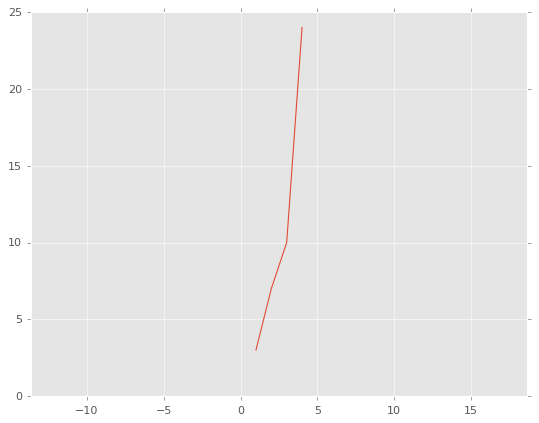

In [408]:
plt.plot(x,y)

plt.axis('equal')
#para cambiar los límites cuando se usa equal
#plt.gca().set_ylim(0,25)
plt.show()

## Añadir leyenda a nuestros gráficos

Además de etiquetar los ejes, en muchos casos es importante mostrar una leyenda que explique a qué se corresponde cada línea. Sobre todo es útil cuando incluimos varias líneas dentro de un mismo gráfico. Para poder usar de forma apropiada la leyenda, tenemos que asignar una etiqueta a cada línea a través del atributo **label**. Posteriormente, indicamos que se pinte la leyenda usando el método **legend**.

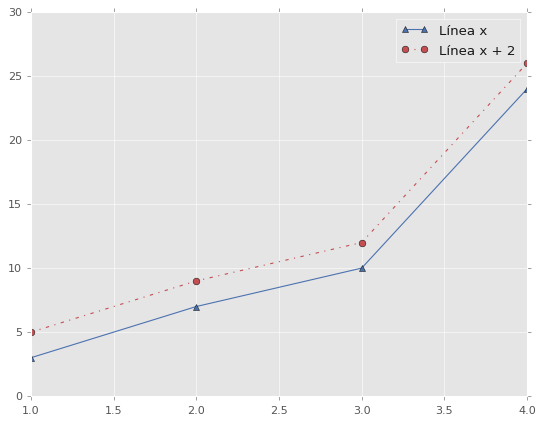

In [409]:
plt.plot(x,y,"^b-",label="Línea x")
plt.plot(x,y + 2,"or-.",label="Línea x + 2")
plt.legend()
plt.show()

## Trabajar con las leyendas de los gráficos

Modificar la estética y ubicación de la leyenda.

Por un lado, podemos cambiar la ubicación de la leyenda a partir del atributo loc, que puede tener los siguientes valores:

- best
- upper right
- upper left
- lower left
- lower right
- right
- center left
- center right
- lower center
- upper center
- center

También podemos cambiar la opción de si la leyenda se muestra dentro de un marco o no a través del atributo frameon, que recibe un valor booleano.

Para cambiar el número de columnas usamos el atributo ncol.

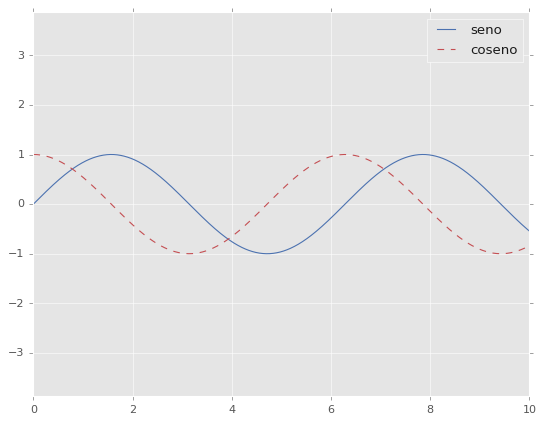

In [410]:
var = np.linspace(0, 10, 1000)
plt.plot(var, np.sin(var), '-b', label='seno')
plt.plot(var, np.cos(var), '--r', label='coseno')
plt.axis('equal')
plt.legend()
plt.show()

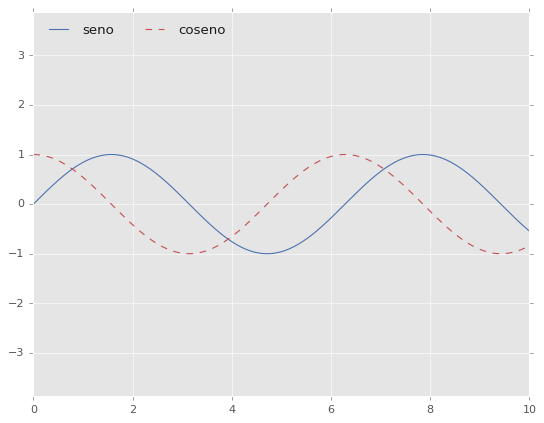

In [411]:
var = np.linspace(0, 10, 1000)
plt.plot(var, np.sin(var), '-b', label='seno')
plt.plot(var, np.cos(var), '--r', label='coseno')
plt.axis('equal')
plt.legend(loc=("upper left"),frameon=False, ncol=2)
plt.show()

## Múltiples gráficos en una misma figura

A través del método **subplot** se pueden crear varios gráficos dentro de una misma figura. El método consiste en crear una rejilla (o tabla) con un conjunto de filas y columnas, donde se especifica en qué región se muestra un gráfico u otro. Para ello, subplot recibe tres argumentos:

- número de filas en la figura
- número de columnas en la figura
- índice dentro de la figura

A continuación de ejecutar el método **subplot** se incluye el comando con el gráfico que se quiere dibujar.

A continuación mostramos un ejemplo de una figura que contiene 6 gráficos distribuidos en 2 filas y 3 columnas. En cada gráfico se muestran los argumentos que se usan en subplot.

Para el ejemplo usamos el método **text** que nos permite escribir un texto indicando la posición donde se escribe.

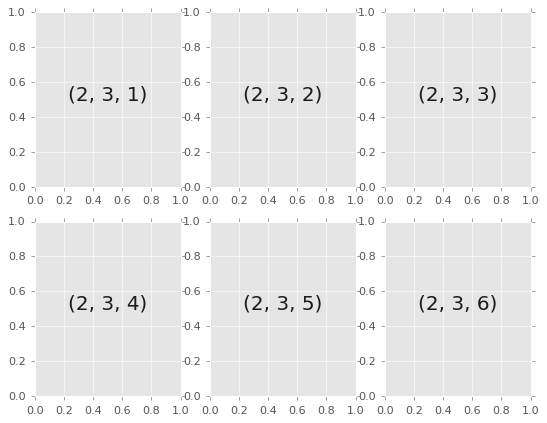

In [412]:
for i in range(1, 7):
        plt.subplot(2, 3, i)
        plt.text(0.5, 0.5, str((2, 3, i)),fontsize=18, ha='center')

Para ajustar el espacio entre cada gráfico usamos el método **subplots_adjust** y los parámetros **hspace** y **wspace** para fijar el espacio horizontal y vertical respectivamente. El ajuste se realiza en proporción al tamaño de cada gráfico. Por ejemplo, el valor 0.5 indica que se usa la mitad del espacio del gráfico.

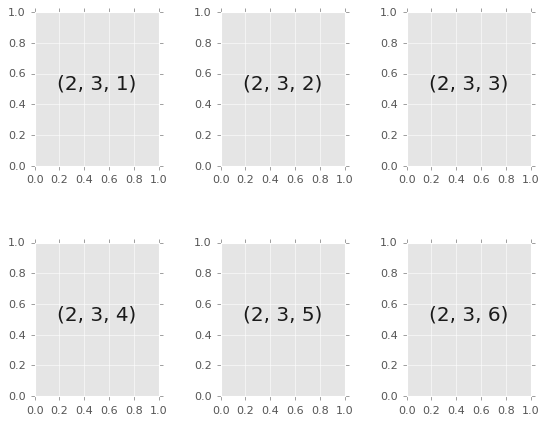

In [413]:
plt.subplots_adjust(hspace=.5, wspace=.5)
for i in range(1, 7):
        plt.subplot(2, 3, i)
        plt.text(0.5, 0.5, str((2, 3, i)),fontsize=18, ha='center')

Posteriormente, a cada gráfico le podemos poner un título como hacíamos antes (método title). Además, podemos añadir un título para la figura entera usando el método **suptitle**.

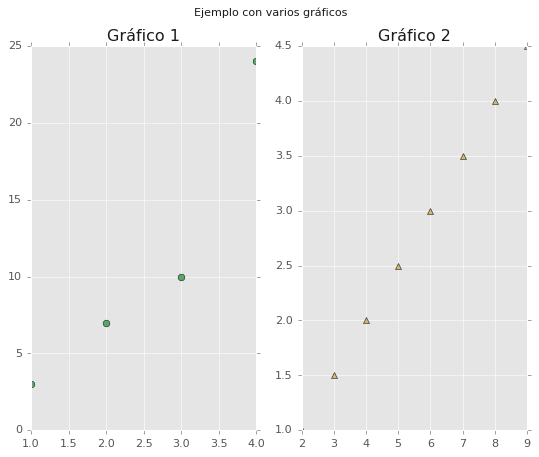

In [414]:
plt.subplot(1,2,1)
plt.plot(x,y,"go")
plt.title("Gráfico 1")

plt.subplot(1,2,2)
plt.plot(x2,y2,"y^")
plt.title("Gráfico 2")

plt.suptitle("Ejemplo con varios gráficos")
plt.show()

## Varios gráficos usando un array de gráficos

Como contrapartida al método anterior, matplotlib ofrece otro método donde creamos todos los posibles gráficos en forma de array y luego podemos trabajar sobre cada uno de ellos accediendo al índice correspondiente.

Para poder usar este método, creamos el array usando el método **subplots**, que devuelve el objeto correspondiente a la figura y el array de gráficos. Como parámetros usamos el número de filas y columnas.

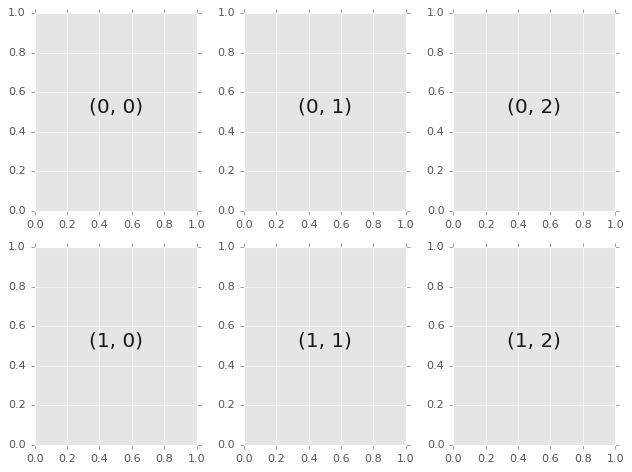

In [415]:
numFilas = 2
numColumnas = 3

figura,graficos = plt.subplots(numFilas , numColumnas)
for fila in range(numFilas):
    for columna in range(numColumnas):
        graficos[fila, columna].text(0.5, 0.5, str((fila, columna)),fontsize=18, ha='center')

plt.tight_layout()
plt.show()

## Gráficos usando Pandas

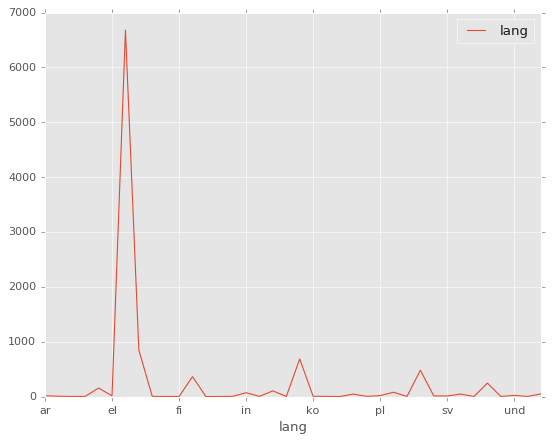

In [416]:
twitter.groupby("lang")[["lang"]].aggregate(np.count_nonzero).plot()

Text(0.5, 0, '# Tweets')

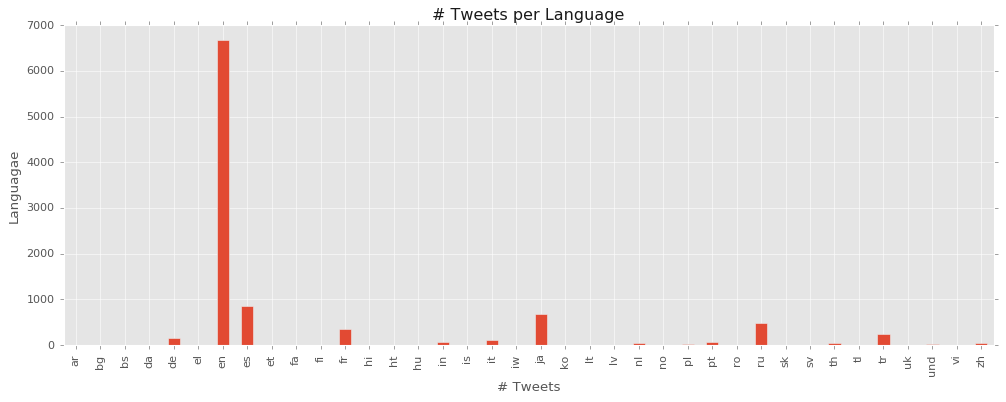

In [417]:
# Operando con el objeto Axes
ax = twitter.groupby("lang")[["lang"]].aggregate(np.count_nonzero).plot(
    kind="bar",
    figsize=(15, 5),
    title="# Tweets per Language",
    legend=None
)
ax.set_ylabel("Languagae")
ax.set_xlabel("# Tweets")

Text(0.5, 0, '# Tweets')

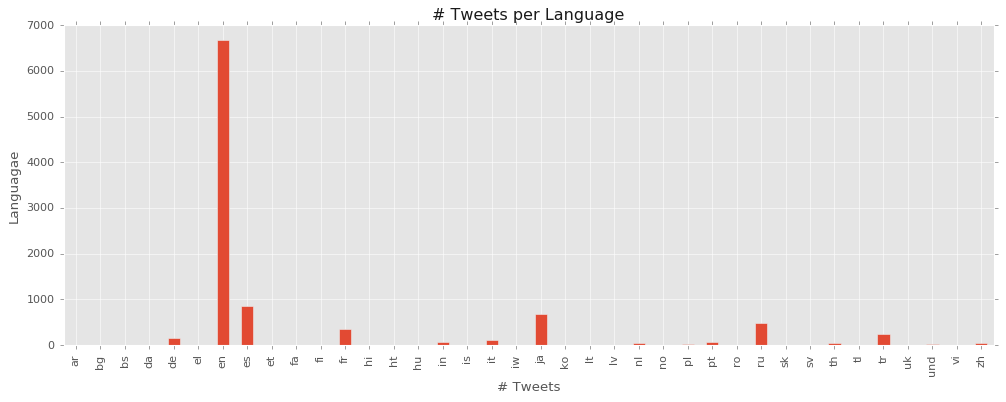

In [418]:
# Definiendo el plot y los axes previamente
fig, ax = plt.subplots(1, figsize=(15, 5))
twitter.groupby("lang")[["lang"]].aggregate(np.count_nonzero).plot(ax=ax,
    kind="bar",
    title="# Tweets per Language",
    legend=None
)
ax.set_ylabel("Languagae")
ax.set_xlabel("# Tweets")

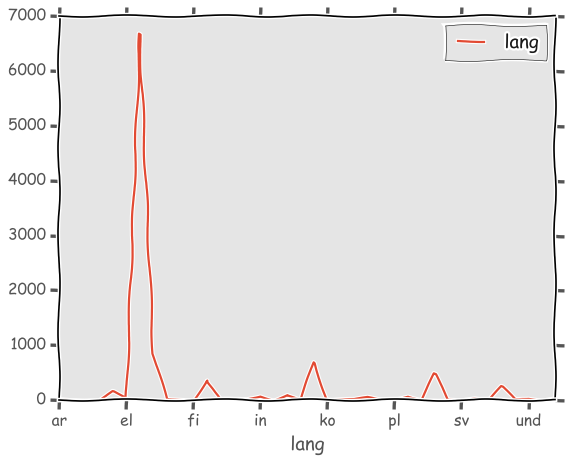

In [419]:
with plt.xkcd():
    twitter.groupby("lang")[["lang"]].aggregate(np.count_nonzero).plot()

## Gráficos de dispersión

Los gráficos de dispersión (scatter plots en inglés) también sirven para dibujar puntos a lo largo del gráfico como los gráficos que hemos visto hasta ahora. Sin embargo, nos permitirán poder visualizar más variables dentro de un mismo gráfico jugando con el color y el tamaño de los marcadores.

La función que nos permite crear este tipo de gráficos es **scatter**, que funciona de forma similar a la función **plot**. Sin embargo, scatter no nos va a unir los puntos con líneas.

Los gráficos de dispersión son adecuados para mostrar la relación de dos variables cuantitativas, aunque permiten agregar más variables.

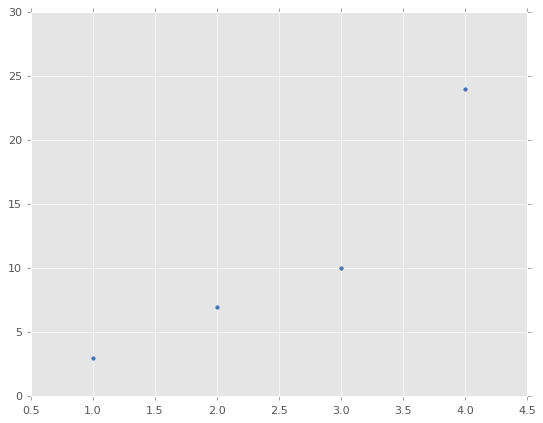

In [420]:
plt.scatter(x, y)
plt.show()

Ahora vamos a probar a añadir variables a nuestro gráfico, modificando propiedades como el color. Para ello, vamos a trabajar con la colección mtcars.

La descripción de la colección la podemos ver en https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html

In [421]:
import pandas as pd
mtcars = pd.read_csv("https://raw.githubusercontent.com/runawayhorse001/learning-apache-spark/master/data/mtcars.csv")

In [422]:
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
Unnamed: 0    32 non-null object
mpg           32 non-null float64
cyl           32 non-null int64
disp          32 non-null float64
hp            32 non-null int64
drat          32 non-null float64
wt            32 non-null float64
qsec          32 non-null float64
vs            32 non-null int64
am            32 non-null int64
gear          32 non-null int64
carb          32 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [423]:
mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


Modificamos la escala de colores a través del atributo **c**, que recibirá como parámetro una colección de elementos en una escala continúa que servirán para mostrar distintos colores. En este caso, usaremos una columna de nuestros datos.

Para mostrar la leyenda de los colores, usaremos el método **colorbar**.

De momento solo vamos a ver el uso del color, ya que para variar otros elementos como el tamaño o el marcador, será más cómodo usar seaborn.

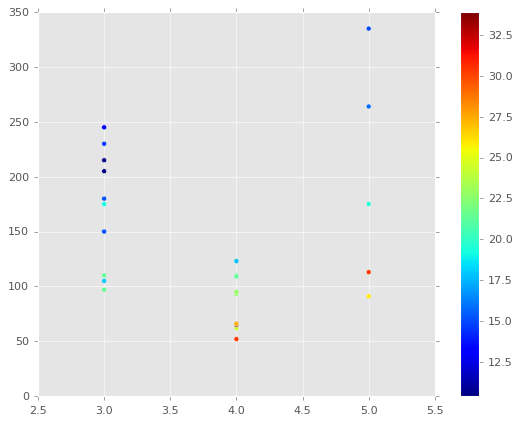

In [424]:
plt.scatter(mtcars.gear , mtcars.hp , c = mtcars.mpg )
plt.colorbar() #para mostrar la barra con la información de colores
plt.show()

## Histogramas

Los histogramas son útiles para ver la distribución de variables continuas. Representan gráficamente la frecuencia de aparición de cada rango de datos de una determinada variable. De este modo, podemos saber cuáles son los valores que más se repiten dentro de una variable o cuáles aparecen en menor medida.

Los histogramas se suelen utilizar cuando se muestran distribuciones de probabilidad.

Para crear un histograma, usamos el método **hist**. Como primer parámetro se utiliza la secuencia que se quiere representar. Entre el resto de parámetros, destaca el parámetro **bins**, que se usa para expresar el número de intervalos que se van a usar en el histograma.

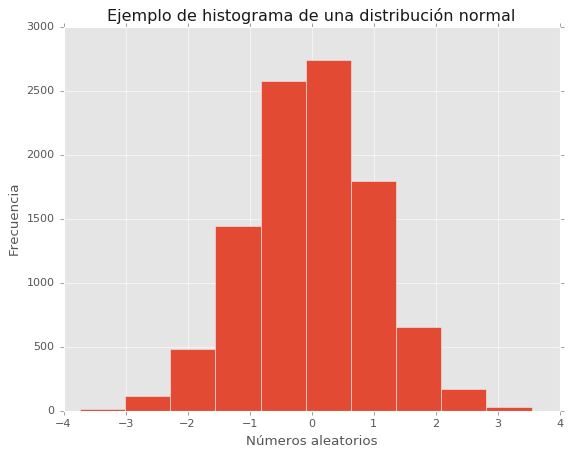

In [425]:
x = np.random.randn(10000)

plt.title("Ejemplo de histograma de una distribución normal")
plt.xlabel("Números aleatorios")
plt.ylabel("Frecuencia")
plt.hist(x,bins=10)
plt.show()

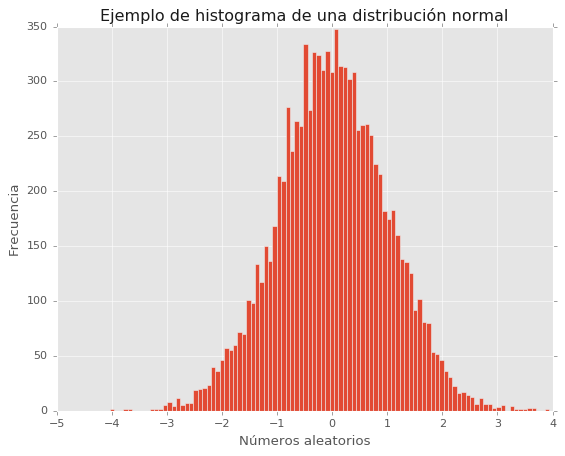

In [426]:
x = np.random.randn(10000)

plt.title("Ejemplo de histograma de una distribución normal")
plt.xlabel("Números aleatorios")
plt.ylabel("Frecuencia")
plt.hist(x,bins=100)
plt.show()

Si queremos mostrar la densidad (qué proporción representa cada intervalo dentro del total), usamos el atributo **density** a  True.

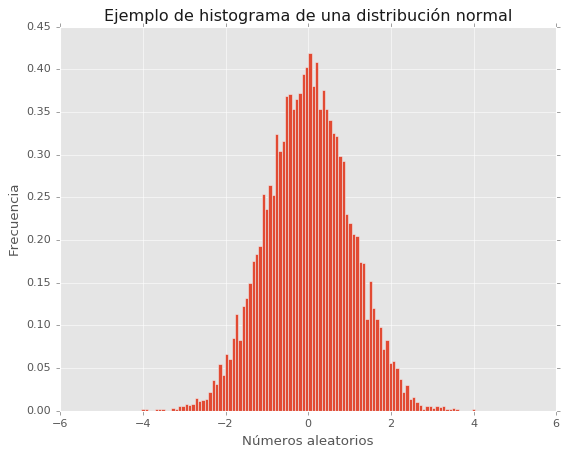

In [427]:
x = np.random.randn(10000)

plt.title("Ejemplo de histograma de una distribución normal")
plt.xlabel("Números aleatorios")
plt.ylabel("Frecuencia")
plt.hist(x,bins=100,density=True)
plt.show()

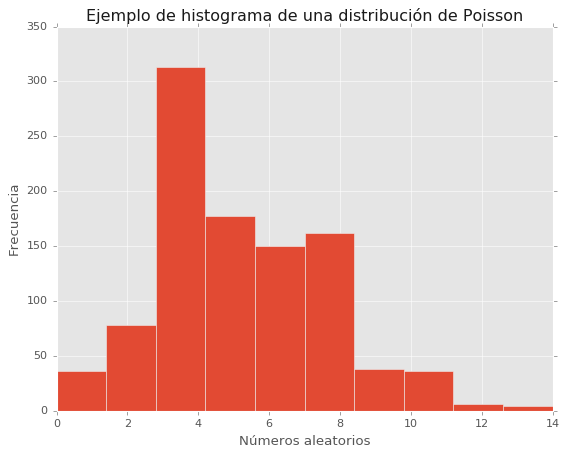

In [428]:
x = np.random.poisson(5,1000)
plt.title("Ejemplo de histograma de una distribución de Poisson")
plt.xlabel("Números aleatorios")
plt.ylabel("Frecuencia")
plt.hist(x,10)
plt.show()

También podemos usar el parámetro **histtype** para modificar cómo se dibuja el histograma con los siguientes posibles valores:
- bar: el usado por defecto
- step: dibuja el contorno
- stepfilled: dibuja el contorno y lo rellena

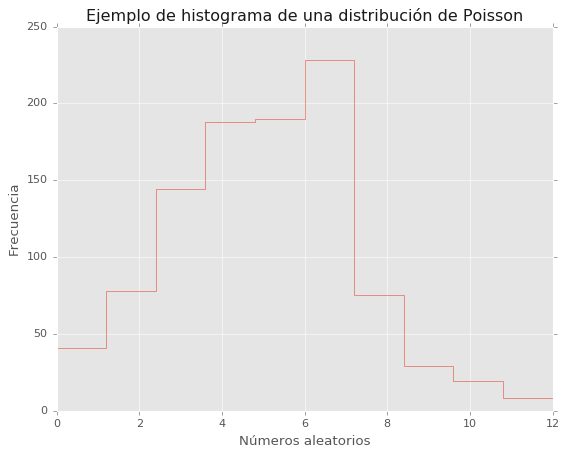

In [429]:
x = np.random.poisson(5,1000)
plt.title("Ejemplo de histograma de una distribución de Poisson")
plt.xlabel("Números aleatorios")
plt.ylabel("Frecuencia")
plt.hist(x,10,histtype="step")
plt.show()

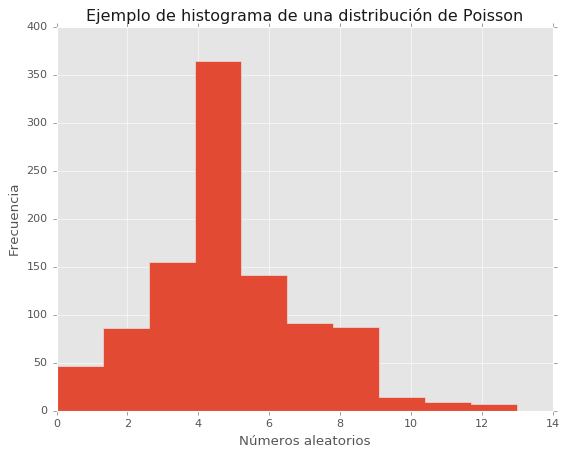

In [430]:
x = np.random.poisson(5,1000)
plt.title("Ejemplo de histograma de una distribución de Poisson")
plt.xlabel("Números aleatorios")
plt.ylabel("Frecuencia")
plt.hist(x,10,histtype="stepfilled")
plt.show()

<div style="font-size: 1em; margin: 1em 0 1em 0; border: 1px solid #86989B; background-color: #f7f7f7; padding: 0;">
<p style="margin: 0; padding: 0.1em 0 0.1em 0.5em; color: white; border-bottom: 1px solid #86989B; font-weight: bold; background-color: #AFC1C4;">
Ejercicio
</p>
<p style="margin: 0.5em 1em 0.5em 1em; padding: 0;">
Usando el dataset `titanic`, se pide representar en un mismo gráfico los histogramas de edades de hombres (en azul) y mujeres (en rojo), utilizando el tipo de histográma `stepfilled` y una transparencia del 30% para los colores.
</p>
</div>

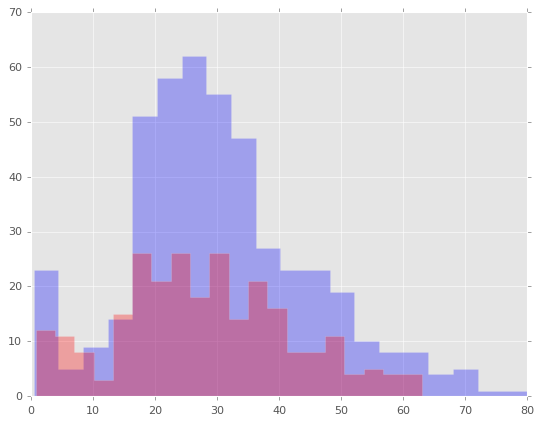

In [431]:
# Escriba su solución aquí

## Gráficos de barras

Los gráficos de barras se utilizan para mostrar cantidades asociadas a variables categóricas. Por ejemplo, podemos tener distintos grupos de usuarios, como tipo de clientes, y valores, como número de ventas, devoluciones, etc. asociados a cada grupo.

Para crear un gráfico de este tipo, usamos el método **bar** y como parámetros:
- la lista (o array o similar) de categorías 
- la lista (o array o similar) de valores asociados a cada categoría.

Adicionalmente, podemos indicar el color en el que queremos que se muestren las barras.

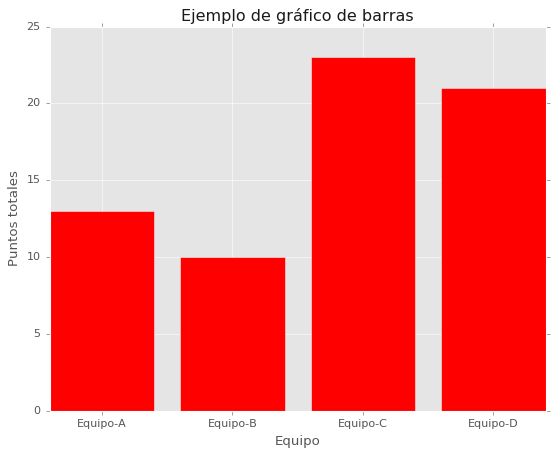

In [432]:
lEquipos = ["Equipo-A" , "Equipo-B" , "Equipo-C" , "Equipo-D"]
puntos = np.random.randint(10,30,size=4)

plt.bar(lEquipos , puntos , color = "red")
plt.title("Ejemplo de gráfico de barras")
plt.xlabel("Equipo")
plt.ylabel("Puntos totales")
plt.show()

In [433]:
#vamos a visualizar la variable am (automático-manual) de la colección mtcars
#primero creamos una Serie de pandas que contiene para cada valor de la variable
#cuántos elementos tiene
valoresAm = mtcars.am.value_counts()
print(valoresAm)

0    19
1    13
Name: am, dtype: int64


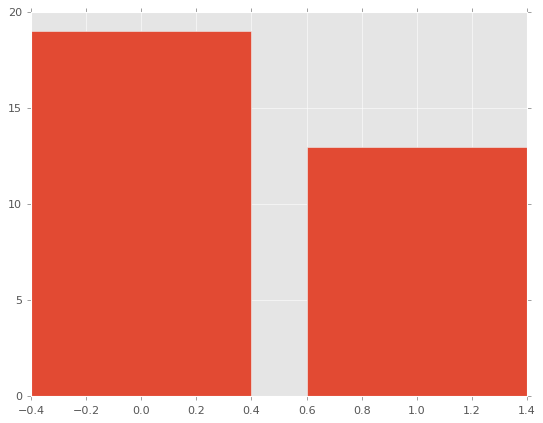

In [434]:
#mostramos un gráfico de barras con la información sobre coches automáticos y manuales.
plt.bar(valoresAm.index,valoresAm)
plt.show()

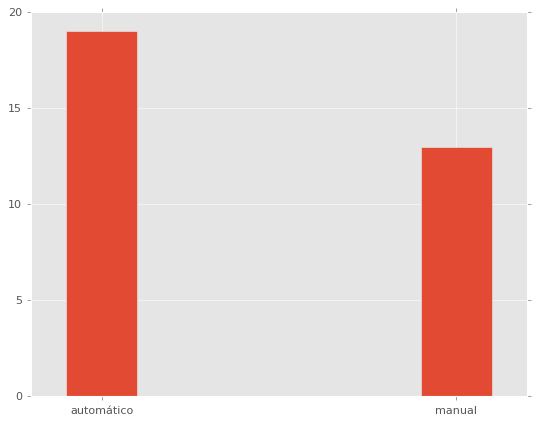

In [435]:
#ponemos etiqueta a cada barra y ajustamos el ancho de cada barra
plt.bar(valoresAm.index,valoresAm,tick_label=["automático","manual"], width=0.2)
plt.show()

[Text(0, 0, 'automático'), Text(0, 0, 'manual')]

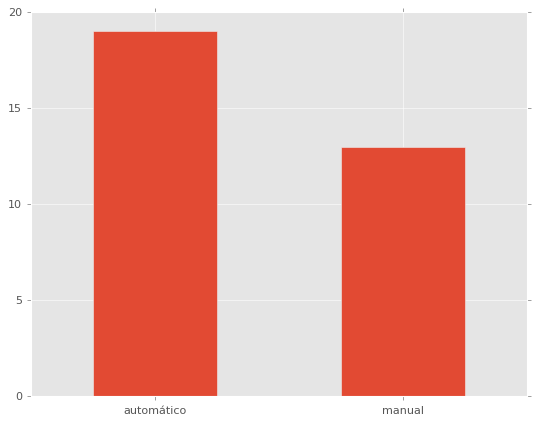

In [436]:
ax = valoresAm.plot(kind="bar", rot=0)
ax.set_xticklabels(["automático","manual"])

Hay situaciones en las que trabajamos con datos en los que puede haber una cierta variabilidad en las cantidades. Por ejemplo, podemos tener un determinado error o una varianza asociada a los datos. Para mostrar dicha información junto con las barras, podemos hacer uso del atributo **yerr**. A este atributo le asignamos una lista con los valores del error, de modo que nos muestra una línea centrada en la cima de cada barra indicando dónde estaríamos con el error asignado a cada variable.

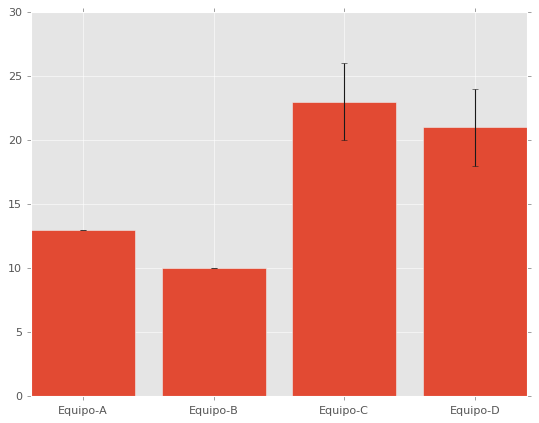

In [437]:
variantes = np.random.randint(0,5,size=4)
plt.bar(lEquipos,puntos,yerr=variantes)
plt.show()

Si queremos mostrar las barras en horizontal, usamos el método **barh**. En este caso, el error se asigna al atributo xerr.

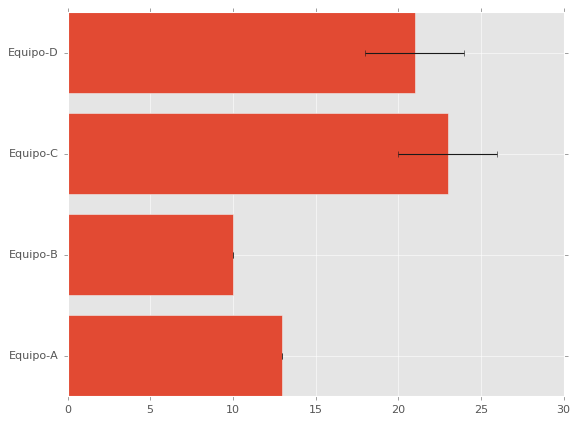

In [438]:
plt.barh(lEquipos,puntos,xerr=variantes)
plt.show()

También podemos crear gráficos de barras donde tengamos más de una barra por cada valor horizontal. En estos casos tenemos que tener en cuenta el ancho de cada barra para poder añadir nuevas barras. 

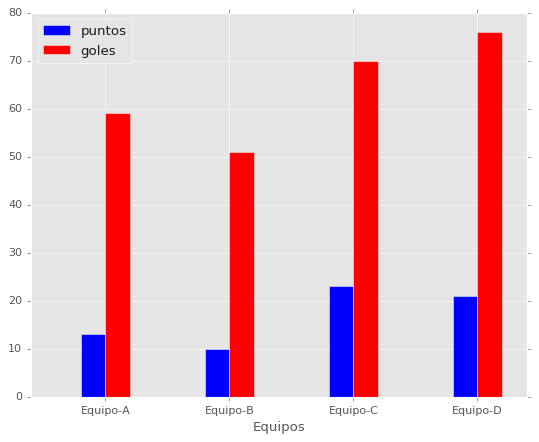

In [439]:
goles = np.random.randint(40,80,size=4)
indice = np.arange(4)
ancho = 0.2

plt.bar(indice , puntos,ancho , color="blue", label="puntos")
plt.bar(indice + ancho, goles ,ancho , color="red", label="goles")

plt.xlabel("Equipos")
#situamos los valores horizontales entre las dos barras
plt.xticks(indice + ancho / 2 , lEquipos)

plt.legend(loc="best")
plt.show()

En otras ocasiones, nos puede interesar apilar una barra sobre otra para ver valores acumulados. En estos casos, en el segundo gráfico tenemos que usar el atributo **bottom** para situar dónde empezarán las nuevas barras.

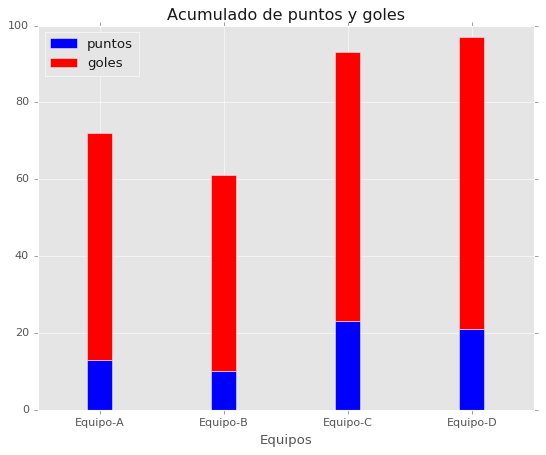

In [440]:
plt.bar(indice , puntos,ancho , color="blue", label="puntos")
plt.bar(indice , goles ,ancho , color="red", label="goles", bottom=puntos)

plt.title("Acumulado de puntos y goles")
plt.xlabel("Equipos")
plt.xticks(indice , lEquipos)

plt.legend(loc="best")
plt.show()

## Gráficos de sectores 

Los gráficos de sectores también se conocen como gráficos de tartas por su nombre en inglés (pie charts). Es un tipo de gráfico muy útil para mostrar proporciones o porcentajes ya que el gráfico muestra el 100% de una variable que se divide en sectores (pedazos de tarta) que representan la proporción asociada a cada valor de la variable.

Para crear el gráfico usamos el método **pie**, que recibe como primer parámetro el listado de porcentajes. Si queremos etiquetar cada sector, usamos el atributo labels.


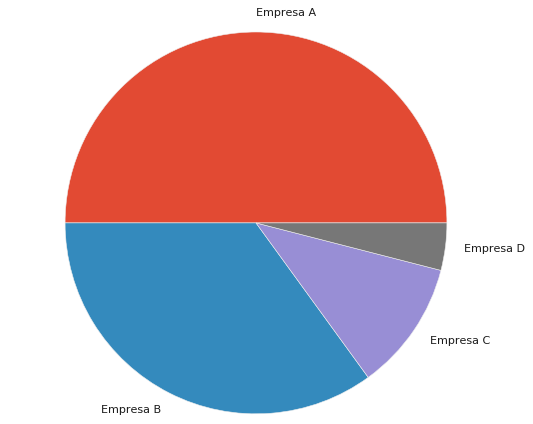

In [441]:
lEmpresas = ["Empresa A" , "Empresa B" , "Empresa C" , "Empresa D"]
porcentajeMercado = [50, 35 , 11 , 4]


plt.pie(porcentajeMercado ,  labels = lEmpresas)
plt.axis("equal") #si no, tiene forma de elipse
plt.show()

Podemos añadir modificaciones como el ángulo de inicio usando el atributo **startangle**. 

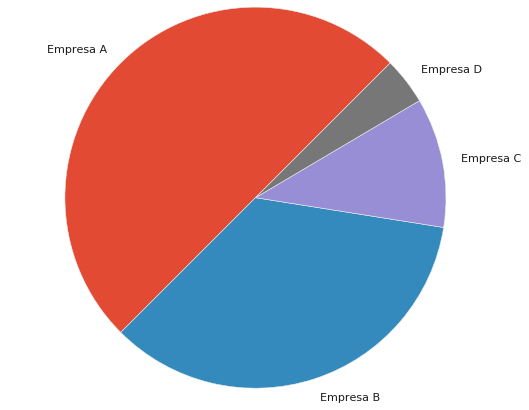

In [442]:
plt.pie(porcentajeMercado ,  labels = lEmpresas , startangle=45)
plt.axis("equal") #si no, tiene forma de elipse
plt.show()

También podemos destacar un sector usando el atributo **explode**. Para ello, usamos una lista donde indicamos en qué proporción queremos sacar cada sector del gráfico completo.

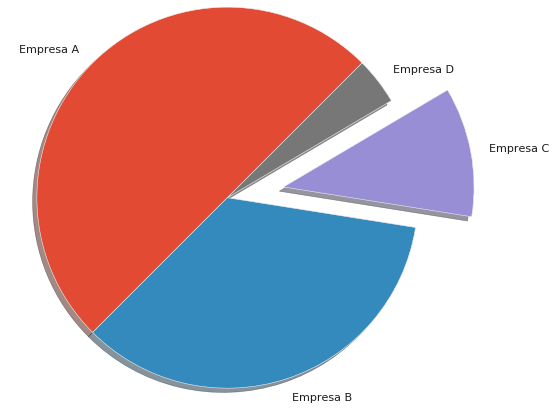

In [443]:
destacar = [0,0,0.3,0]#sacamos un 30% el sector correspondiente a la empresa C

plt.pie(porcentajeMercado , explode = destacar , labels = lEmpresas , shadow=True , startangle=45)
plt.axis("equal") #si no, tiene más forma de elipse
plt.show()

# Gráficos usando seaborn

Matplotlib es una librería muy potente para hacer gráficos. Sin embargo, en muchos casos es difícil de utilizar para obtener gráficos complejos puesto que supone tener que trabajar a bajo nivel para ajustar muchos parámetros del gráfico.

Para facilitar la creación de gráficos existe la librería **seaborn**, que funciona sobre matplotlib y ofrece métodos para crear gráficos de forma más sencilla. Realmente, seaborn convierte el código a un gráfico de matplotlib.

## Gráficos de dispersión

Podemos crear gráficos de dispersión de forma similar a como hacíamos con matplotlib. La ventaja es que va a ser más fácil ir añadiendo variables nuevas para modificar elementos del gráfico como el tamaño, color, forma, etc.

El método para crear un gráfico de dispersión es **scatterplot**. Como atributos usaremos **data** para especificar la colección de la que se toman los datos. La mayoría del resto de atributos se asignan a cadenas de texto que contienen el nombre de la variable de la colección. Por ejemplo, **x** e **y** se usan para indicar para las posiciones de los puntos, **hue** para ir variando el color, **style** para cambiar el tipo de marcador y **size** para el tamaño de los marcadores.

Adicionalmente, podemos usar el atributo **s** para especificar el tamaño fijo de los marcadores.

Como vamos a ver a continuación, con scatterplot podemos representar múltiples variables en un mismo gráfico.

In [444]:
import seaborn as sns

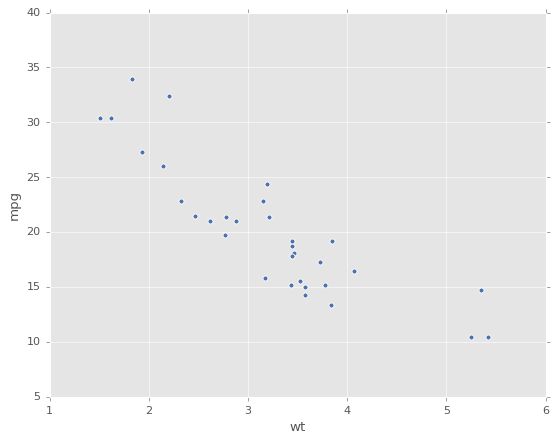

In [445]:
sns.scatterplot(x="wt", y="mpg", data=mtcars)

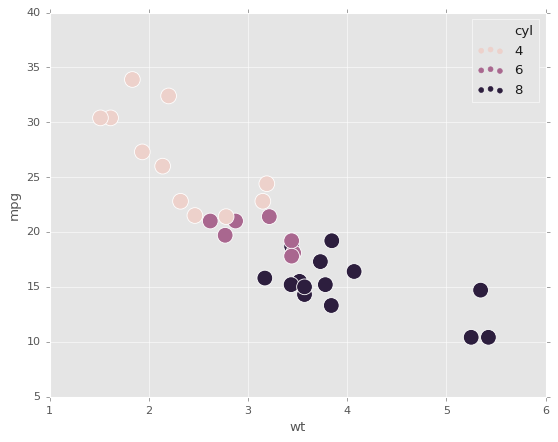

In [446]:
sns.scatterplot(x="wt", y="mpg", hue="cyl", s=200 , data=mtcars)

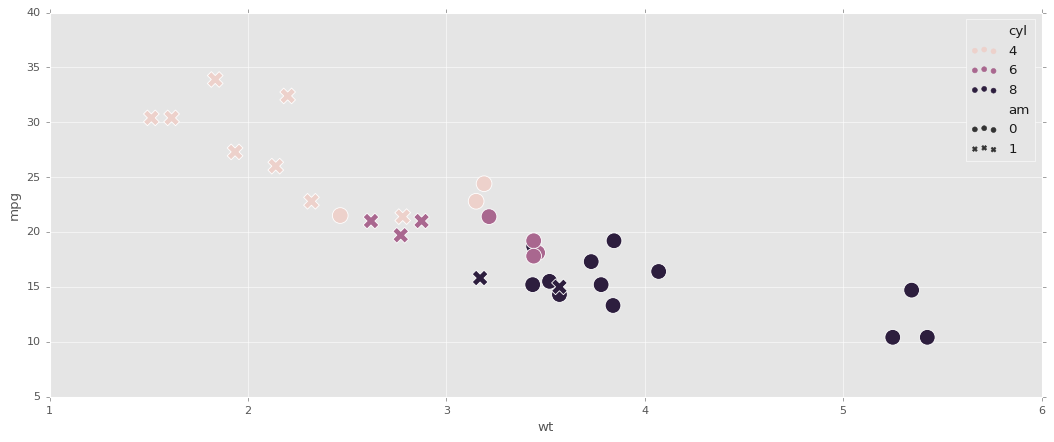

In [447]:
plt.figure(figsize=(16, 6))
sns.scatterplot(x="wt", y="mpg", hue="cyl" , style = "am", s=200 ,data=mtcars)

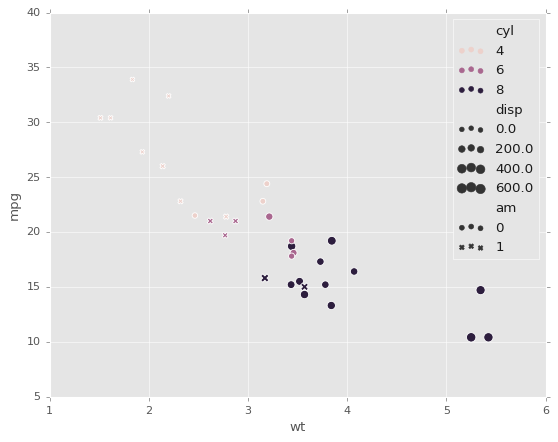

In [448]:
sns.scatterplot(x="wt", y="mpg", hue="cyl" , style = "am", size="disp"  ,data=mtcars)

## Histogramas

Para crear histogramas, podemos usar el método **kdeplot**, que nos muestra con una línea la distribución de la colección usando densidades (por eso se muestran proporciones en el eje y). 

Vamos a recordar un histograma que hicimos anteriormente y a usar con los mismos datos kdplot.

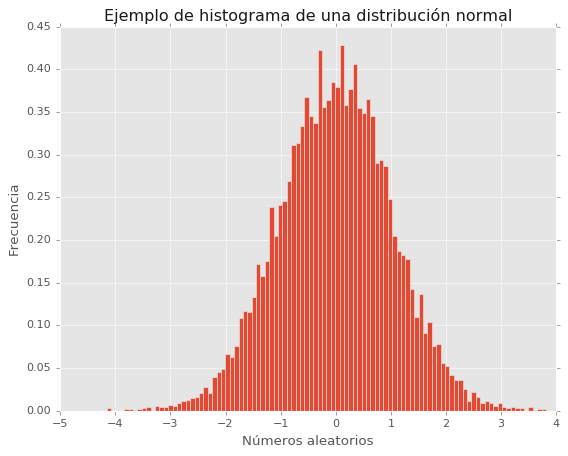

In [449]:
x = np.random.randn(10000)

plt.title("Ejemplo de histograma de una distribución normal")
plt.xlabel("Números aleatorios")
plt.ylabel("Frecuencia")
plt.hist(x,density=True,bins=100)
plt.show()

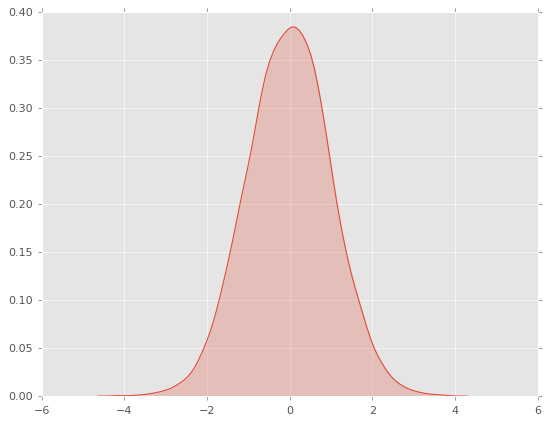

In [450]:
sns.kdeplot(x, shade=True)
plt.show()

Sí además de la línea que muestra la distribución queremos mostrar las barras de frecuencia de cada intervalo, usamos el método **distplot**.

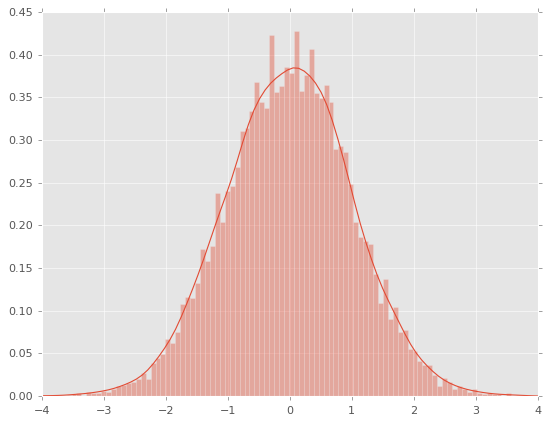

In [451]:
sns.distplot(x,bins=100)
plt.xlim(-4,4)
plt.show()

## Exploración inicial de una colección

Para realizar una exploración inicial de una colección de datos podemos usar el método **pairplot**. Este método permite comparar todas las variables de una colección por pares. La idea es ver cómo cambia cada variable en función de todas las demás.

A través de este método obtenemos una tabla con todas las posibles combinaciones de variables. En la diagonal de la tabla se muestra un gráfico con la distribución de cada variable.

Sin embargo, debemos de tener en cuenta que con que más variables tengamos, más difícil va a ser visualizar este tipo de gráfico. Veamos un ejemplo.

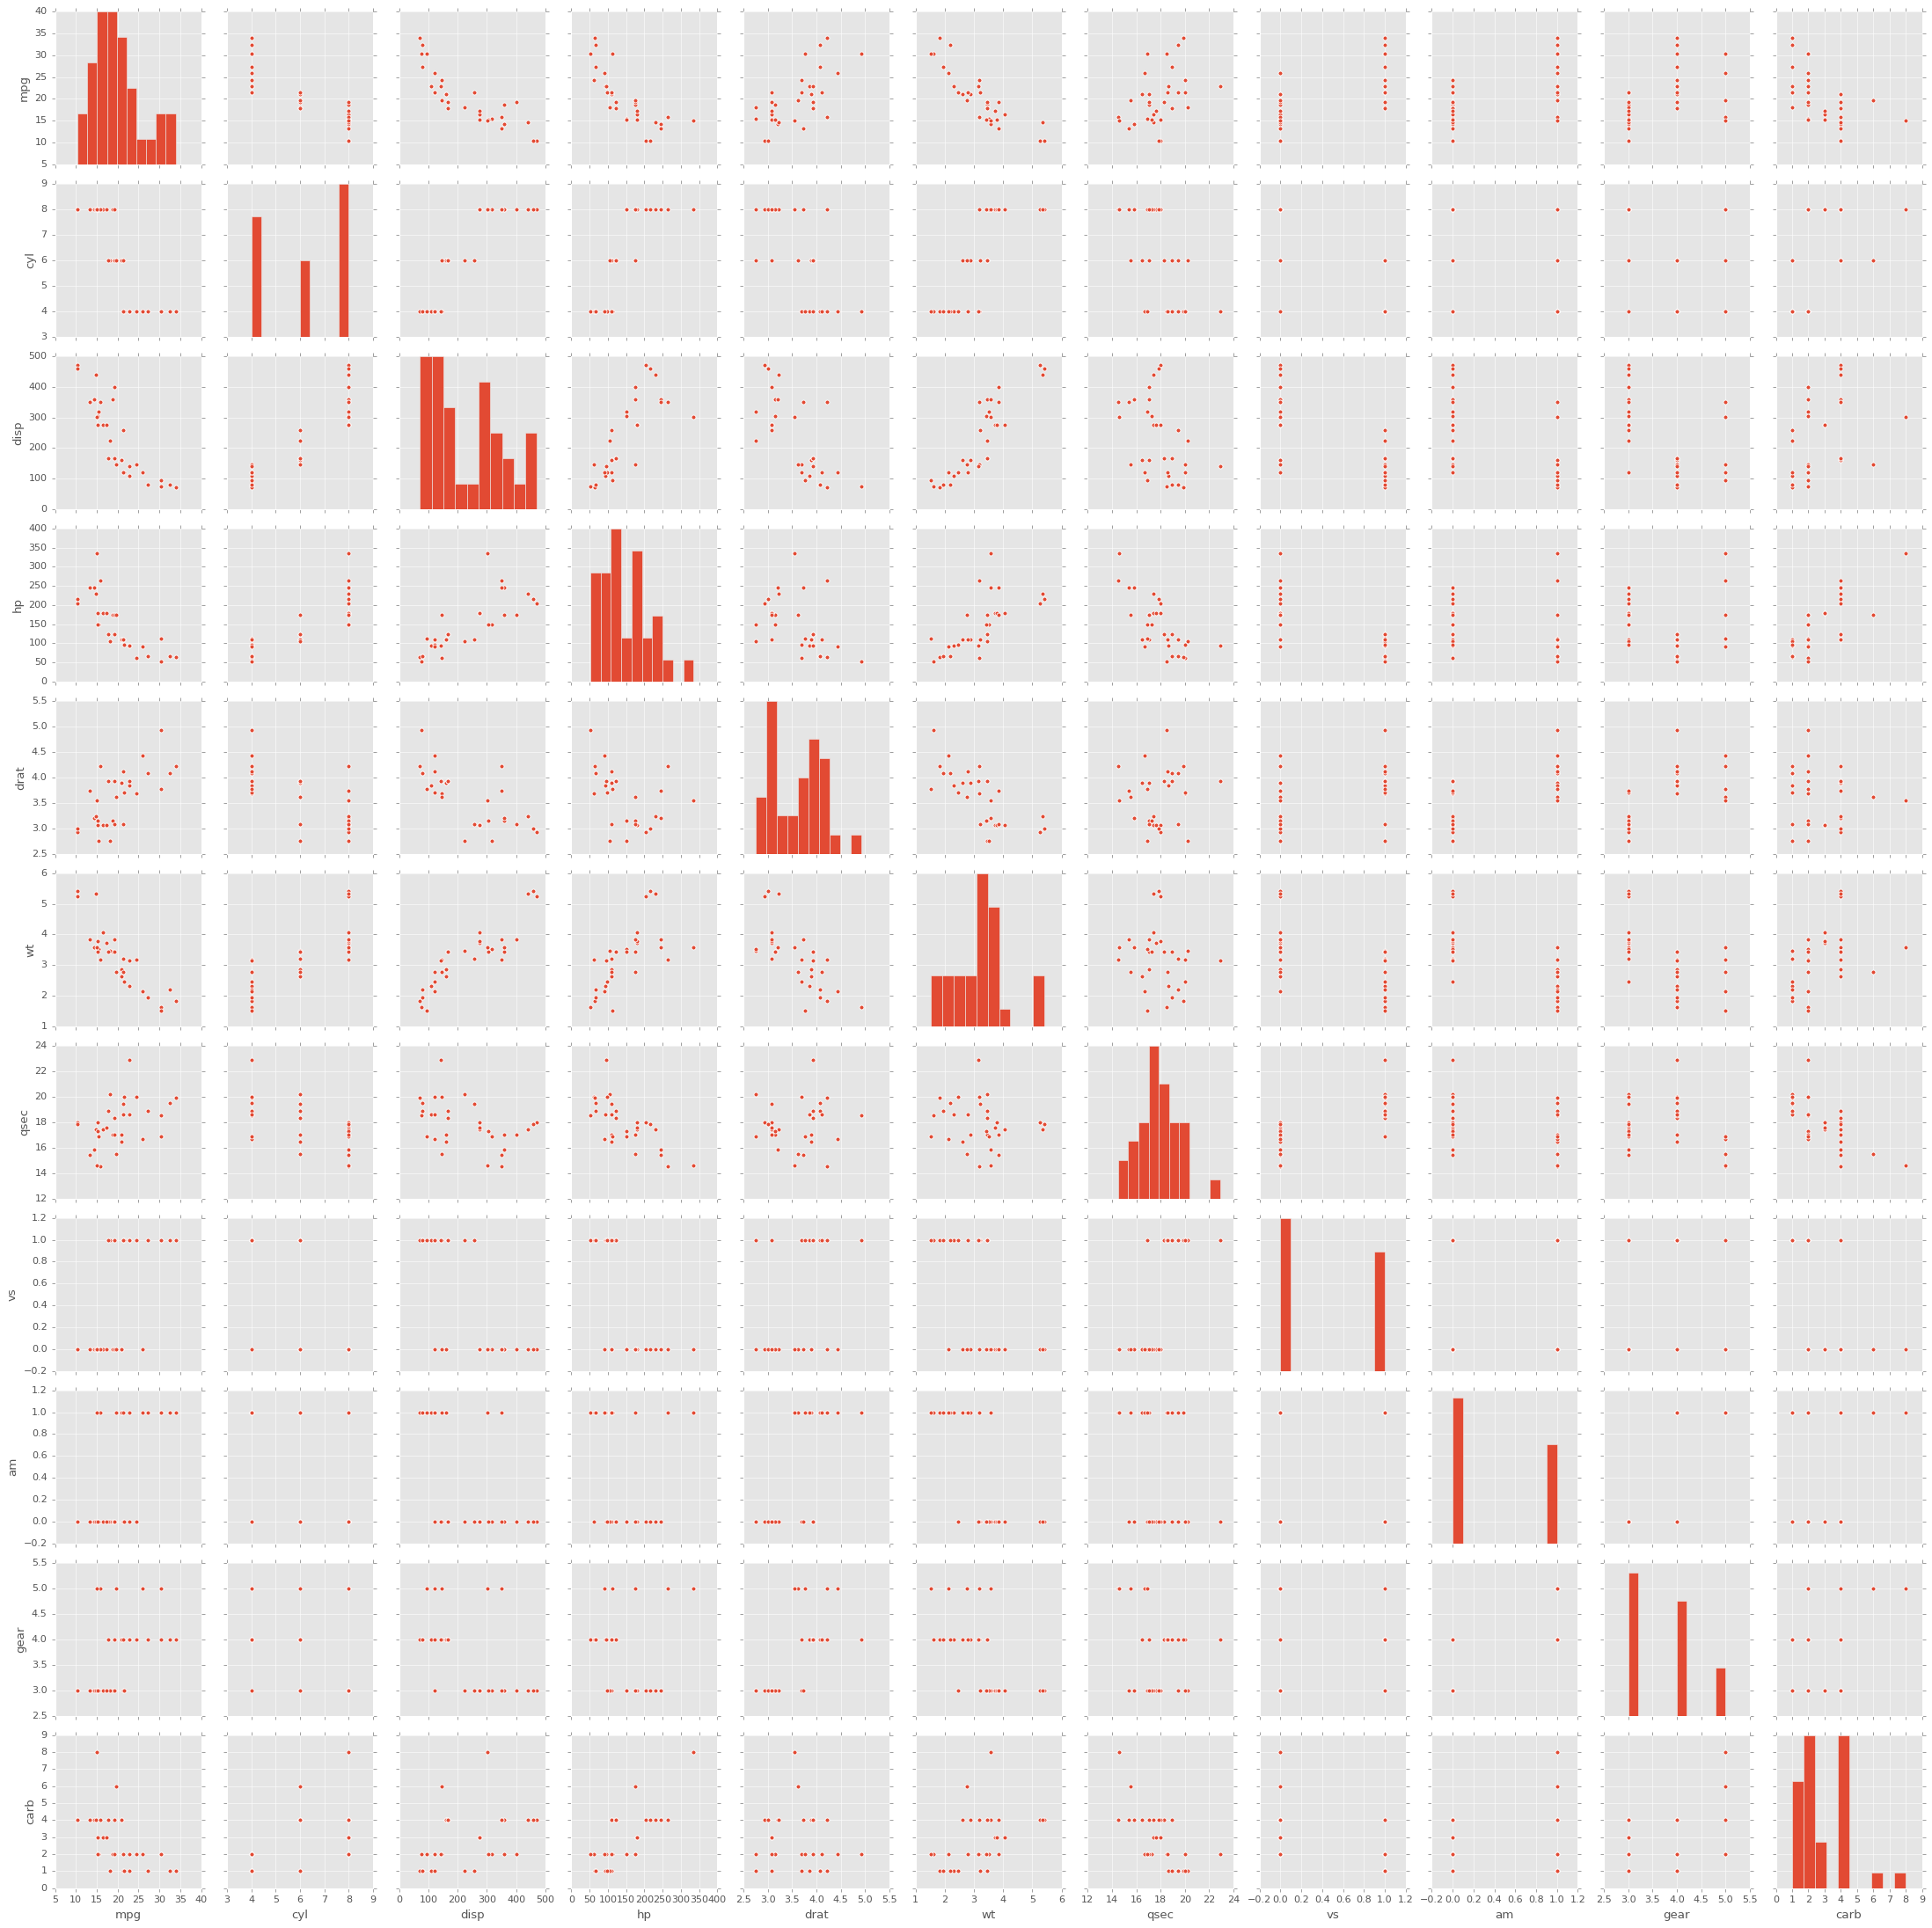

In [452]:
sns.pairplot(mtcars);

In [453]:
mtcars.columns

Index(['Unnamed: 0', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb'],
      dtype='object')

Probamos a ejecutar el mismo método sobre un subconjunto de las columnas. Para ello, usamos el atributo **vars**.

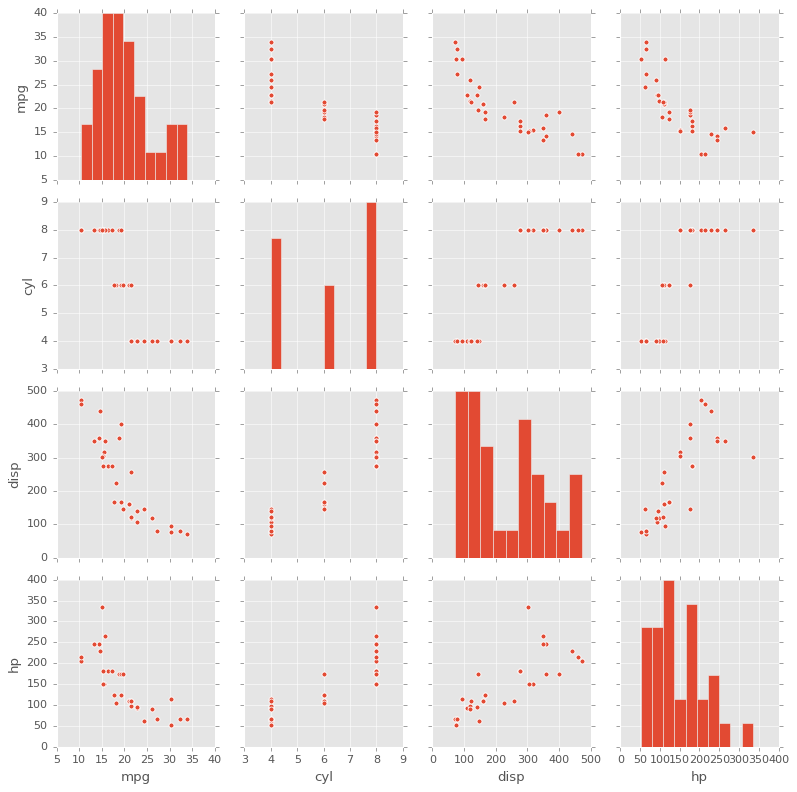

In [454]:
sns.pairplot(mtcars[["mpg","cyl","disp","hp"]])

Si además queremos que en cada gráfico se muestren los valores con distinto color en función de otra variable, usamos el atributo **hue**.

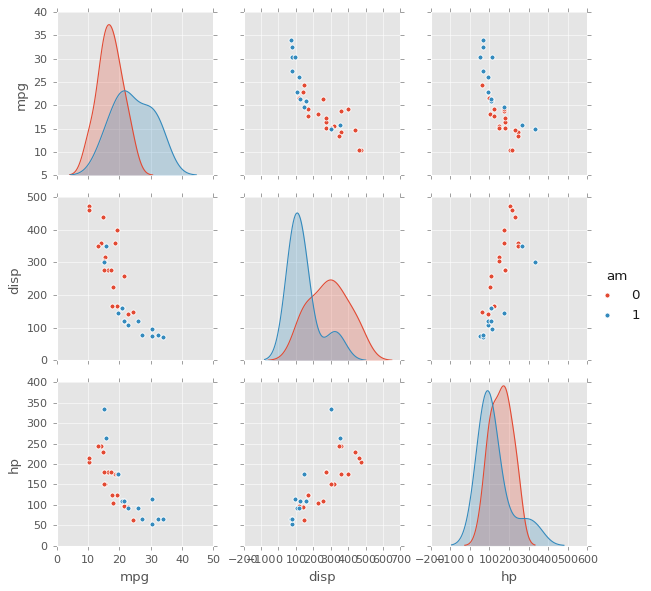

In [455]:
columnas = ["mpg","disp","hp"]
sns.pairplot(mtcars,vars = columnas , hue="am")

## Gráficos de cajas y bigotes (boxplots)

Los gráficos de cajas y bigotes permiten estudiar la distribución de los valores de una variable. Para ello, muestran dentro de un mismo gráfico dónde se sitúa la mediana de los datos, y una caja que se corresponde con el segundo y el tercer cuartil. Además, los bigotes muestran el resto de la distribución, excluyendo aquellos datos que son extremos.

Para crear este gráfico usamos el método **boxplot**. Como parámetros principales, podemos usar **x** e **y**.

En caso de querer mostrar una sola variable, con x creamos un gráfico con las cajas horizontales y con y las cajas se muestran en vertical.

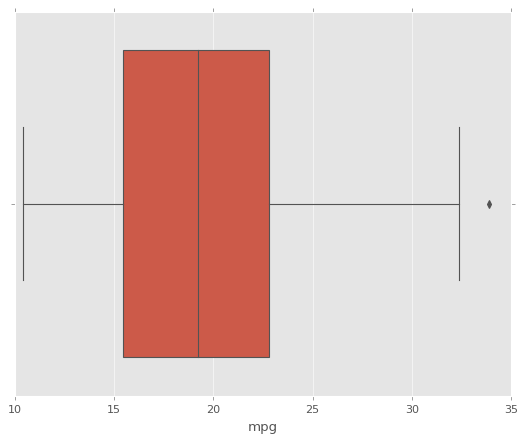

In [456]:
sns.boxplot( x=mtcars.mpg )
plt.show()

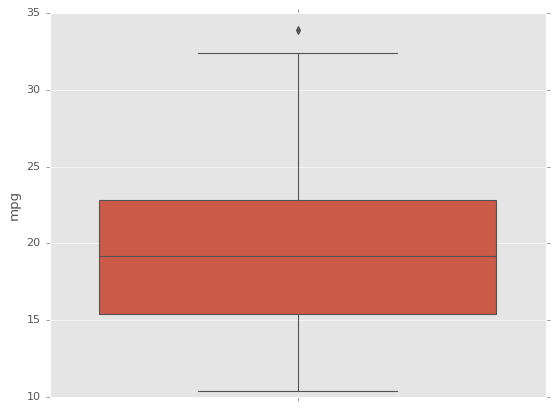

In [457]:
sns.boxplot( y=mtcars.mpg )
plt.show()

Si queremos mostrar cómo varian los valores de una variable en función de una segunda variable, usamos x para la segunda variable e y para la primera variable.

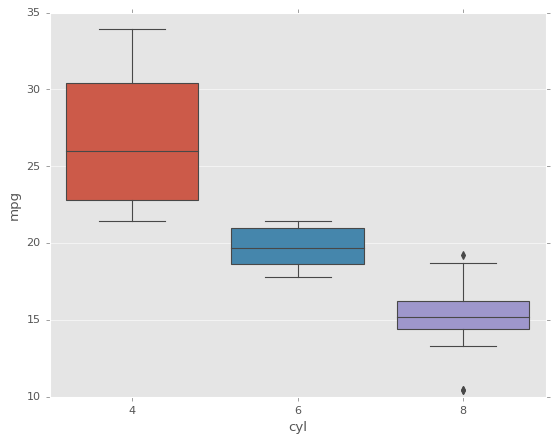

In [458]:
sns.boxplot( x=mtcars.cyl, y=mtcars.mpg )
plt.show()
#¿qué nos permite ver el gráfico?

Si queremos comparar varias variables en un mismo gráfico, usamos el parámetro **data** con la subcolección que contenga las variables a mostrar

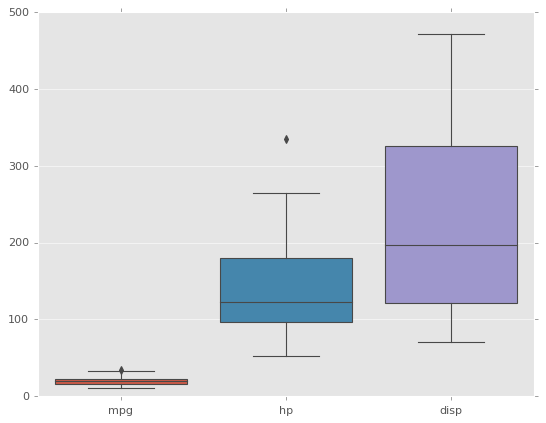

In [459]:
sns.boxplot(data=mtcars[["mpg","hp","disp"]])
plt.show()

## Gráficos de violín

Un gráfico de violín es similar a un gráfico de cajas y bigotes, añadiendo además una curva que muestra la distribución de los datos.

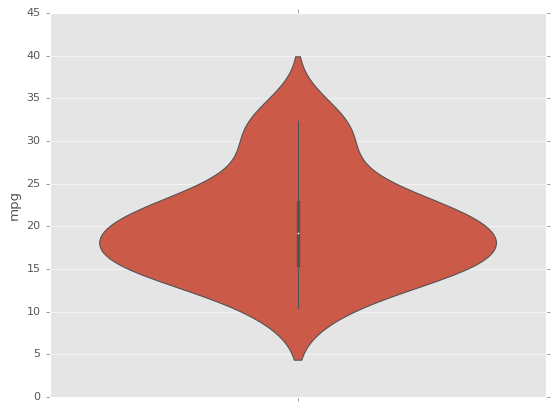

In [460]:
sns.violinplot( y=mtcars.mpg )
plt.show()

Si queremos mostrar cómo varian los valores de una variable en función de una segunda variable, usamos x para la segunda variable e y para la primera variable.

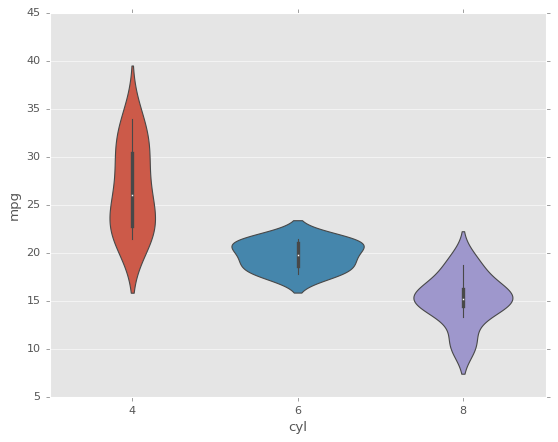

In [461]:
sns.violinplot( x=mtcars.cyl, y=mtcars.mpg )
plt.show()
#¿qué nos permite ver el gráfico?

Si queremos comparar varias variables en un mismo gráfico, usamos el parámetro **data** con la subcolección que contenga las variables a mostrar

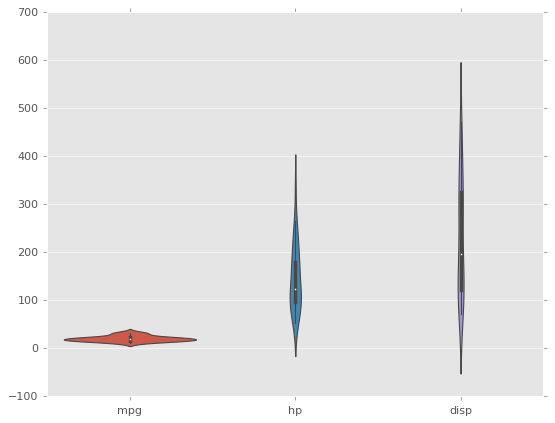

In [462]:
sns.violinplot(data=mtcars[["mpg","hp","disp"]])
plt.show()